# Chapter 8: Probability Basics

*Mathematics for Psychologists and Computation*

Welcome to Chapter 8! In this chapter, we'll explore the fundamentals of probability theory, which forms the foundation of statistical inference in psychological research. Understanding probability is essential for interpreting research findings, designing experiments, and making informed decisions based on data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

# Set a clean visual style for our plots with grid turned off
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off for all plots
plt.rcParams['figure.dpi'] = 300
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

## Introduction to Probability

Probability is the branch of mathematics that deals with the likelihood of events occurring. In psychology, probability theory helps us:

1. Quantify uncertainty in our observations and measurements
2. Make predictions about future events or behaviors
3. Test hypotheses and draw inferences from sample data
4. Model decision-making processes and cognitive phenomena

The concept of probability can be approached in several ways:

- **Classical (theoretical) probability**: Based on equally likely outcomes
- **Relative frequency (empirical) probability**: Based on observed frequencies over many trials
- **Subjective probability**: Based on personal belief or judgment

In this chapter, we'll focus primarily on classical and relative frequency approaches, as they are most commonly used in psychological research.

## Basic Probability Concepts

### Sample Space and Events

- **Sample Space (S)**: The set of all possible outcomes of an experiment or random process
- **Event (E)**: A subset of the sample space, representing a particular outcome or set of outcomes
- **Elementary Event**: A single outcome in the sample space

Let's illustrate these concepts with a simple example: rolling a six-sided die.

In [2]:
# Define the sample space for rolling a die
sample_space_die = {1, 2, 3, 4, 5, 6}

# Define some events
event_even = {2, 4, 6}  # Rolling an even number
event_odd = {1, 3, 5}   # Rolling an odd number
event_prime = {2, 3, 5} # Rolling a prime number
event_greater_than_4 = {5, 6}  # Rolling a number greater than 4

print(f"Sample Space: {sample_space_die}")
print(f"Event 'Even Number': {event_even}")
print(f"Event 'Odd Number': {event_odd}")
print(f"Event 'Prime Number': {event_prime}")
print(f"Event 'Greater than 4': {event_greater_than_4}")

Sample Space: {1, 2, 3, 4, 5, 6}
Event 'Even Number': {2, 4, 6}
Event 'Odd Number': {1, 3, 5}
Event 'Prime Number': {2, 3, 5}
Event 'Greater than 4': {5, 6}


### Probability of an Event

The probability of an event E, denoted as P(E), is a number between 0 and 1 that represents the likelihood of the event occurring. In the classical approach:

$$P(E) = \frac{\text{Number of favorable outcomes}}{\text{Total number of possible outcomes}} = \frac{|E|}{|S|}$$

where |E| is the number of elements in event E, and |S| is the number of elements in the sample space S.

Let's calculate the probabilities for our die-rolling events:

In [3]:
# Calculate probabilities
p_even = len(event_even) / len(sample_space_die)
p_odd = len(event_odd) / len(sample_space_die)
p_prime = len(event_prime) / len(sample_space_die)
p_greater_than_4 = len(event_greater_than_4) / len(sample_space_die)

print(f"P(Even) = {p_even}")
print(f"P(Odd) = {p_odd}")
print(f"P(Prime) = {p_prime}")
print(f"P(Greater than 4) = {p_greater_than_4}")

# Verify that P(S) = 1 (the probability of the entire sample space is 1)
p_sample_space = len(sample_space_die) / len(sample_space_die)
print(f"P(Sample Space) = {p_sample_space}")

# Verify that P(Even) + P(Odd) = 1 (these are complementary events)
print(f"P(Even) + P(Odd) = {p_even + p_odd}")

P(Even) = 0.5
P(Odd) = 0.5
P(Prime) = 0.5
P(Greater than 4) = 0.3333333333333333
P(Sample Space) = 1.0
P(Even) + P(Odd) = 1.0


### Empirical Probability

While theoretical probability is based on the structure of the sample space, empirical probability is based on observed frequencies. Let's simulate rolling a die many times and calculate the empirical probabilities:

In [4]:
# Simulate rolling a die
def roll_die():
    return random.randint(1, 6)

# Perform multiple rolls
num_rolls = [100, 1000, 10000, 100000]
results = {}

for n in num_rolls:
    rolls = [roll_die() for _ in range(n)]
    counts = {i: rolls.count(i) for i in range(1, 7)}
    frequencies = {i: count/n for i, count in counts.items()}
    results[n] = frequencies

# Display results
for n, frequencies in results.items():
    print(f"\nEmpirical probabilities after {n} rolls:")
    for i, freq in frequencies.items():
        print(f"P({i}) = {freq:.4f}")
    
    # Calculate empirical probability of even numbers
    p_even_empirical = sum(frequencies[i] for i in [2, 4, 6])
    print(f"P(Even) = {p_even_empirical:.4f} (Theoretical: {p_even})")


Empirical probabilities after 100 rolls:
P(1) = 0.2000
P(2) = 0.1800
P(3) = 0.1700
P(4) = 0.1100
P(5) = 0.1400
P(6) = 0.2000
P(Even) = 0.4900 (Theoretical: 0.5)

Empirical probabilities after 1000 rolls:
P(1) = 0.1620
P(2) = 0.1690
P(3) = 0.1600
P(4) = 0.1700
P(5) = 0.1680
P(6) = 0.1710
P(Even) = 0.5100 (Theoretical: 0.5)

Empirical probabilities after 10000 rolls:
P(1) = 0.1636
P(2) = 0.1599
P(3) = 0.1637
P(4) = 0.1702
P(5) = 0.1670
P(6) = 0.1756
P(Even) = 0.5057 (Theoretical: 0.5)

Empirical probabilities after 100000 rolls:
P(1) = 0.1681
P(2) = 0.1661
P(3) = 0.1647
P(4) = 0.1685
P(5) = 0.1651
P(6) = 0.1675
P(Even) = 0.5022 (Theoretical: 0.5)


Let's visualize how the empirical probabilities converge to the theoretical probabilities as the number of trials increases:

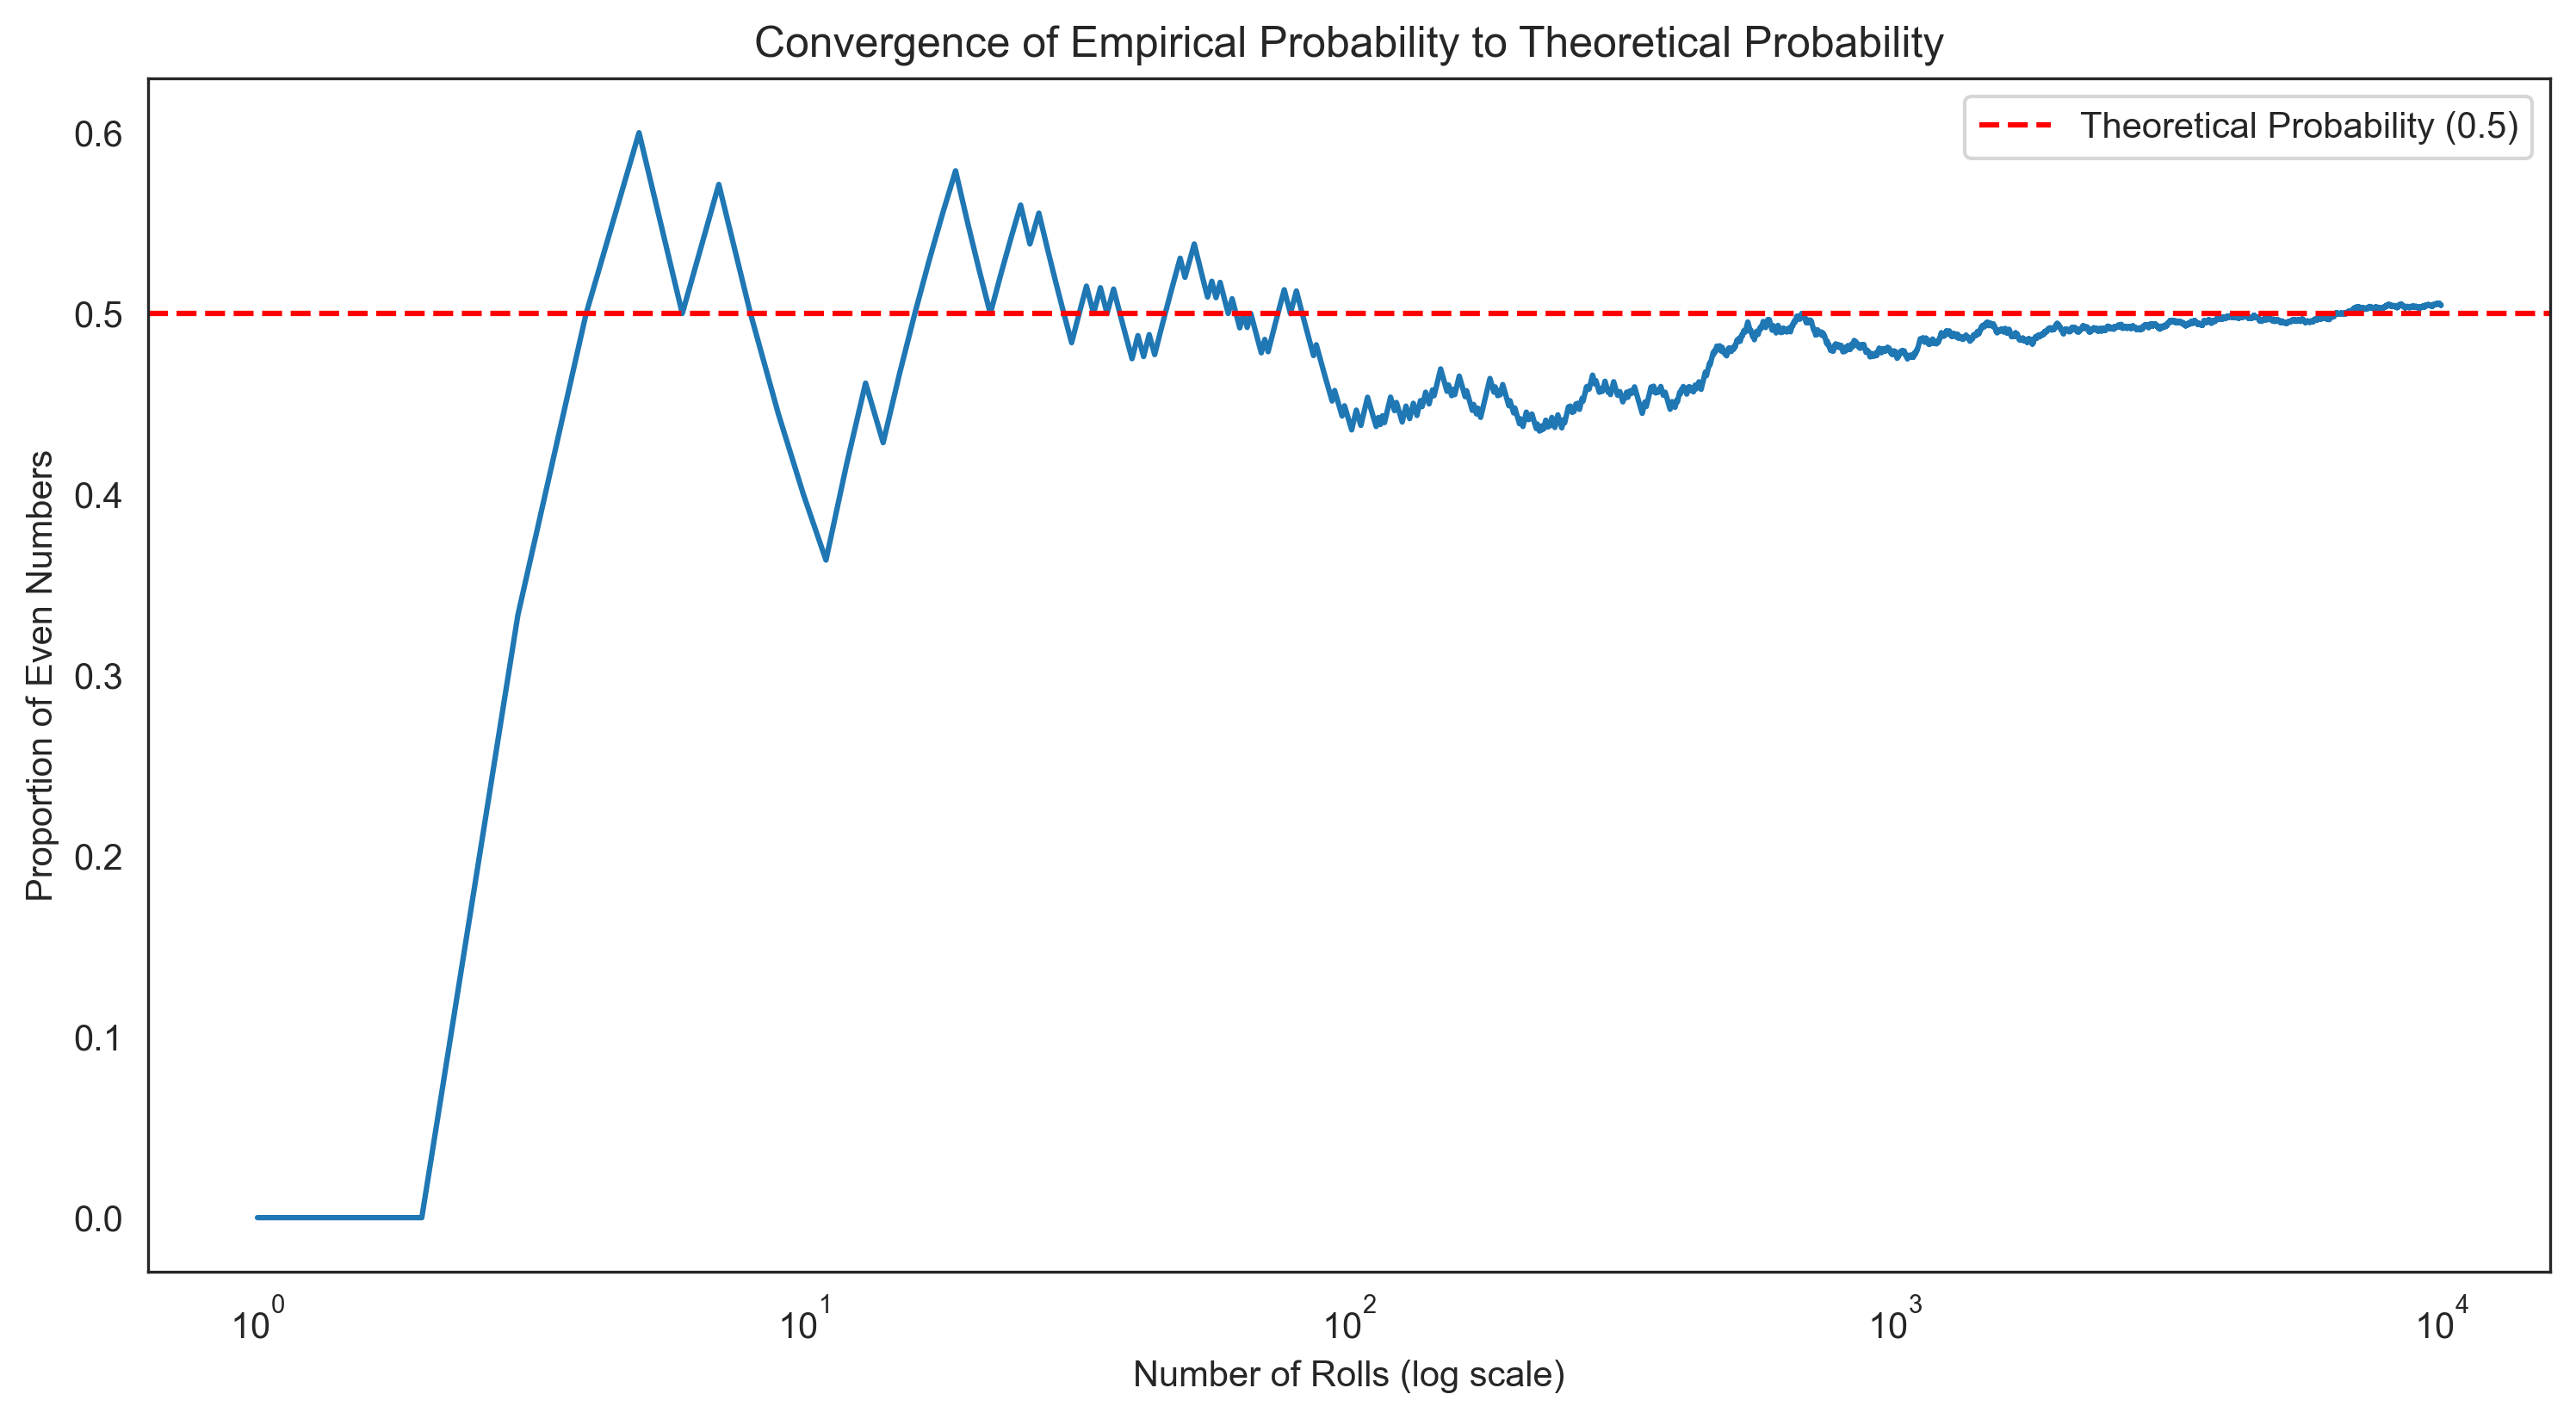

In [5]:
# Simulate many die rolls and track the running proportion of even numbers
max_rolls = 10000
rolls = [roll_die() for _ in range(max_rolls)]
even_rolls = [roll in [2, 4, 6] for roll in rolls]

# Calculate running proportion
running_proportion = np.cumsum(even_rolls) / np.arange(1, max_rolls + 1)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_rolls + 1), running_proportion)
plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical Probability (0.5)')
plt.xscale('log')  # Log scale to better see early behavior
plt.xlabel('Number of Rolls (log scale)')
plt.ylabel('Proportion of Even Numbers')
plt.title('Convergence of Empirical Probability to Theoretical Probability')
plt.legend()
plt.show()

## Probability Rules

### Axioms of Probability

Probability theory is built on three fundamental axioms:

1. **Non-negativity**: For any event E, P(E) ≥ 0
2. **Normalization**: The probability of the entire sample space is 1, P(S) = 1
3. **Additivity**: For mutually exclusive events E and F, P(E ∪ F) = P(E) + P(F)

From these axioms, we can derive several important rules for calculating probabilities.

### Complement Rule

The complement of an event E, denoted as E' or E^c, is the set of all outcomes in the sample space that are not in E. The probability of the complement is:

$$P(E') = 1 - P(E)$$

Let's apply this to our die-rolling example:

In [6]:
# Calculate the complement of "greater than 4"
event_less_than_or_equal_to_4 = {1, 2, 3, 4}  # Complement of "greater than 4"

# Direct calculation
p_less_than_or_equal_to_4 = len(event_less_than_or_equal_to_4) / len(sample_space_die)
print(f"P(Less than or equal to 4) = {p_less_than_or_equal_to_4}")

# Using complement rule
p_less_than_or_equal_to_4_complement = 1 - p_greater_than_4
print(f"P(Less than or equal to 4) using complement rule = {p_less_than_or_equal_to_4_complement}")

# Verify they are the same
print(f"Direct calculation equals complement rule: {p_less_than_or_equal_to_4 == p_less_than_or_equal_to_4_complement}")

P(Less than or equal to 4) = 0.6666666666666666
P(Less than or equal to 4) using complement rule = 0.6666666666666667
Direct calculation equals complement rule: False


### Addition Rule

For any two events E and F, the probability of their union (E or F) is:

$$P(E \cup F) = P(E) + P(F) - P(E \cap F)$$

If E and F are mutually exclusive (they cannot occur simultaneously, so E ∩ F = ∅), then:

$$P(E \cup F) = P(E) + P(F)$$

Let's apply this to our die-rolling example:

In [7]:
# Calculate P(Prime or Greater than 4)
event_prime_or_greater_than_4 = event_prime.union(event_greater_than_4)
p_prime_or_greater_than_4 = len(event_prime_or_greater_than_4) / len(sample_space_die)
print(f"P(Prime or Greater than 4) = {p_prime_or_greater_than_4}")

# Calculate the intersection
event_prime_and_greater_than_4 = event_prime.intersection(event_greater_than_4)
p_prime_and_greater_than_4 = len(event_prime_and_greater_than_4) / len(sample_space_die)
print(f"P(Prime and Greater than 4) = {p_prime_and_greater_than_4}")

# Using addition rule
p_prime_or_greater_than_4_addition = p_prime + p_greater_than_4 - p_prime_and_greater_than_4
print(f"P(Prime or Greater than 4) using addition rule = {p_prime_or_greater_than_4_addition}")

# Verify they are the same
print(f"Direct calculation equals addition rule: {p_prime_or_greater_than_4 == p_prime_or_greater_than_4_addition}")

# Example with mutually exclusive events: Even and Odd
event_even_and_odd = event_even.intersection(event_odd)
print(f"\nEven and Odd intersection: {event_even_and_odd}")
print(f"P(Even or Odd) = {p_even + p_odd}")

P(Prime or Greater than 4) = 0.6666666666666666
P(Prime and Greater than 4) = 0.16666666666666666
P(Prime or Greater than 4) using addition rule = 0.6666666666666666
Direct calculation equals addition rule: True

Even and Odd intersection: set()
P(Even or Odd) = 1.0


Let's visualize these set operations using Venn diagrams:

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


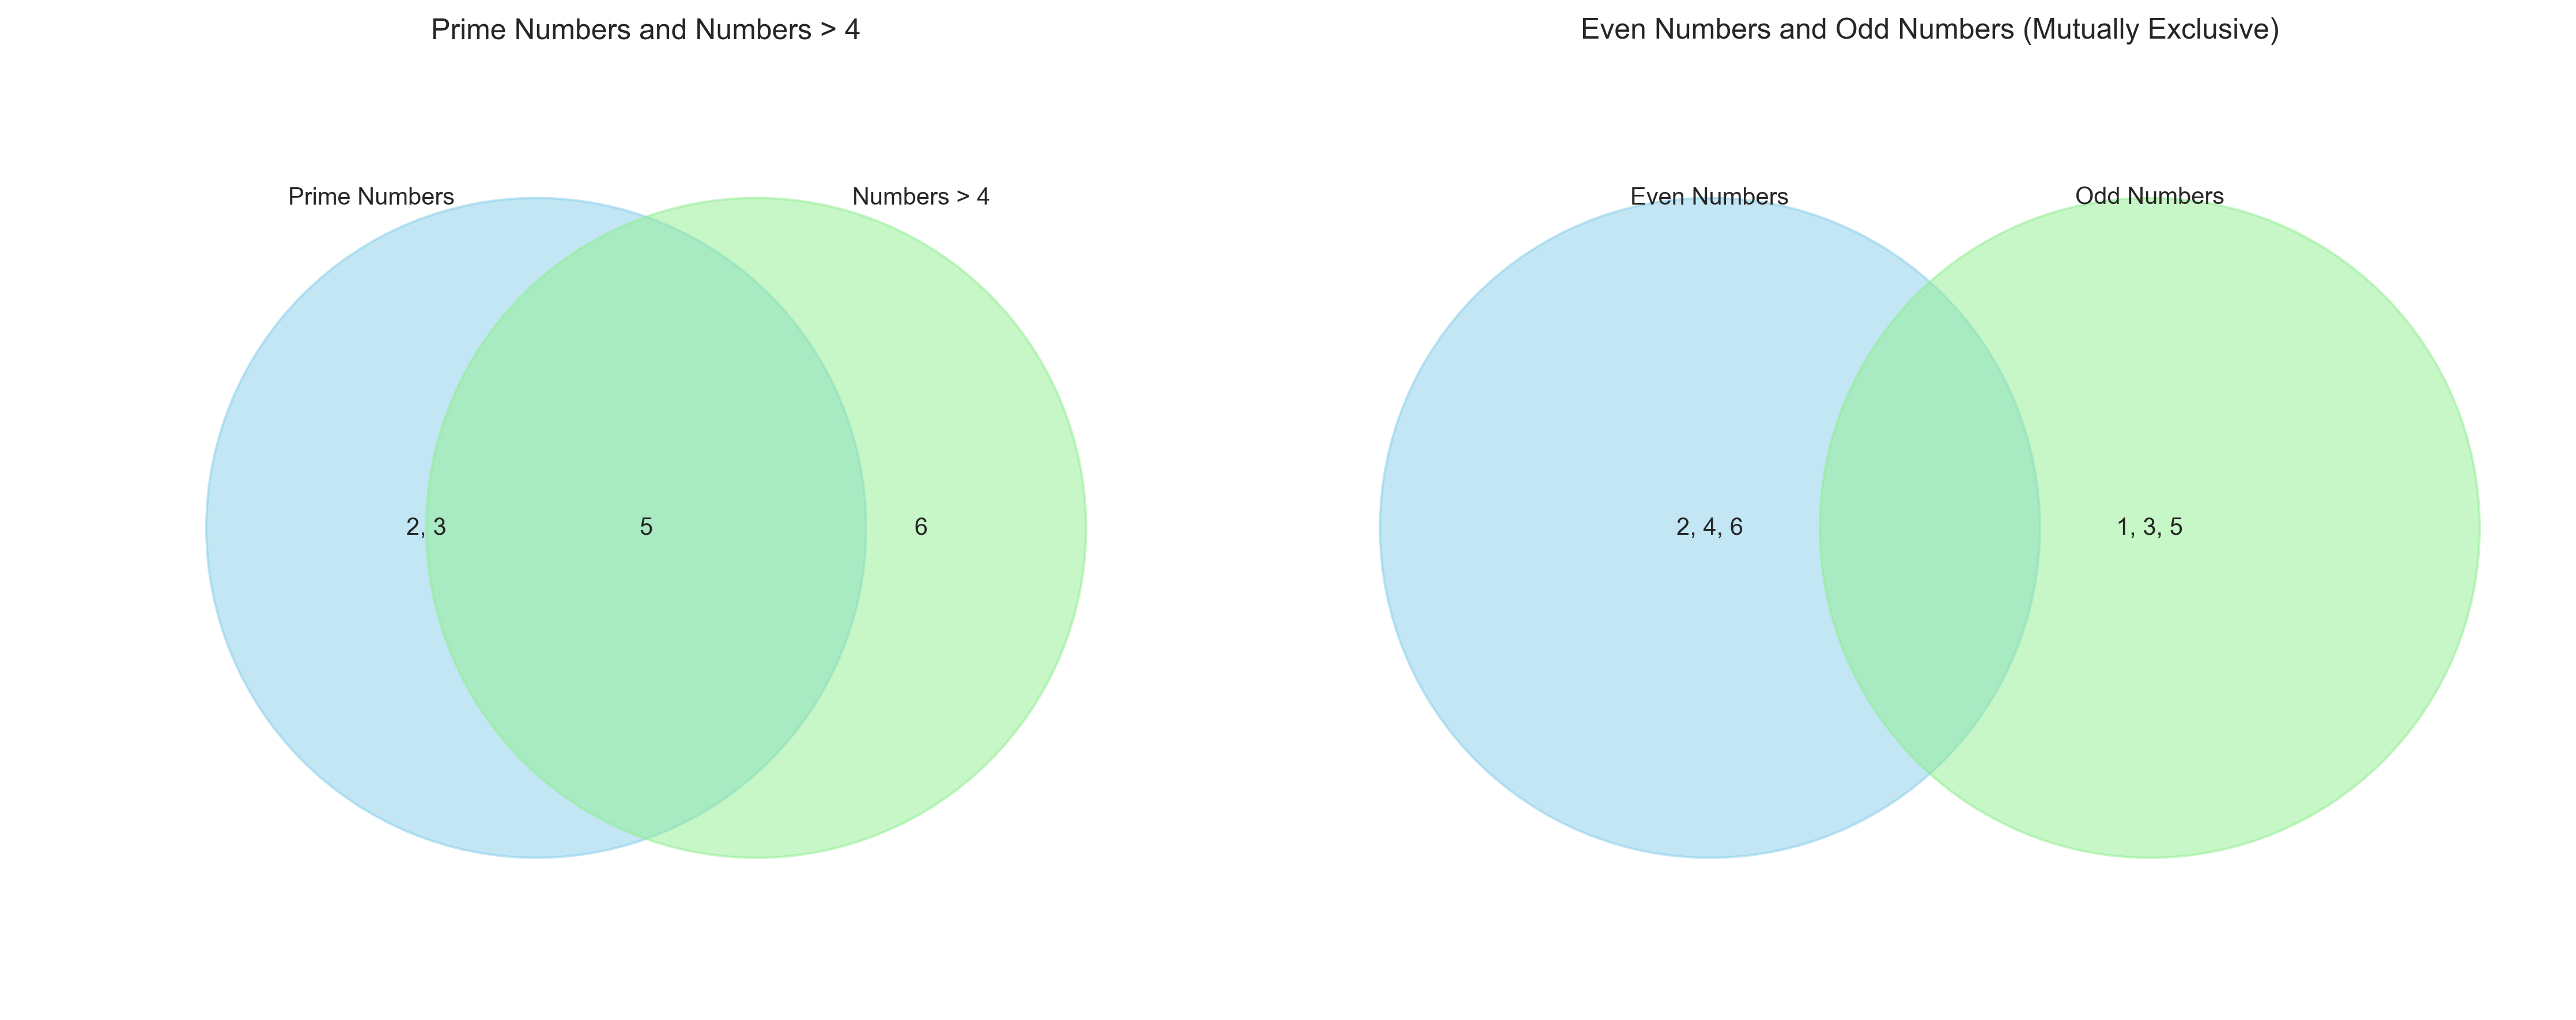

In [8]:
# Alternative implementation without matplotlib_venn
plt.figure(figsize=(15, 6))

# First Venn diagram: Prime and Greater than 4
plt.subplot(1, 2, 1)
# Create custom Venn diagram using circles
circle1 = plt.Circle((0.3, 0.5), 0.3, alpha=0.5, color='skyblue', label='Prime Numbers')
circle2 = plt.Circle((0.5, 0.5), 0.3, alpha=0.5, color='lightgreen', label='Numbers > 4')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.axis('equal')
plt.xlim(0, 0.8)
plt.ylim(0, 1)
plt.axis('off')

# Add labels
plt.text(0.2, 0.5, '2, 3', ha='center', va='center')
plt.text(0.65, 0.5, '6', ha='center', va='center')
plt.text(0.4, 0.5, '5', ha='center', va='center')
plt.text(0.15, 0.8, 'Prime Numbers', ha='center', va='center')
plt.text(0.65, 0.8, 'Numbers > 4', ha='center', va='center')
plt.title('Prime Numbers and Numbers > 4')

# Second Venn diagram: Even and Odd (mutually exclusive)
plt.subplot(1, 2, 2)
# Create non-overlapping circles for mutually exclusive sets
circle1 = plt.Circle((0.3, 0.5), 0.3, alpha=0.5, color='skyblue', label='Even Numbers')
circle2 = plt.Circle((0.7, 0.5), 0.3, alpha=0.5, color='lightgreen', label='Odd Numbers')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# Add labels
plt.text(0.3, 0.5, '2, 4, 6', ha='center', va='center')
plt.text(0.7, 0.5, '1, 3, 5', ha='center', va='center')
plt.text(0.3, 0.8, 'Even Numbers', ha='center', va='center')
plt.text(0.7, 0.8, 'Odd Numbers', ha='center', va='center')
plt.title('Even Numbers and Odd Numbers (Mutually Exclusive)')

plt.tight_layout()
plt.show()

### Conditional Probability

Conditional probability is the probability of an event occurring given that another event has already occurred. The conditional probability of event A given event B is denoted as P(A|B) and is calculated as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

provided that P(B) > 0.

Let's explore this with a psychological example: the relationship between anxiety and test performance.

In [9]:
# Create a contingency table for anxiety levels and test performance
# Rows: Anxiety Level (High, Low)
# Columns: Test Performance (Good, Poor)
contingency_table = pd.DataFrame({
    'Good Performance': [15, 45],  # 15 students with high anxiety, 45 with low anxiety
    'Poor Performance': [35, 5]    # 35 students with high anxiety, 5 with low anxiety
}, index=['High Anxiety', 'Low Anxiety'])

print("Contingency Table: Anxiety Level vs. Test Performance")
print(contingency_table)

# Calculate total number of students
total_students = contingency_table.values.sum()
print(f"\nTotal number of students: {total_students}")

# Calculate marginal probabilities
p_high_anxiety = contingency_table.loc['High Anxiety'].sum() / total_students
p_low_anxiety = contingency_table.loc['Low Anxiety'].sum() / total_students
p_good_performance = contingency_table['Good Performance'].sum() / total_students
p_poor_performance = contingency_table['Poor Performance'].sum() / total_students

print("\nMarginal Probabilities:")
print(f"P(High Anxiety) = {p_high_anxiety:.2f}")
print(f"P(Low Anxiety) = {p_low_anxiety:.2f}")
print(f"P(Good Performance) = {p_good_performance:.2f}")
print(f"P(Poor Performance) = {p_poor_performance:.2f}")

# Calculate joint probabilities
p_high_anxiety_good_performance = contingency_table.loc['High Anxiety', 'Good Performance'] / total_students
p_high_anxiety_poor_performance = contingency_table.loc['High Anxiety', 'Poor Performance'] / total_students
p_low_anxiety_good_performance = contingency_table.loc['Low Anxiety', 'Good Performance'] / total_students
p_low_anxiety_poor_performance = contingency_table.loc['Low Anxiety', 'Poor Performance'] / total_students

print("\nJoint Probabilities:")
print(f"P(High Anxiety and Good Performance) = {p_high_anxiety_good_performance:.2f}")
print(f"P(High Anxiety and Poor Performance) = {p_high_anxiety_poor_performance:.2f}")
print(f"P(Low Anxiety and Good Performance) = {p_low_anxiety_good_performance:.2f}")
print(f"P(Low Anxiety and Poor Performance) = {p_low_anxiety_poor_performance:.2f}")

# Calculate conditional probabilities
p_good_performance_given_high_anxiety = p_high_anxiety_good_performance / p_high_anxiety
p_poor_performance_given_high_anxiety = p_high_anxiety_poor_performance / p_high_anxiety
p_good_performance_given_low_anxiety = p_low_anxiety_good_performance / p_low_anxiety
p_poor_performance_given_low_anxiety = p_low_anxiety_poor_performance / p_low_anxiety

print("\nConditional Probabilities:")
print(f"P(Good Performance | High Anxiety) = {p_good_performance_given_high_anxiety:.2f}")
print(f"P(Poor Performance | High Anxiety) = {p_poor_performance_given_high_anxiety:.2f}")
print(f"P(Good Performance | Low Anxiety) = {p_good_performance_given_low_anxiety:.2f}")
print(f"P(Poor Performance | Low Anxiety) = {p_poor_performance_given_low_anxiety:.2f}")

Contingency Table: Anxiety Level vs. Test Performance
              Good Performance  Poor Performance
High Anxiety                15                35
Low Anxiety                 45                 5

Total number of students: 100

Marginal Probabilities:
P(High Anxiety) = 0.50
P(Low Anxiety) = 0.50
P(Good Performance) = 0.60
P(Poor Performance) = 0.40

Joint Probabilities:
P(High Anxiety and Good Performance) = 0.15
P(High Anxiety and Poor Performance) = 0.35
P(Low Anxiety and Good Performance) = 0.45
P(Low Anxiety and Poor Performance) = 0.05

Conditional Probabilities:
P(Good Performance | High Anxiety) = 0.30
P(Poor Performance | High Anxiety) = 0.70
P(Good Performance | Low Anxiety) = 0.90
P(Poor Performance | Low Anxiety) = 0.10


Let's visualize this relationship:

C:\Users\khoda\AppData\Local\Temp\ipykernel_8012\3401228732.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pos = row[0] + val/2


<Figure size 2400x1800 with 0 Axes>

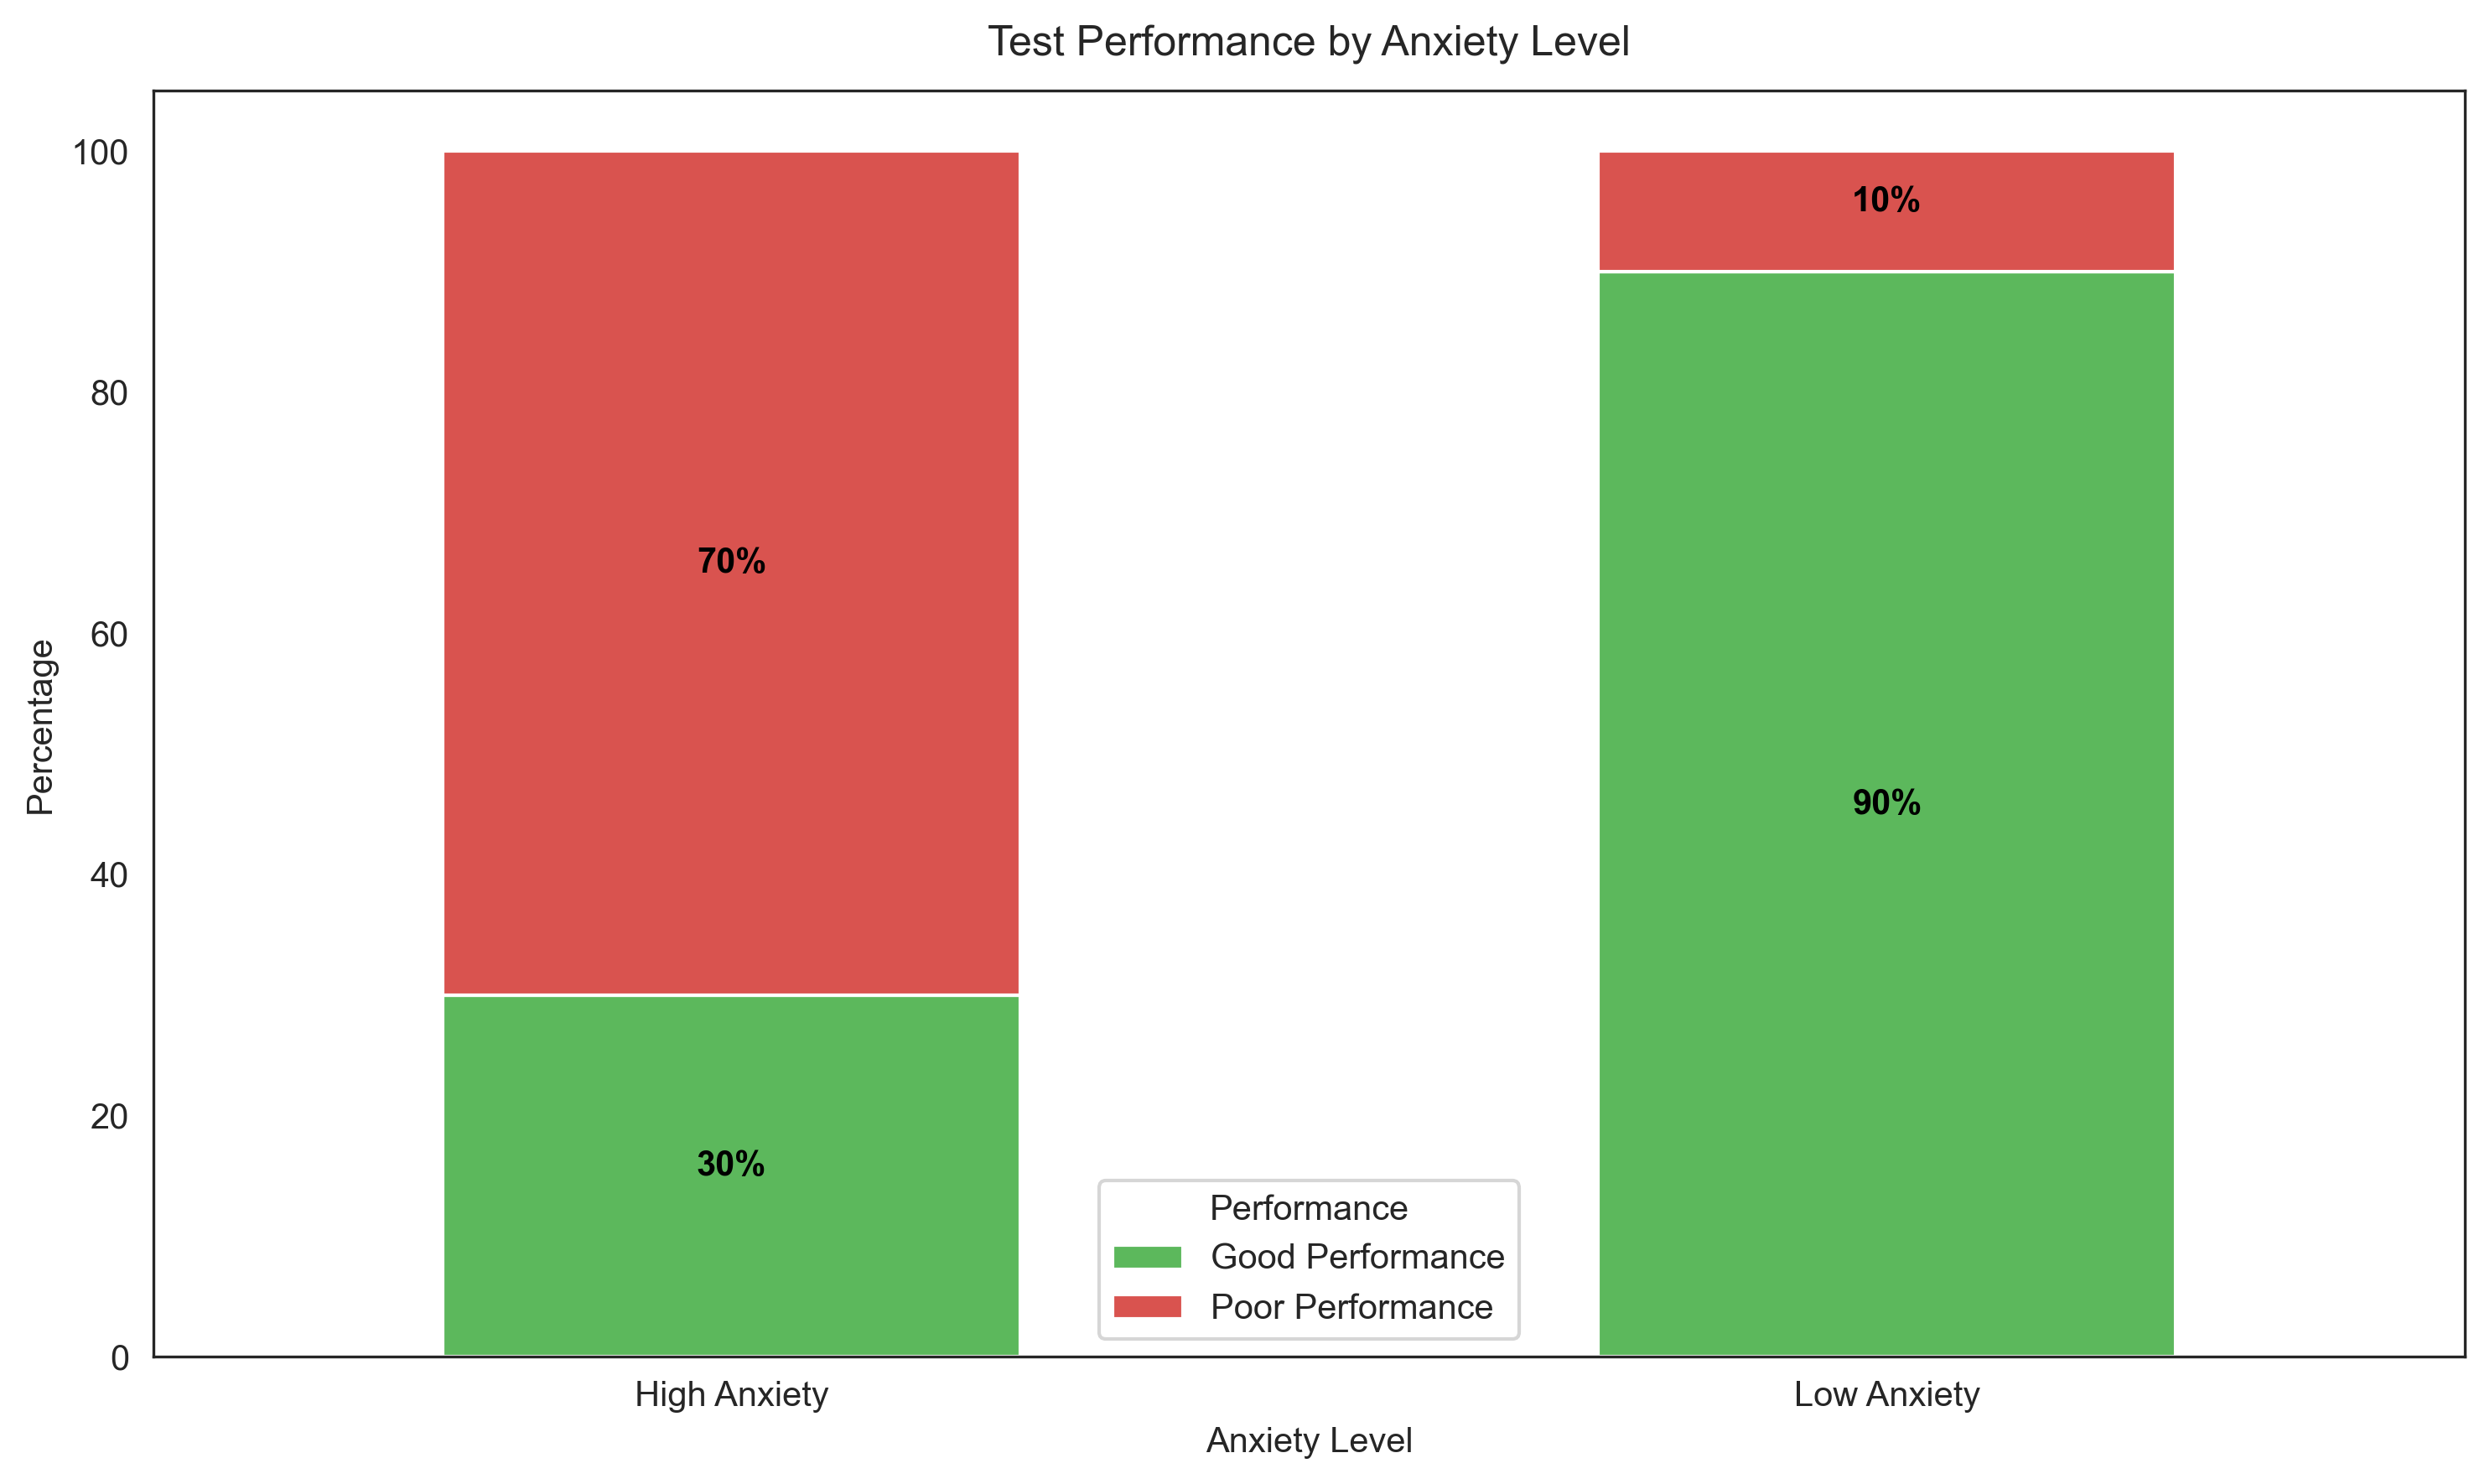

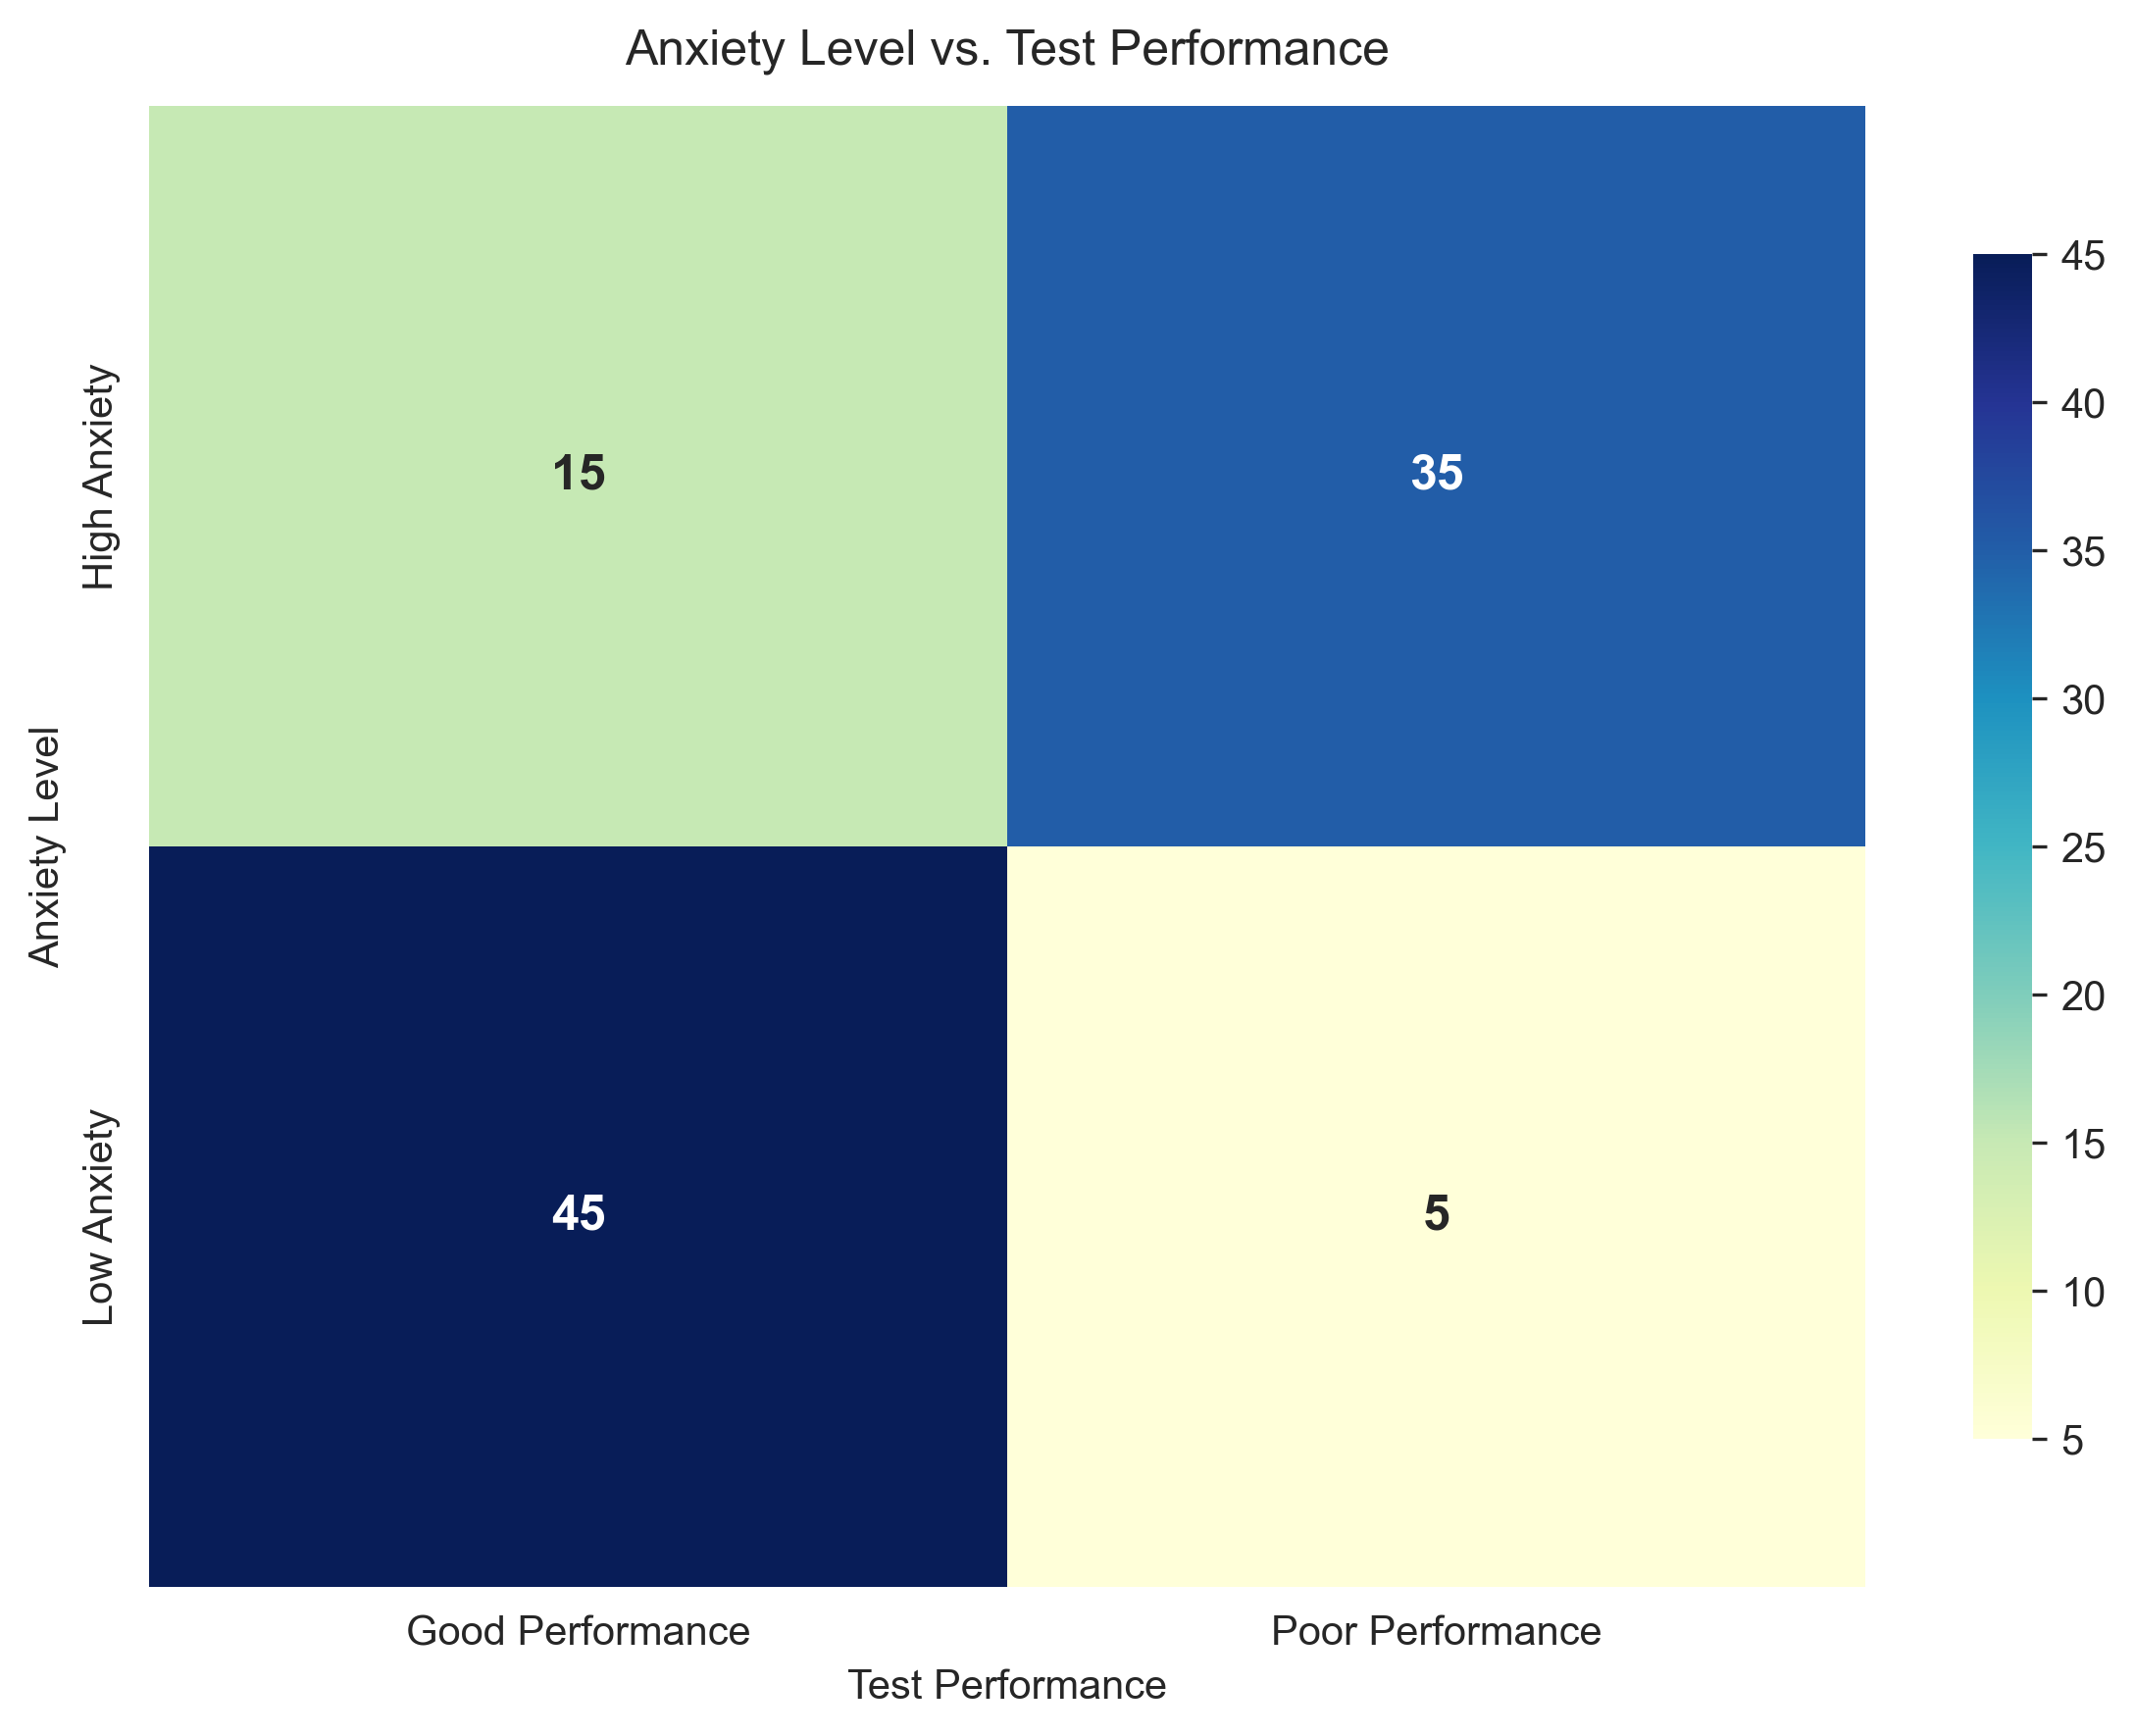

In [10]:
# Create two separate figures instead of subplots
# First figure - Stacked bar chart
plt.figure(figsize=(8, 6))
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
ax1 = contingency_table_percentage.plot(kind='bar', stacked=True, color=['#5cb85c', '#d9534f'])
plt.title('Test Performance by Anxiety Level', fontsize=12, pad=10)
plt.xlabel('Anxiety Level', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.legend(title='Performance')
plt.xticks(rotation=0)

# Add percentage labels on bars
for i, (idx, row) in enumerate(contingency_table_percentage.iterrows()):
    for j, val in enumerate(row):
        if val > 5:  # Only show label if segment is large enough
            # Calculate position for text
            if j == 0:
                y_pos = val/2
            else:
                y_pos = row[0] + val/2
            ax1.text(i, y_pos, f'{val:.0f}%', ha='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

# Second figure - Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', 
            annot_kws={"size": 12, "weight": "bold"},
            cbar_kws={"shrink": 0.8})
plt.title('Anxiety Level vs. Test Performance', fontsize=12, pad=10)
plt.xlabel('Test Performance', fontsize=10)
plt.ylabel('Anxiety Level', fontsize=10)
plt.tight_layout()
plt.show()

### Multiplication Rule

The multiplication rule allows us to calculate the probability of the intersection of two events:

$$P(A \cap B) = P(A|B) \times P(B) = P(B|A) \times P(A)$$

If events A and B are independent (the occurrence of one does not affect the probability of the other), then:

$$P(A \cap B) = P(A) \times P(B)$$

Let's apply this to our anxiety and test performance example:

In [11]:
# Using the multiplication rule to calculate joint probabilities
p_high_anxiety_good_performance_calc = p_good_performance_given_high_anxiety * p_high_anxiety
print(f"P(High Anxiety and Good Performance) = {p_high_anxiety_good_performance_calc:.2f}")

# Check if anxiety and performance are independent
p_high_anxiety_good_performance_if_independent = p_high_anxiety * p_good_performance
print(f"P(High Anxiety and Good Performance) if independent = {p_high_anxiety_good_performance_if_independent:.2f}")
print(f"Are anxiety and performance independent? {p_high_anxiety_good_performance == p_high_anxiety_good_performance_if_independent}")

# Calculate the difference to quantify the strength of dependence
dependence_strength = p_high_anxiety_good_performance - p_high_anxiety_good_performance_if_independent
print(f"Strength of dependence: {dependence_strength:.2f}")

P(High Anxiety and Good Performance) = 0.15
P(High Anxiety and Good Performance) if independent = 0.30
Are anxiety and performance independent? False
Strength of dependence: -0.15


### Bayes' Theorem

Bayes' theorem provides a way to update our beliefs based on new evidence. It relates the conditional probability of an event A given B to the conditional probability of B given A:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

This theorem is particularly important in psychological research for updating prior beliefs based on new data.

Let's apply Bayes' theorem to a clinical psychology example: diagnosing a psychological disorder based on a screening test.

In [12]:
# Define variables for a psychological screening test
prevalence = 0.05  # 5% of the population has the disorder (prior probability)
sensitivity = 0.90  # 90% of people with the disorder test positive (true positive rate)
specificity = 0.80  # 80% of people without the disorder test negative (true negative rate)

# Calculate false positive rate
false_positive_rate = 1 - specificity

# Calculate the probability of a positive test
p_positive_test = sensitivity * prevalence + false_positive_rate * (1 - prevalence)

# Apply Bayes' theorem to calculate the probability of having the disorder given a positive test
p_disorder_given_positive = (sensitivity * prevalence) / p_positive_test

print("Psychological Screening Test Analysis:")
print(f"Prevalence of disorder: {prevalence:.2f} (prior probability)")
print(f"Sensitivity of test: {sensitivity:.2f} (true positive rate)")
print(f"Specificity of test: {specificity:.2f} (true negative rate)")
print(f"False positive rate: {false_positive_rate:.2f}")
print(f"Probability of a positive test: {p_positive_test:.2f}")
print(f"Probability of having the disorder given a positive test: {p_disorder_given_positive:.2f} (posterior probability)")

Psychological Screening Test Analysis:
Prevalence of disorder: 0.05 (prior probability)
Sensitivity of test: 0.90 (true positive rate)
Specificity of test: 0.80 (true negative rate)
False positive rate: 0.20
Probability of a positive test: 0.23
Probability of having the disorder given a positive test: 0.19 (posterior probability)


Let's visualize this Bayesian updating process:

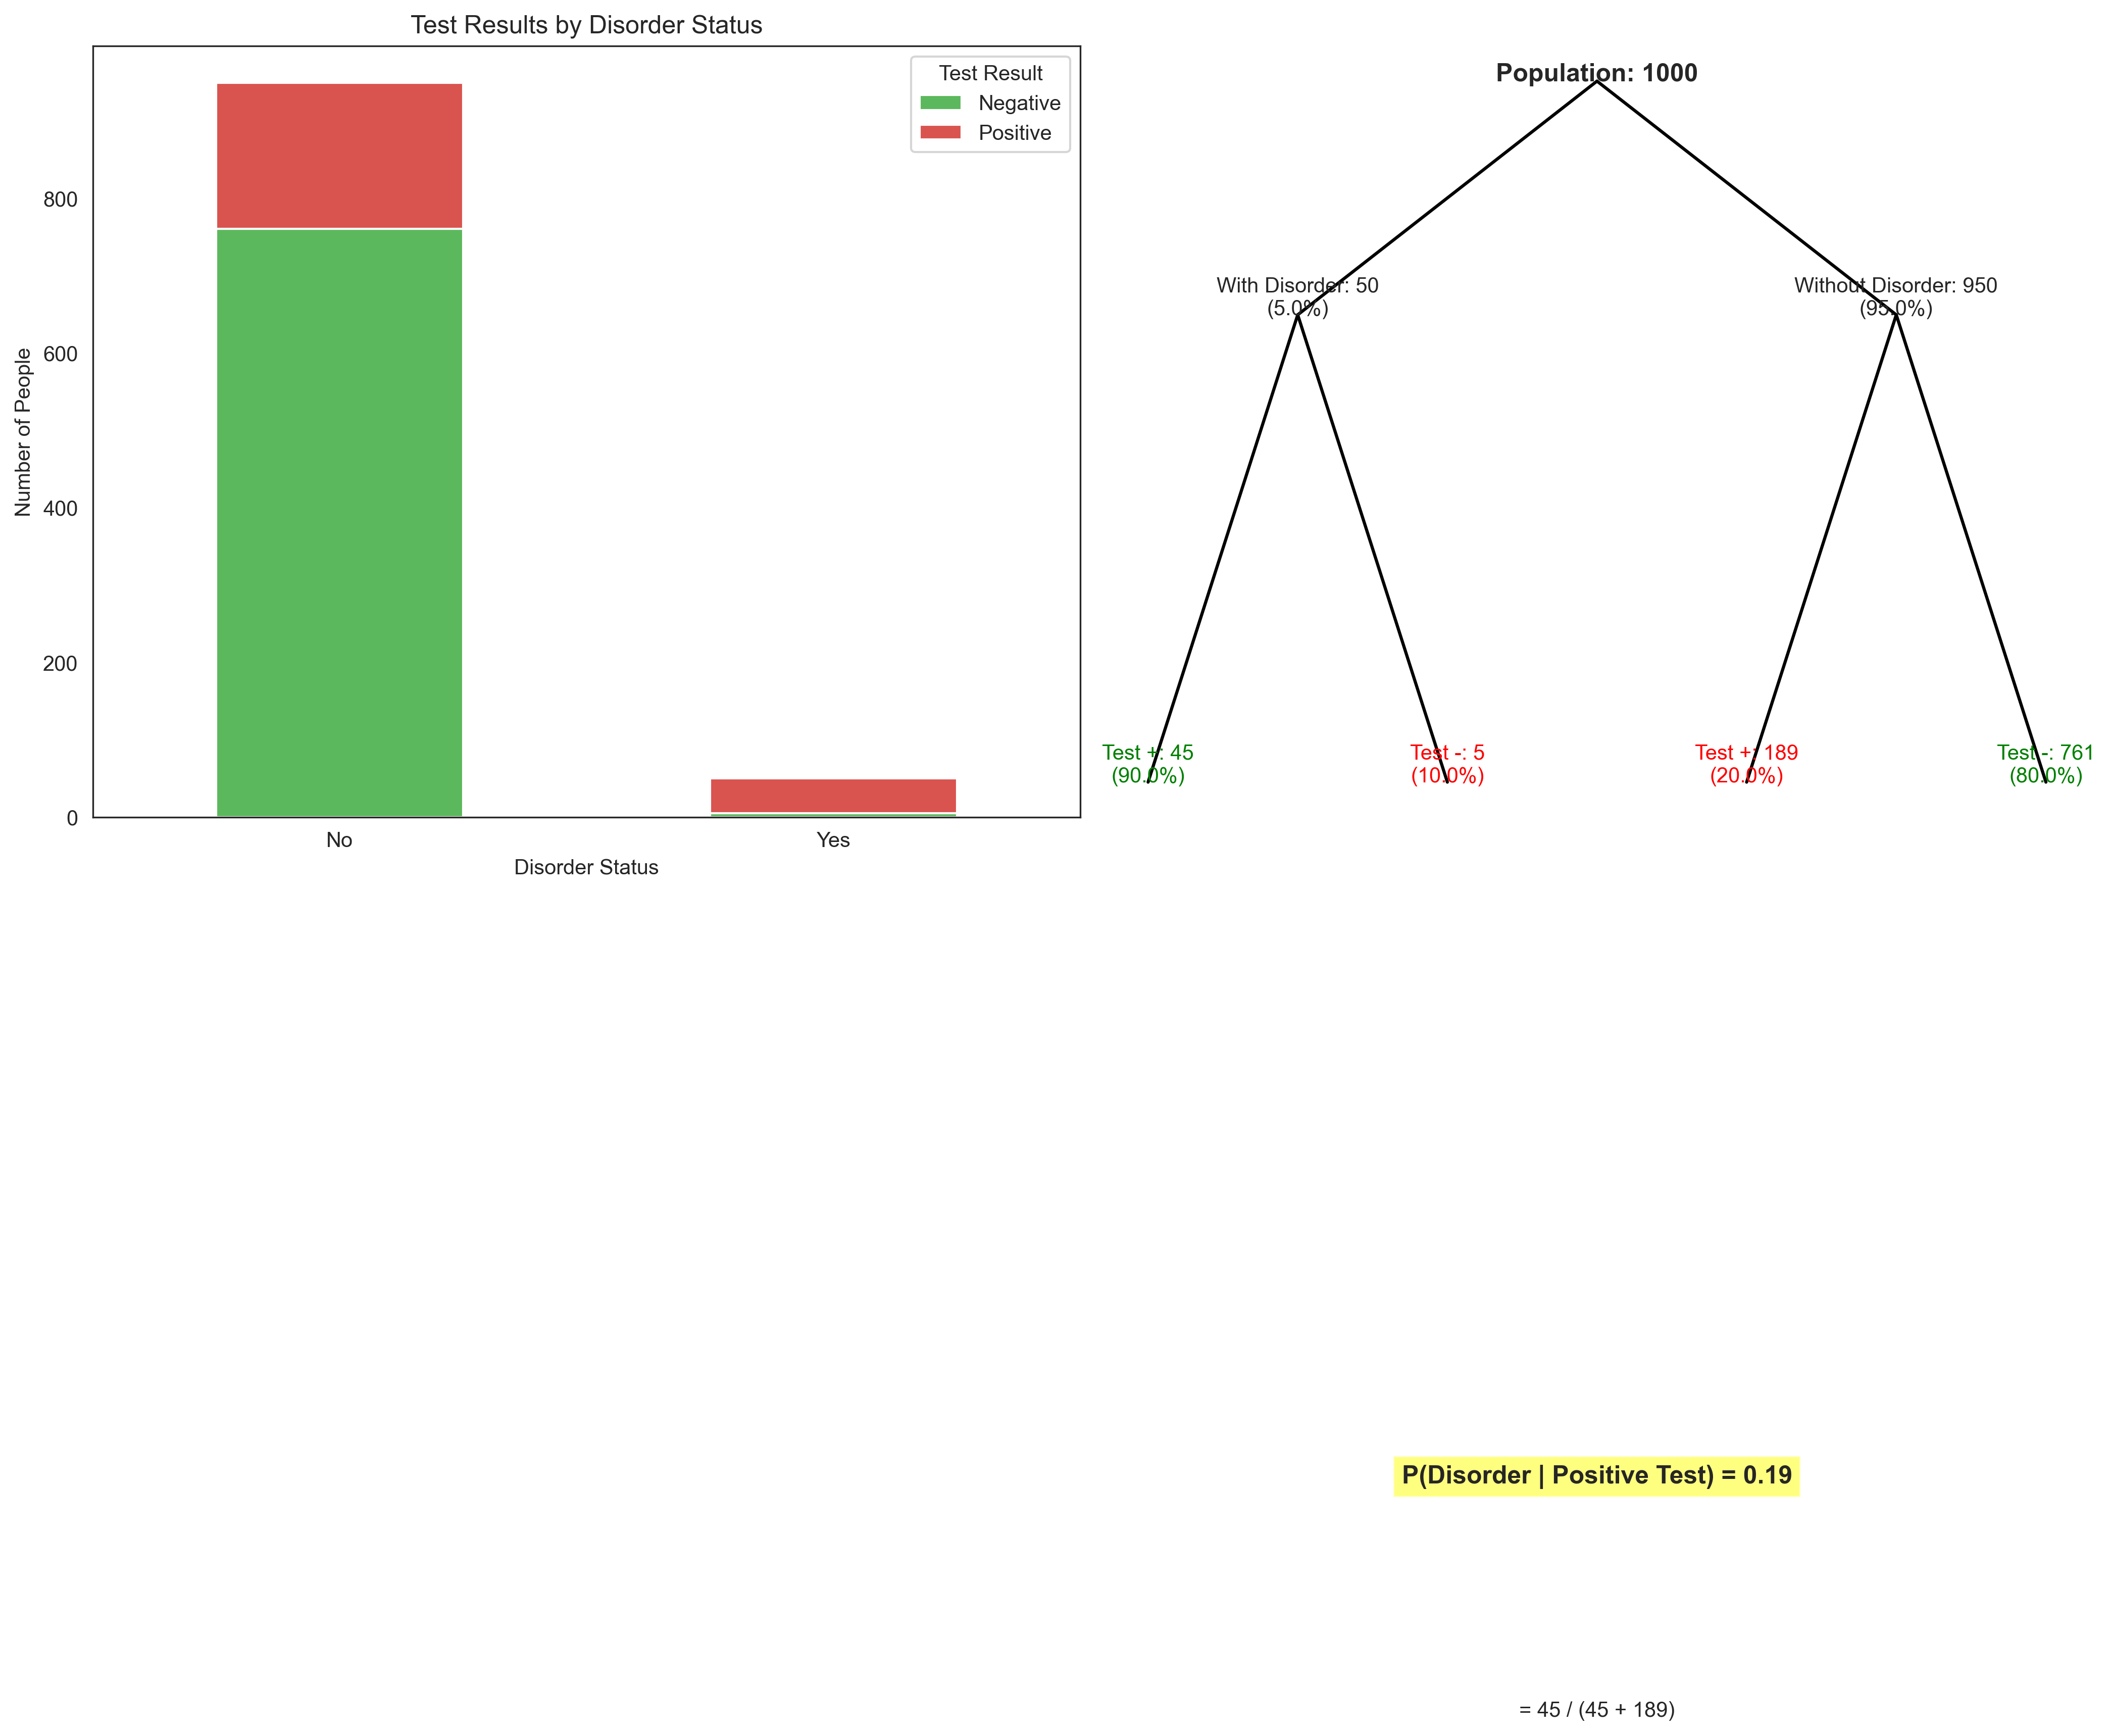

In [13]:
# Create a population of 1000 people
population_size = 1000
num_with_disorder = int(prevalence * population_size)
num_without_disorder = population_size - num_with_disorder

# Calculate test outcomes
true_positives = int(sensitivity * num_with_disorder)
false_negatives = num_with_disorder - true_positives
false_positives = int(false_positive_rate * num_without_disorder)
true_negatives = num_without_disorder - false_positives

# Create a DataFrame for visualization
data = {
    'Disorder': ['Yes', 'Yes', 'No', 'No'],
    'Test Result': ['Positive', 'Negative', 'Positive', 'Negative'],
    'Count': [true_positives, false_negatives, false_positives, true_negatives]
}
df = pd.DataFrame(data)

# Pivot the DataFrame for better visualization
pivot_df = df.pivot(index='Disorder', columns='Test Result', values='Count')

# Visualize
plt.figure(figsize=(14, 6))

# Stacked bar chart
# Stacked bar chart
plt.subplot(1, 2, 1)
pivot_df.plot(kind='bar', stacked=True, color=['#5cb85c', '#d9534f'], ax=plt.gca())
plt.title('Test Results by Disorder Status')
plt.xlabel('Disorder Status')
plt.ylabel('Number of People')
plt.xticks(rotation=0)

# Tree diagram
plt.subplot(1, 2, 2)
plt.axis('off')
plt.text(0.5, 0.9, f'Population: {population_size}', ha='center', fontsize=12, fontweight='bold')
plt.text(0.3, 0.8, f'With Disorder: {num_with_disorder}\n({prevalence:.1%})', ha='center')
plt.text(0.7, 0.8, f'Without Disorder: {num_without_disorder}\n({1-prevalence:.1%})', ha='center')
plt.text(0.2, 0.6, f'Test +: {true_positives}\n({sensitivity:.1%})', ha='center', color='green')
plt.text(0.4, 0.6, f'Test -: {false_negatives}\n({1-sensitivity:.1%})', ha='center', color='red')
plt.text(0.6, 0.6, f'Test +: {false_positives}\n({false_positive_rate:.1%})', ha='center', color='red')
plt.text(0.8, 0.6, f'Test -: {true_negatives}\n({specificity:.1%})', ha='center', color='green')

# Draw lines connecting the nodes
plt.plot([0.5, 0.3], [0.9, 0.8], 'k-')
plt.plot([0.5, 0.7], [0.9, 0.8], 'k-')
plt.plot([0.3, 0.2], [0.8, 0.6], 'k-')
plt.plot([0.3, 0.4], [0.8, 0.6], 'k-')
plt.plot([0.7, 0.6], [0.8, 0.6], 'k-')
plt.plot([0.7, 0.8], [0.8, 0.6], 'k-')

# Add Bayes' theorem result
plt.text(0.5, 0.3, f'P(Disorder | Positive Test) = {p_disorder_given_positive:.2f}', 
         ha='center', fontsize=12, fontweight='bold', 
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.text(0.5, 0.2, f'= {true_positives} / ({true_positives} + {false_positives})', ha='center')

plt.tight_layout()
plt.show()

This example illustrates an important concept in clinical psychology known as the **base rate fallacy**. Even with a relatively accurate test (90% sensitivity, 80% specificity), the probability of actually having the disorder given a positive test result is only about 19% when the disorder is rare in the population (5% prevalence). This is why understanding probability, particularly Bayes' theorem, is crucial for making accurate clinical judgments.

## Random Variables and Probability Distributions

A random variable is a variable whose value is determined by the outcome of a random process. Random variables can be:

- **Discrete**: Taking on a countable number of distinct values (e.g., number of correct responses on a test)
- **Continuous**: Taking on any value in a continuous range (e.g., reaction time in milliseconds)

The probability distribution of a random variable describes the probabilities associated with all possible values of the variable.

### Discrete Probability Distributions

For a discrete random variable X, the probability mass function (PMF) gives the probability that X takes on a specific value x:

$$P(X = x)$$

Let's explore some common discrete distributions relevant to psychology.

#### Bernoulli Distribution

The Bernoulli distribution models a single trial with two possible outcomes: success (1) with probability p, or failure (0) with probability 1-p. This is useful for modeling binary responses in psychology, such as correct/incorrect answers or yes/no decisions.

$$P(X = x) = p^x (1-p)^{1-x}, \quad x \in \{0, 1\}$$

Bernoulli PMF:
P(X = 0) = 0.30000000000000004
P(X = 1) = 0.7


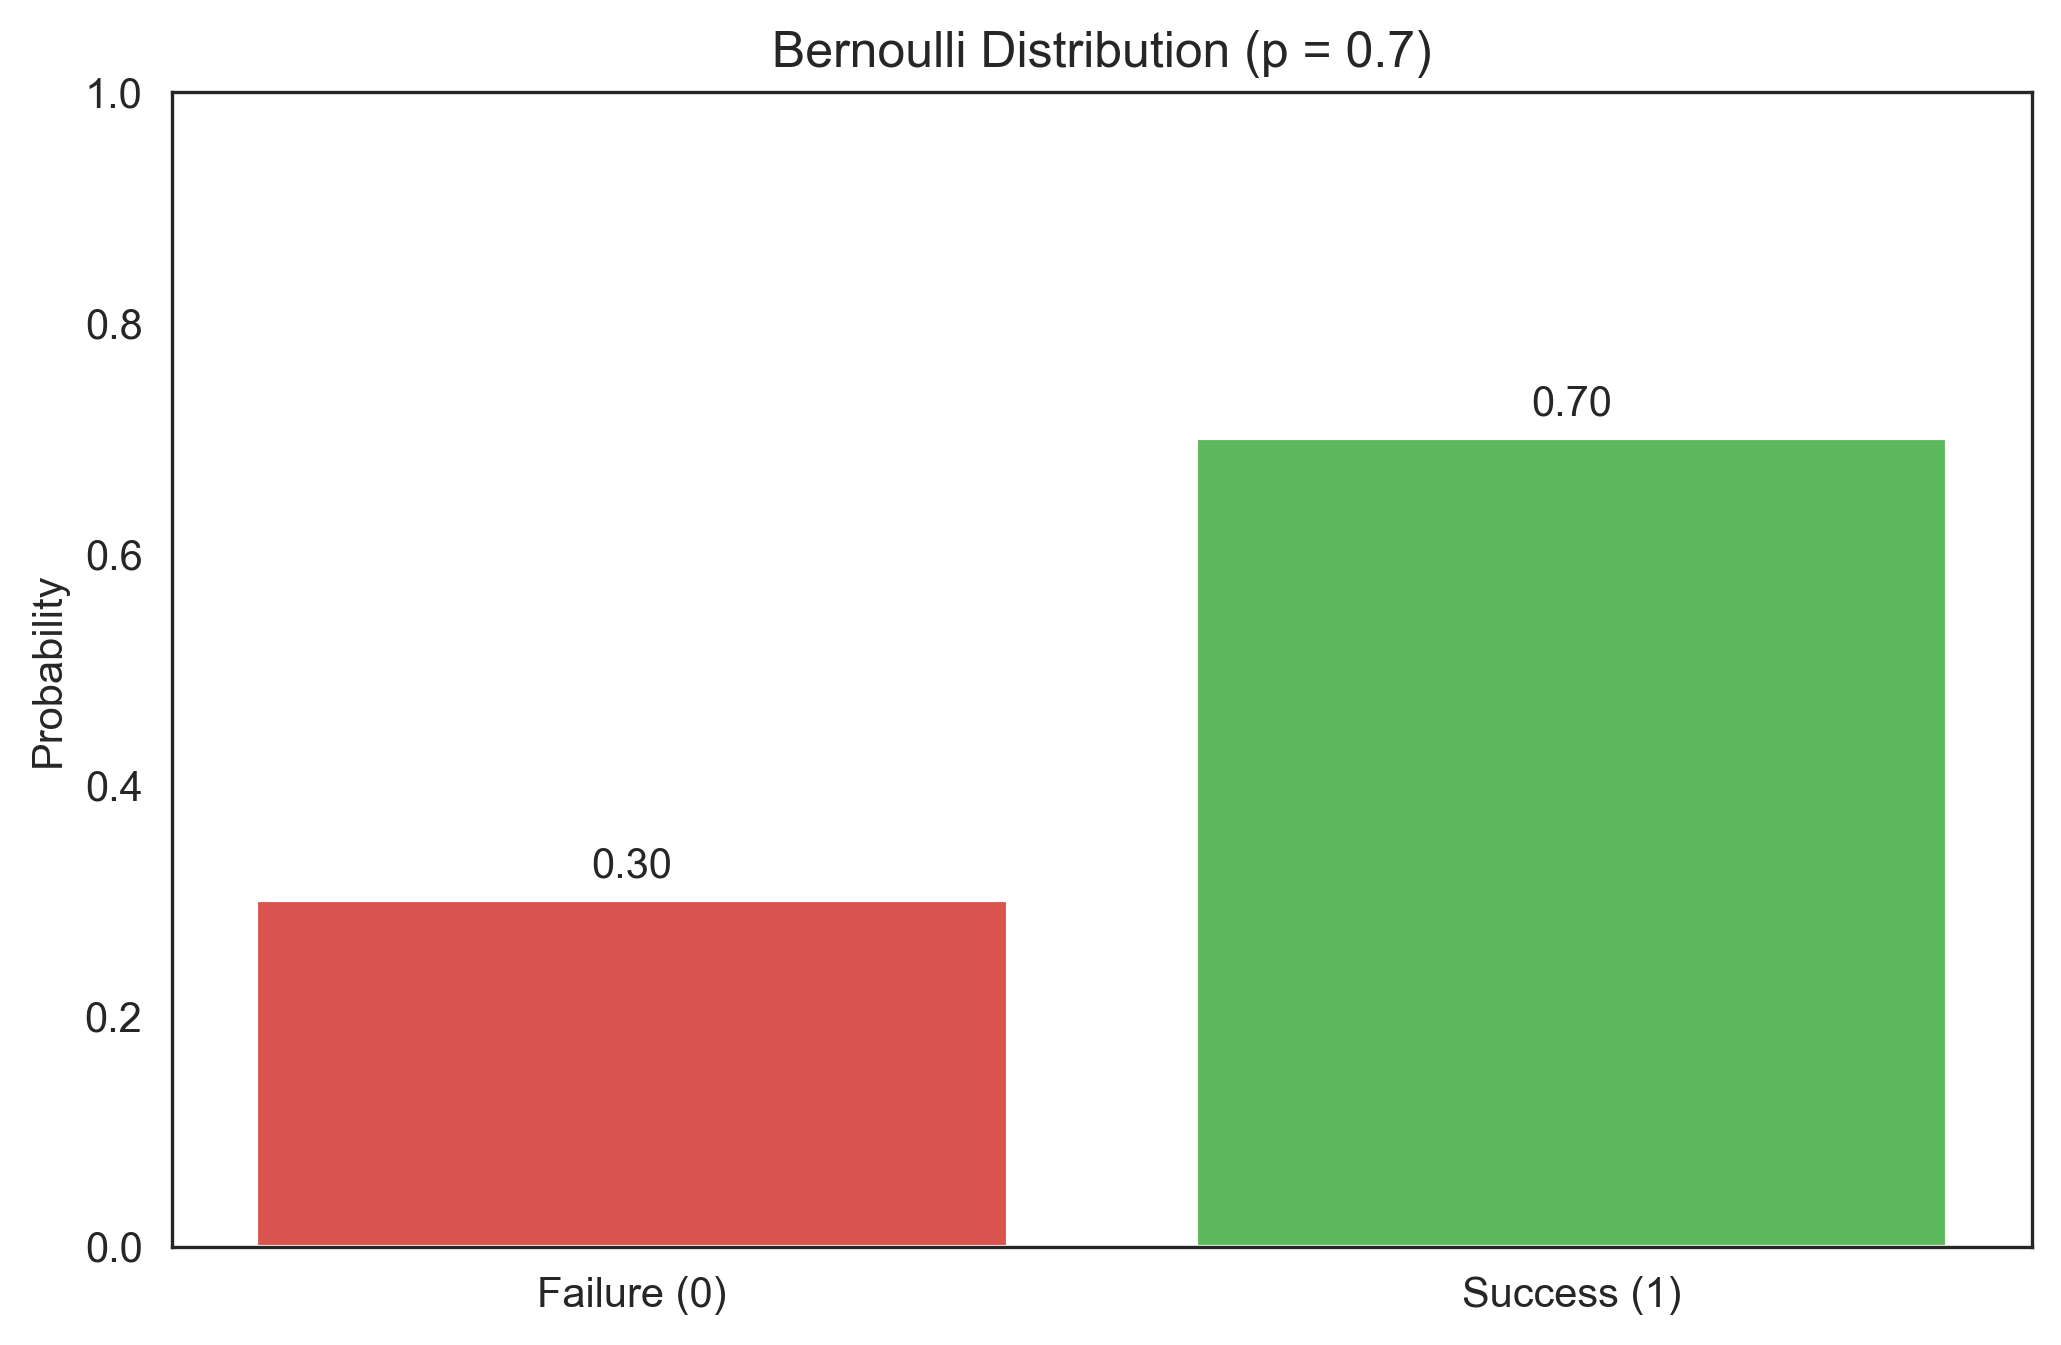

In [14]:
# Bernoulli distribution
p_success = 0.7  # Probability of success

# PMF
bernoulli_pmf = {0: 1-p_success, 1: p_success}
print("Bernoulli PMF:")
print(f"P(X = 0) = {bernoulli_pmf[0]}")
print(f"P(X = 1) = {bernoulli_pmf[1]}")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar([0, 1], [bernoulli_pmf[0], bernoulli_pmf[1]], color=['#d9534f', '#5cb85c'])
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.ylabel('Probability')
plt.title(f'Bernoulli Distribution (p = {p_success})')
plt.ylim(0, 1)

for i, v in enumerate([bernoulli_pmf[0], bernoulli_pmf[1]]):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.show()

#### Binomial Distribution

The binomial distribution models the number of successes in n independent Bernoulli trials, each with probability of success p. This is useful for modeling the number of correct responses in a fixed number of trials.

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k \in \{0, 1, 2, \ldots, n\}$$

where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient.

Binomial Distribution:
Mean: 7.0
Variance: 2.1000000000000005
Standard Deviation: 1.45


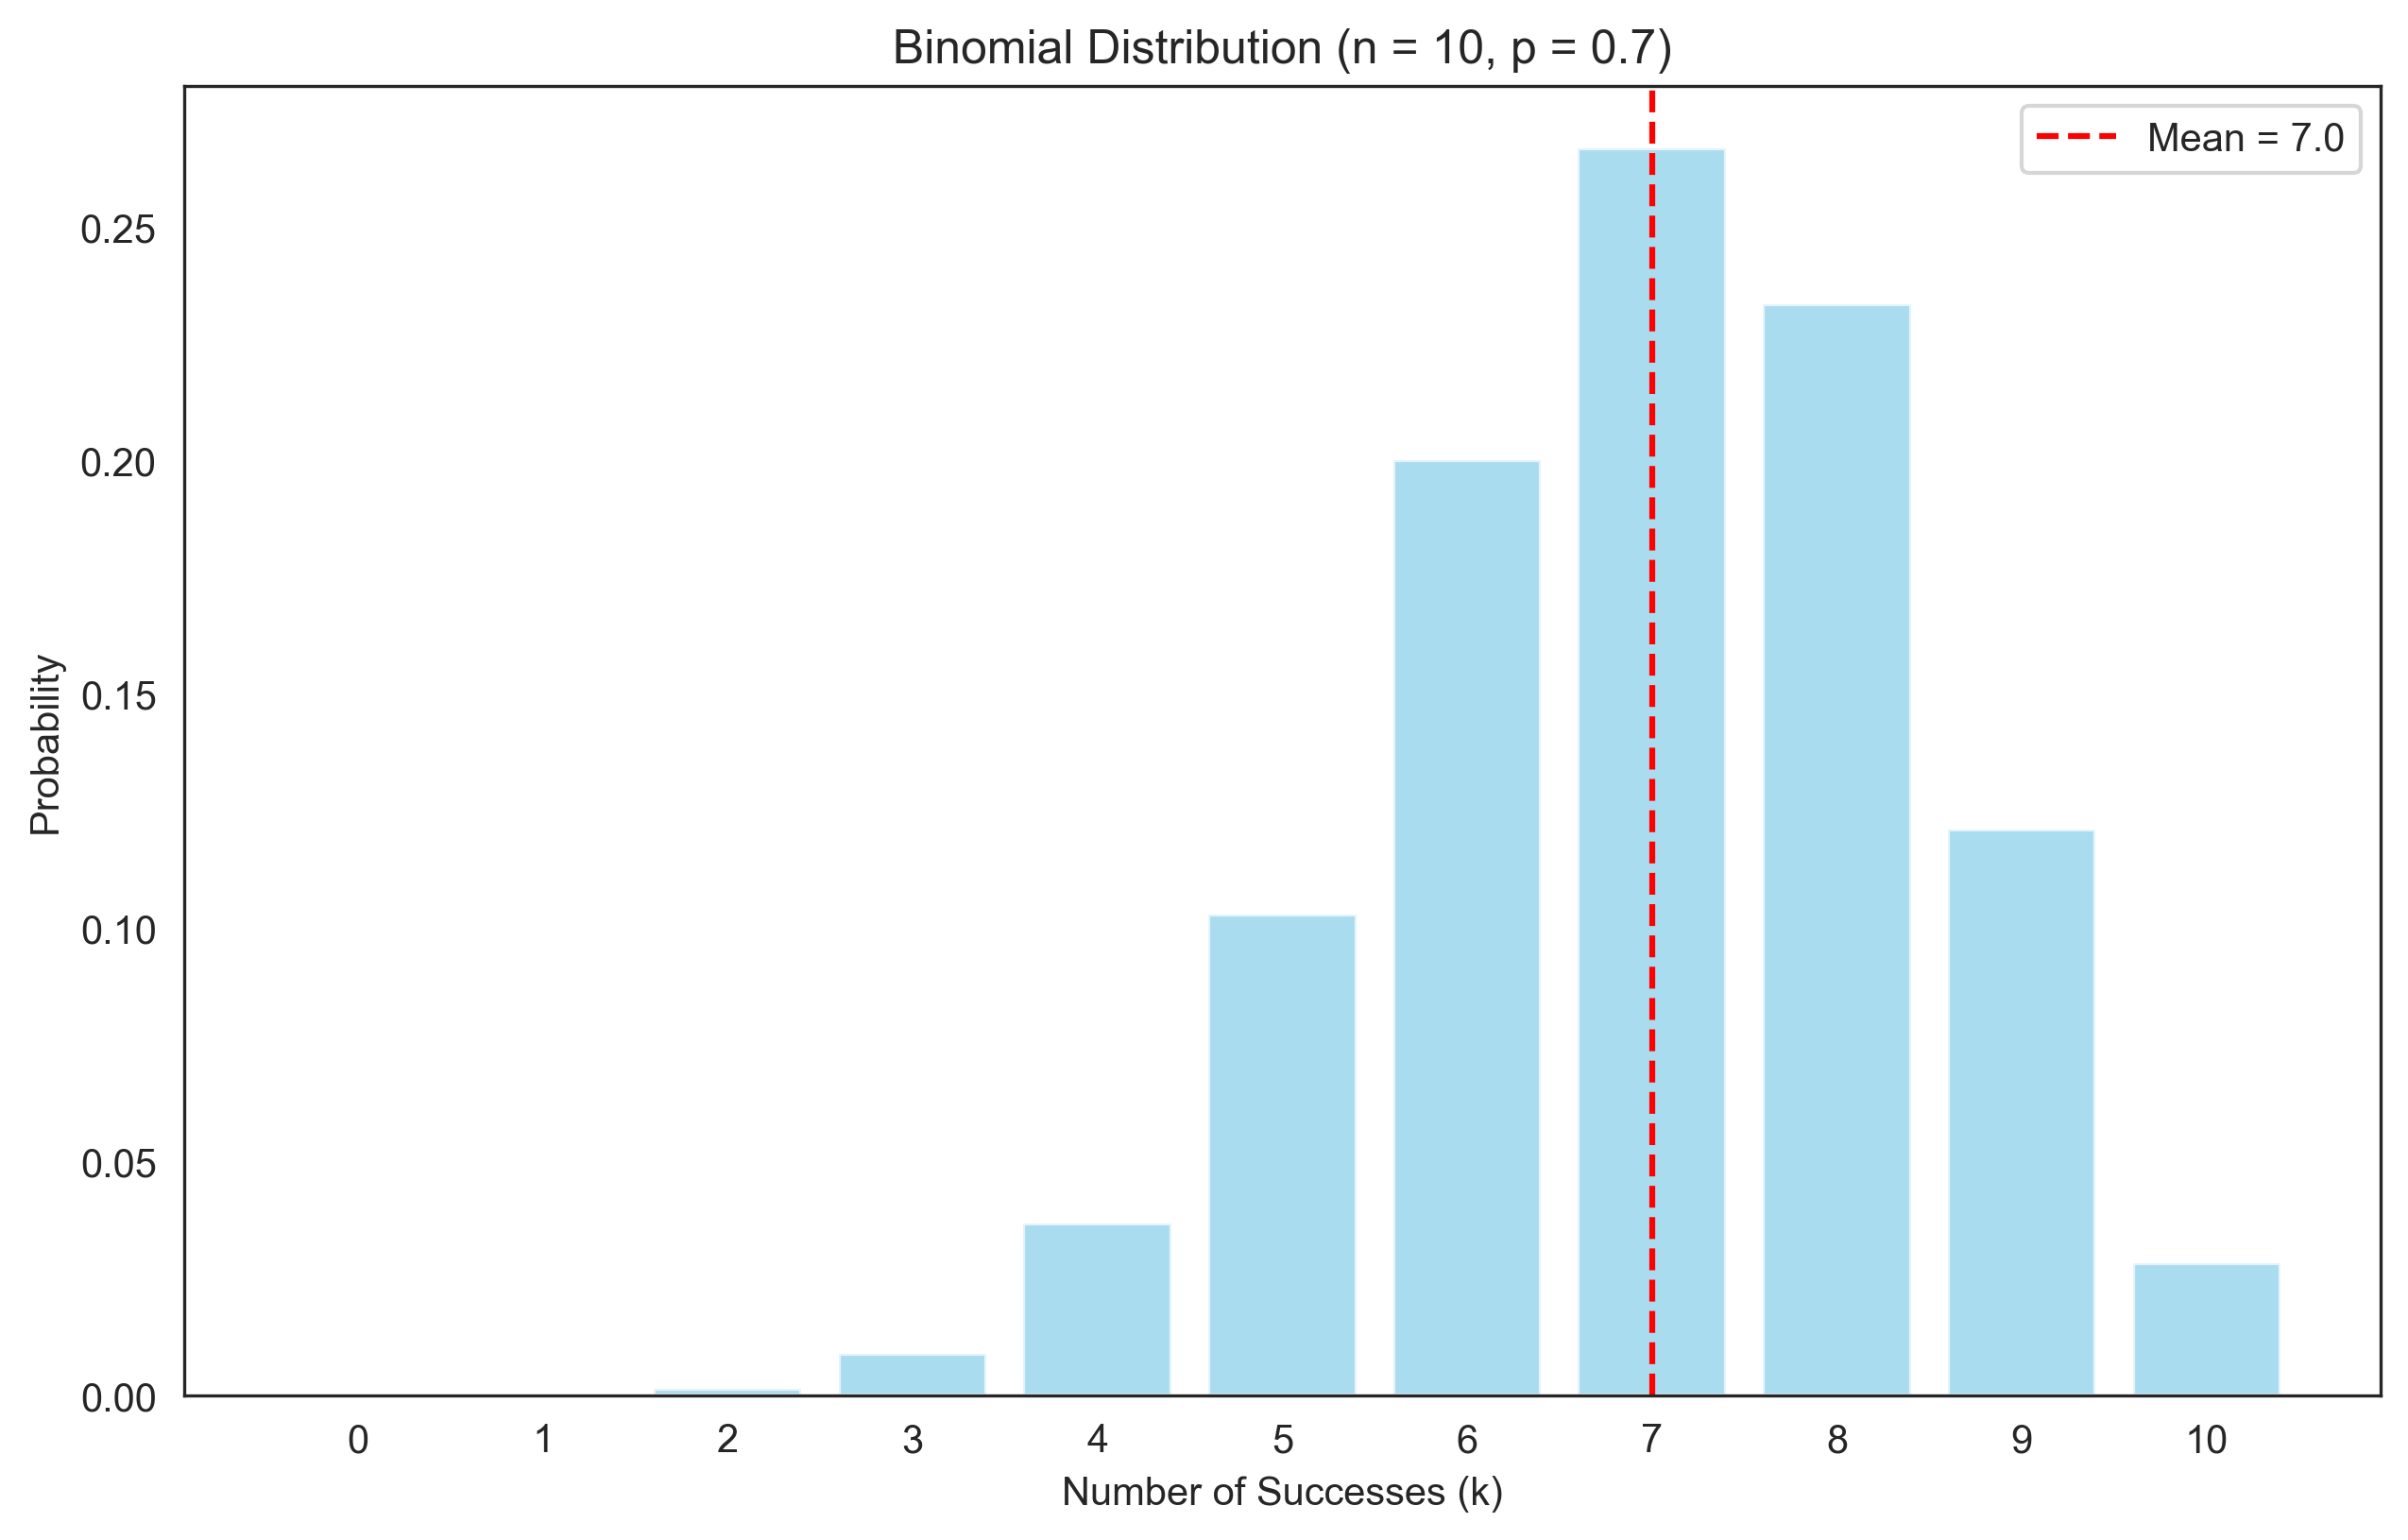

In [15]:
# Binomial distribution
n_trials = 10  # Number of trials
p_success = 0.7  # Probability of success in each trial

# Calculate PMF
k_values = np.arange(0, n_trials + 1)
binomial_pmf = stats.binom.pmf(k_values, n_trials, p_success)

# Calculate mean and variance
mean_binomial = n_trials * p_success
var_binomial = n_trials * p_success * (1 - p_success)

print("Binomial Distribution:")
print(f"Mean: {mean_binomial}")
print(f"Variance: {var_binomial}")
print(f"Standard Deviation: {np.sqrt(var_binomial):.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(k_values, binomial_pmf, color='skyblue', alpha=0.7)
plt.axvline(mean_binomial, color='red', linestyle='--', label=f'Mean = {mean_binomial}')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n = {n_trials}, p = {p_success})')
plt.xticks(k_values)
plt.legend()
plt.show()

Let's see how the binomial distribution changes with different parameters:

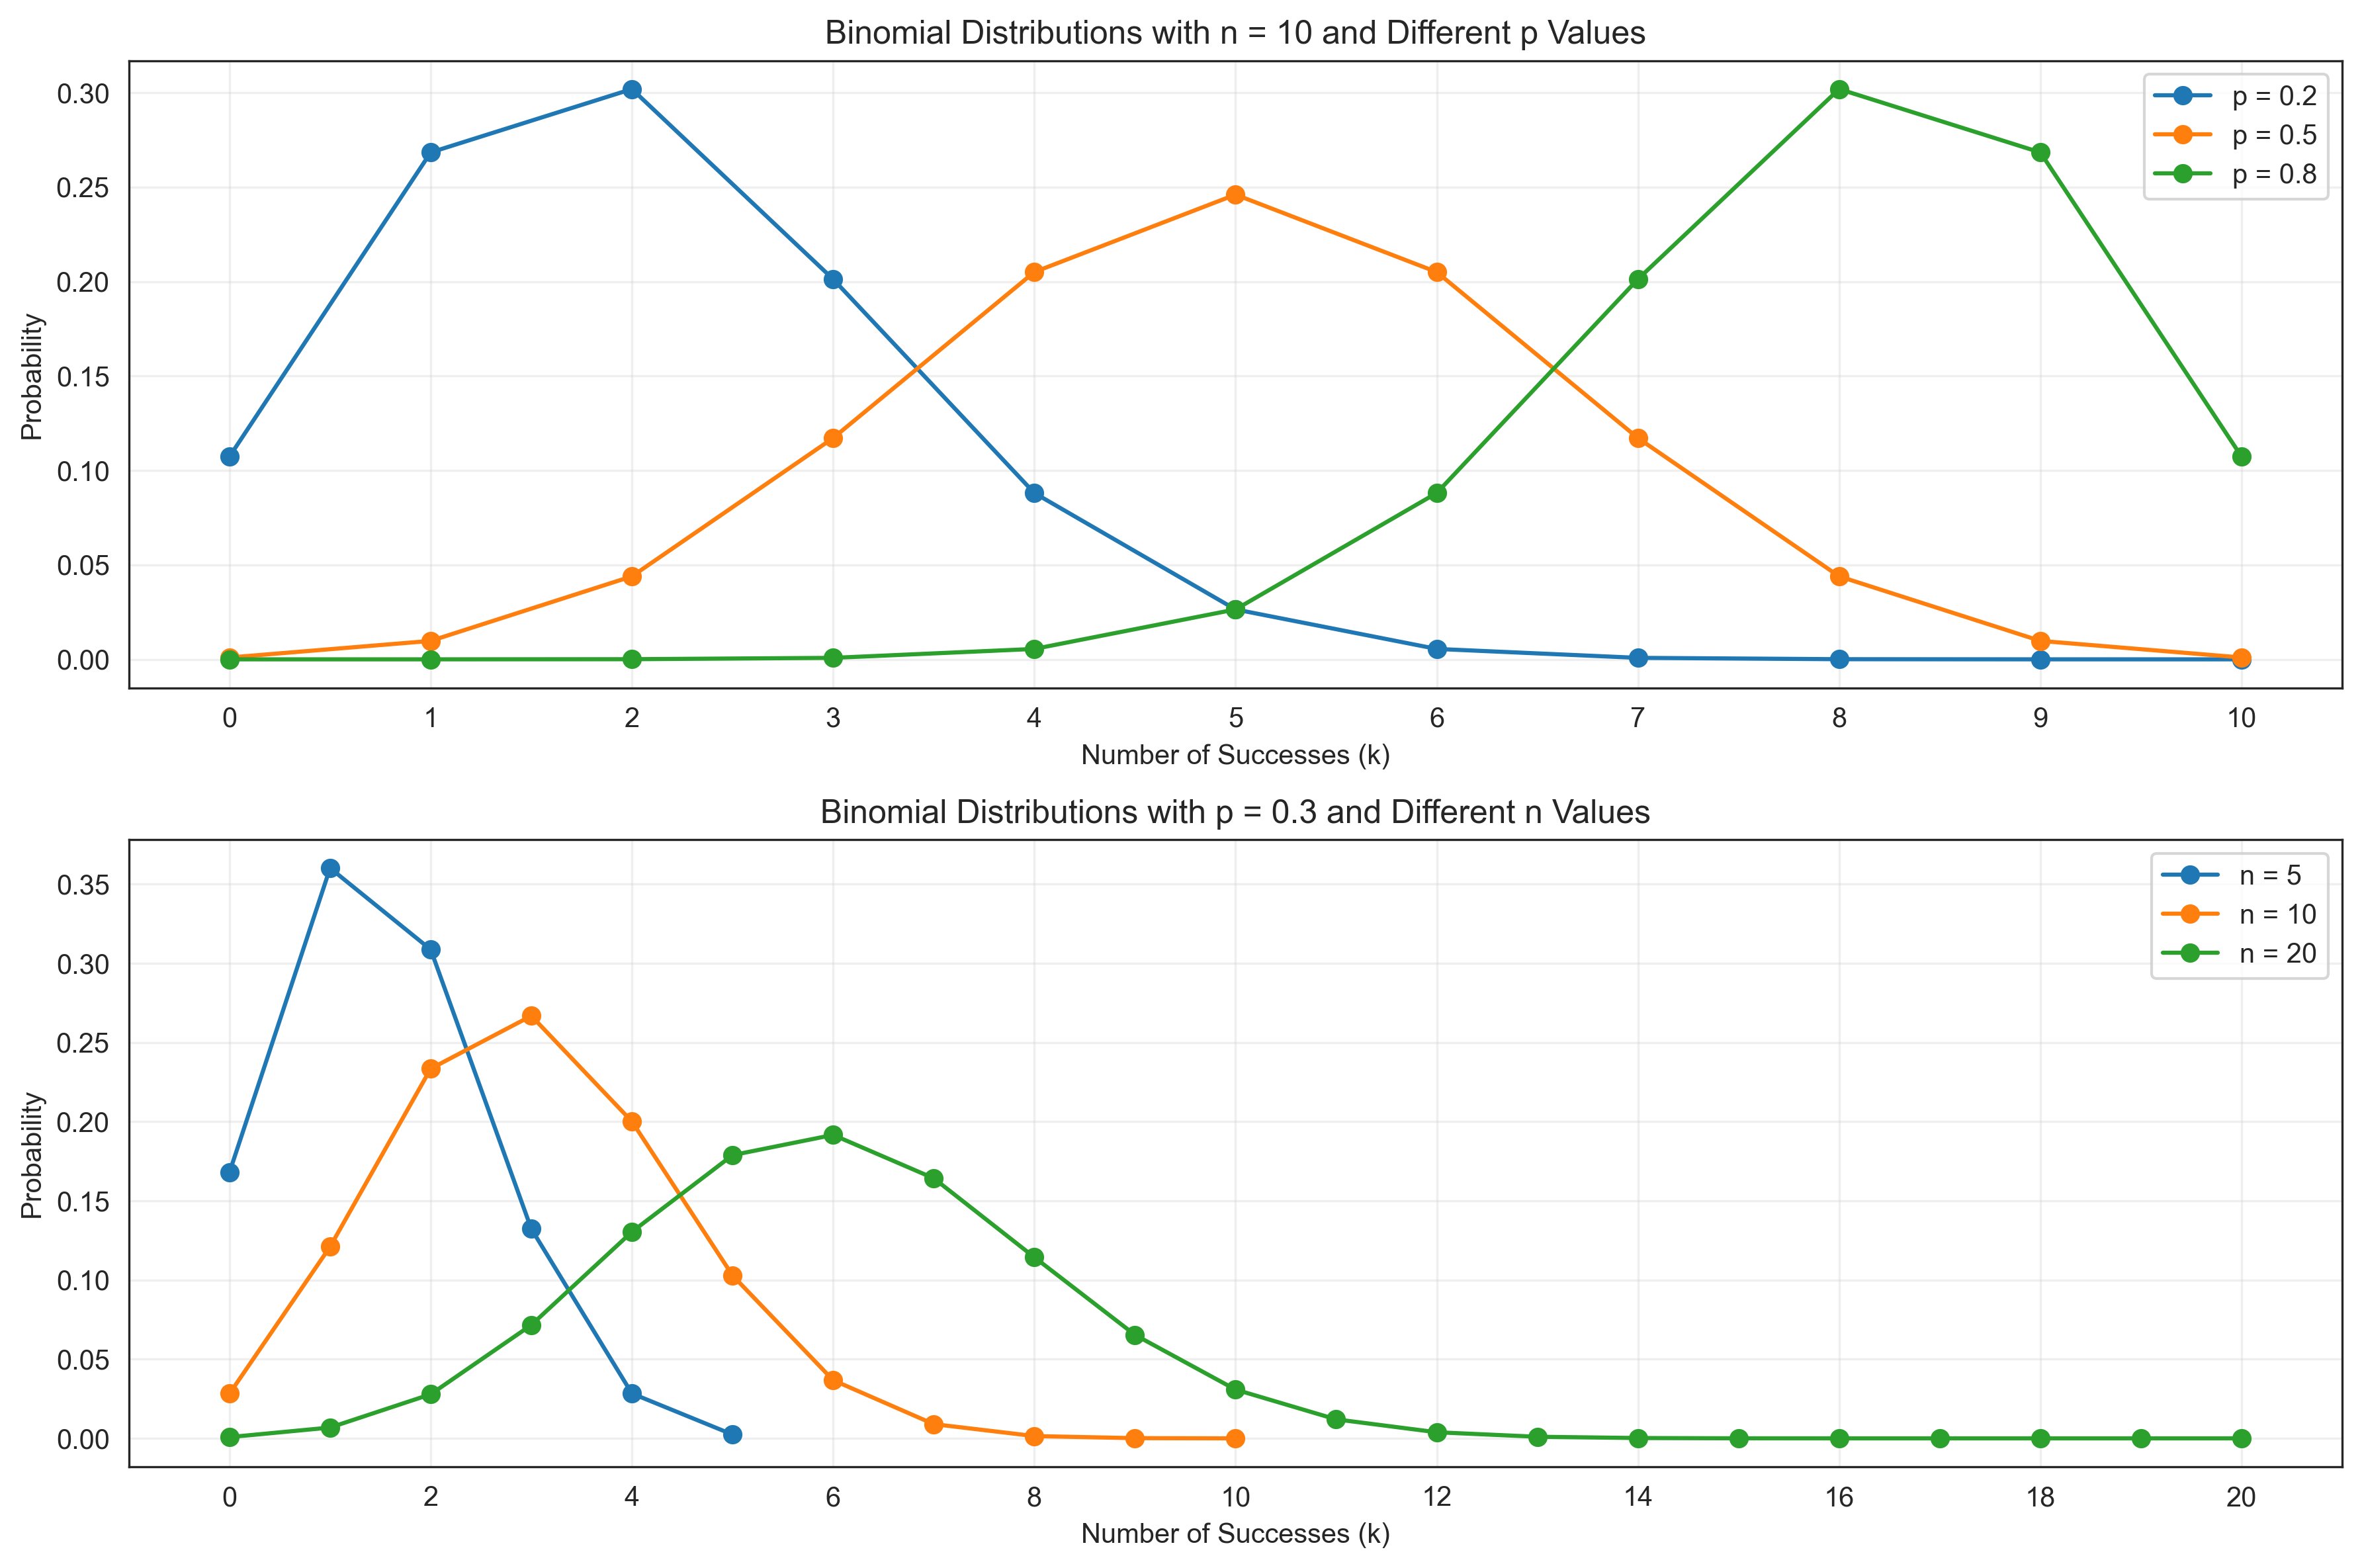

In [16]:
# Compare binomial distributions with different parameters
plt.figure(figsize=(12, 8))

# Different values of p with fixed n
plt.subplot(2, 1, 1)
n_fixed = 10
p_values = [0.2, 0.5, 0.8]
k_values = np.arange(0, n_fixed + 1)

for p in p_values:
    pmf = stats.binom.pmf(k_values, n_fixed, p)
    plt.plot(k_values, pmf, 'o-', label=f'p = {p}')
    
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title(f'Binomial Distributions with n = {n_fixed} and Different p Values')
plt.xticks(k_values)
plt.legend()
plt.grid(alpha=0.3)

# Different values of n with fixed p
plt.subplot(2, 1, 2)
p_fixed = 0.3
n_values = [5, 10, 20]
max_n = max(n_values)
k_values = np.arange(0, max_n + 1)

for n in n_values:
    pmf = stats.binom.pmf(k_values[:n+1], n, p_fixed)
    plt.plot(k_values[:n+1], pmf, 'o-', label=f'n = {n}')
    
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title(f'Binomial Distributions with p = {p_fixed} and Different n Values')
plt.xticks(np.arange(0, max_n + 1, 2))
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Poisson Distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space, given that these events occur with a known constant mean rate and independently of each other. In psychology, it can model rare events like the number of errors made in a task or the number of patients arriving at a clinic in an hour.

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k \in \{0, 1, 2, \ldots\}$$

where λ is the mean number of events in the interval.

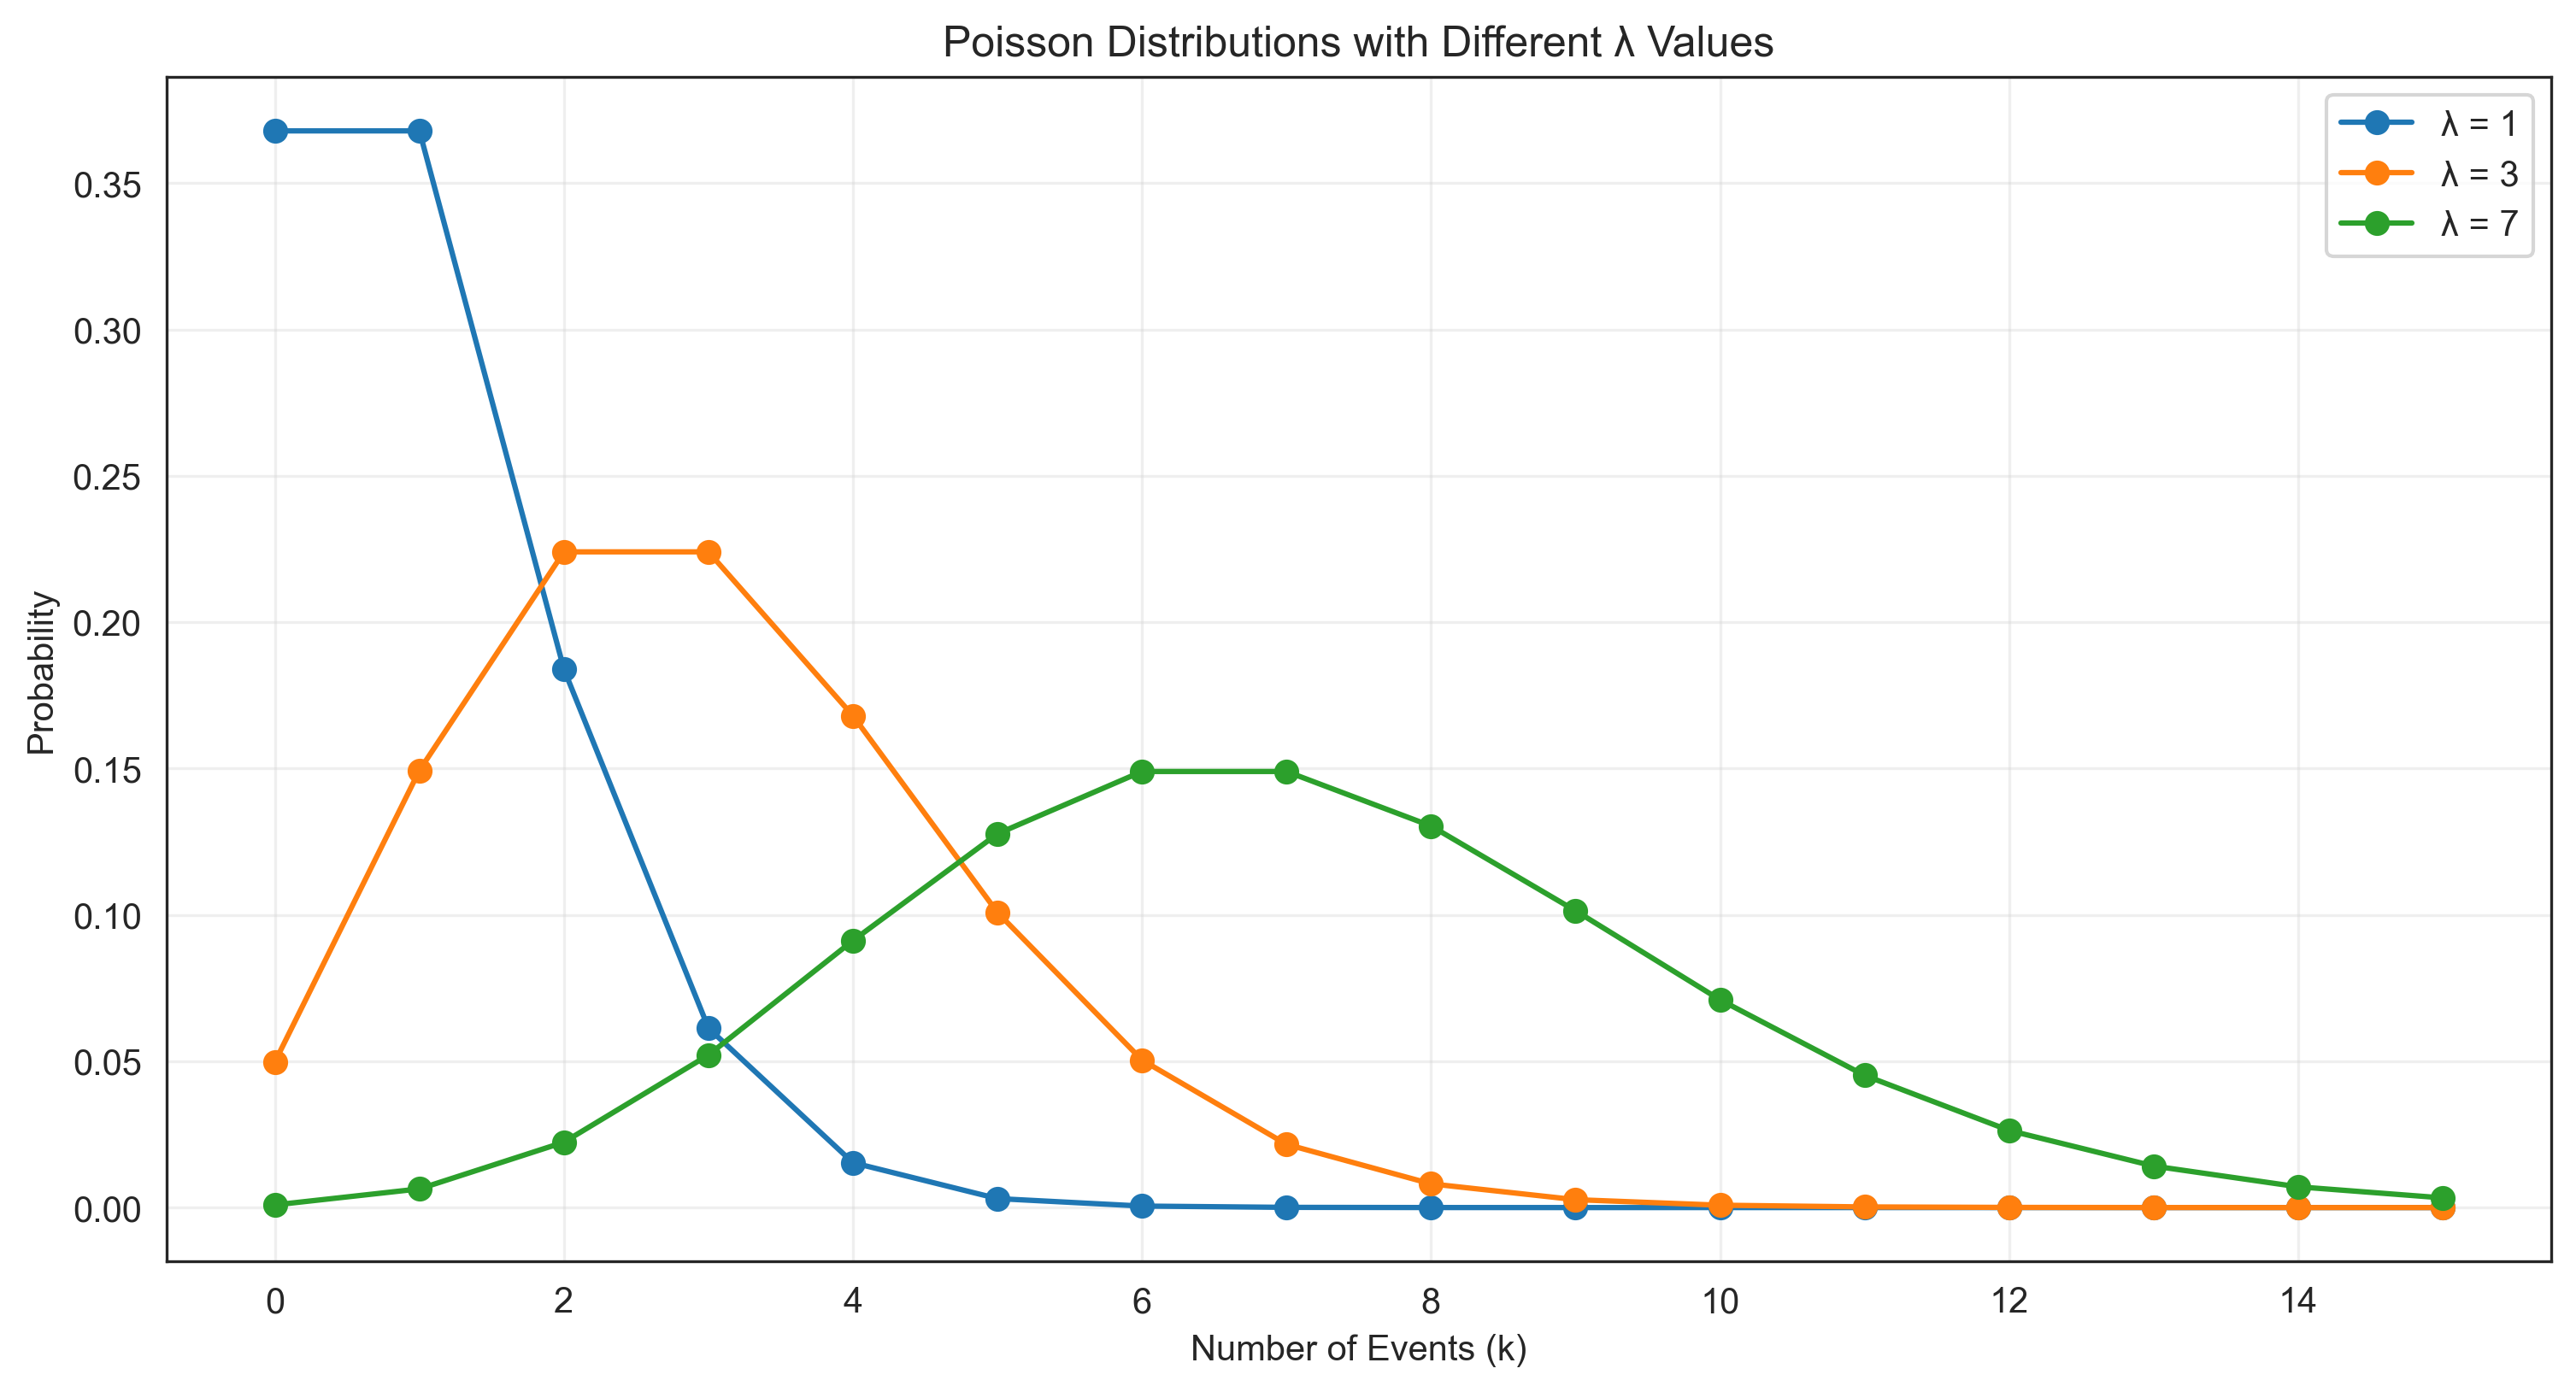

Probability of different numbers of errors in a cognitive task:
P(X = 0) = 0.0821
P(X = 1) = 0.2052
P(X = 2) = 0.2565
P(X = 3) = 0.2138
P(X = 4) = 0.1336
P(X = 5) = 0.0668
P(X = 6) = 0.0278
P(X = 7) = 0.0099
P(X = 8) = 0.0031
P(X = 9) = 0.0009

Probability of making at most 2 errors: 0.5438
Probability of making more than 5 errors: 0.0420


In [17]:
# Poisson distribution
lambda_values = [1, 3, 7]  # Mean number of events
k_values = np.arange(0, 16)  # Number of events

plt.figure(figsize=(12, 6))

for lambda_val in lambda_values:
    poisson_pmf = stats.poisson.pmf(k_values, lambda_val)
    plt.plot(k_values, poisson_pmf, 'o-', label=f'λ = {lambda_val}')
    
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distributions with Different λ Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Example: Modeling errors in a cognitive task
lambda_errors = 2.5  # Average number of errors per participant
k_errors = np.arange(0, 10)
poisson_errors = stats.poisson.pmf(k_errors, lambda_errors)

print("Probability of different numbers of errors in a cognitive task:")
for k, prob in zip(k_errors, poisson_errors):
    print(f"P(X = {k}) = {prob:.4f}")

print(f"\nProbability of making at most 2 errors: {np.sum(poisson_errors[:3]):.4f}")
print(f"Probability of making more than 5 errors: {1 - np.sum(poisson_errors[:6]):.4f}")

### Continuous Probability Distributions

For a continuous random variable X, the probability density function (PDF) f(x) is used such that the probability that X takes a value in the interval [a, b] is:

$$P(a \leq X \leq b) = \int_a^b f(x) dx$$

The cumulative distribution function (CDF) F(x) gives the probability that X takes a value less than or equal to x:

$$F(x) = P(X \leq x) = \int_{-\infty}^x f(t) dt$$

Let's explore some common continuous distributions relevant to psychology.

#### Normal (Gaussian) Distribution

The normal distribution is perhaps the most important probability distribution in statistics. It is characterized by its bell-shaped curve and is defined by two parameters: the mean (μ) and the standard deviation (σ). Many psychological variables approximately follow a normal distribution, such as IQ scores, personality traits, and reaction times (after appropriate transformations).

The PDF of the normal distribution is:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

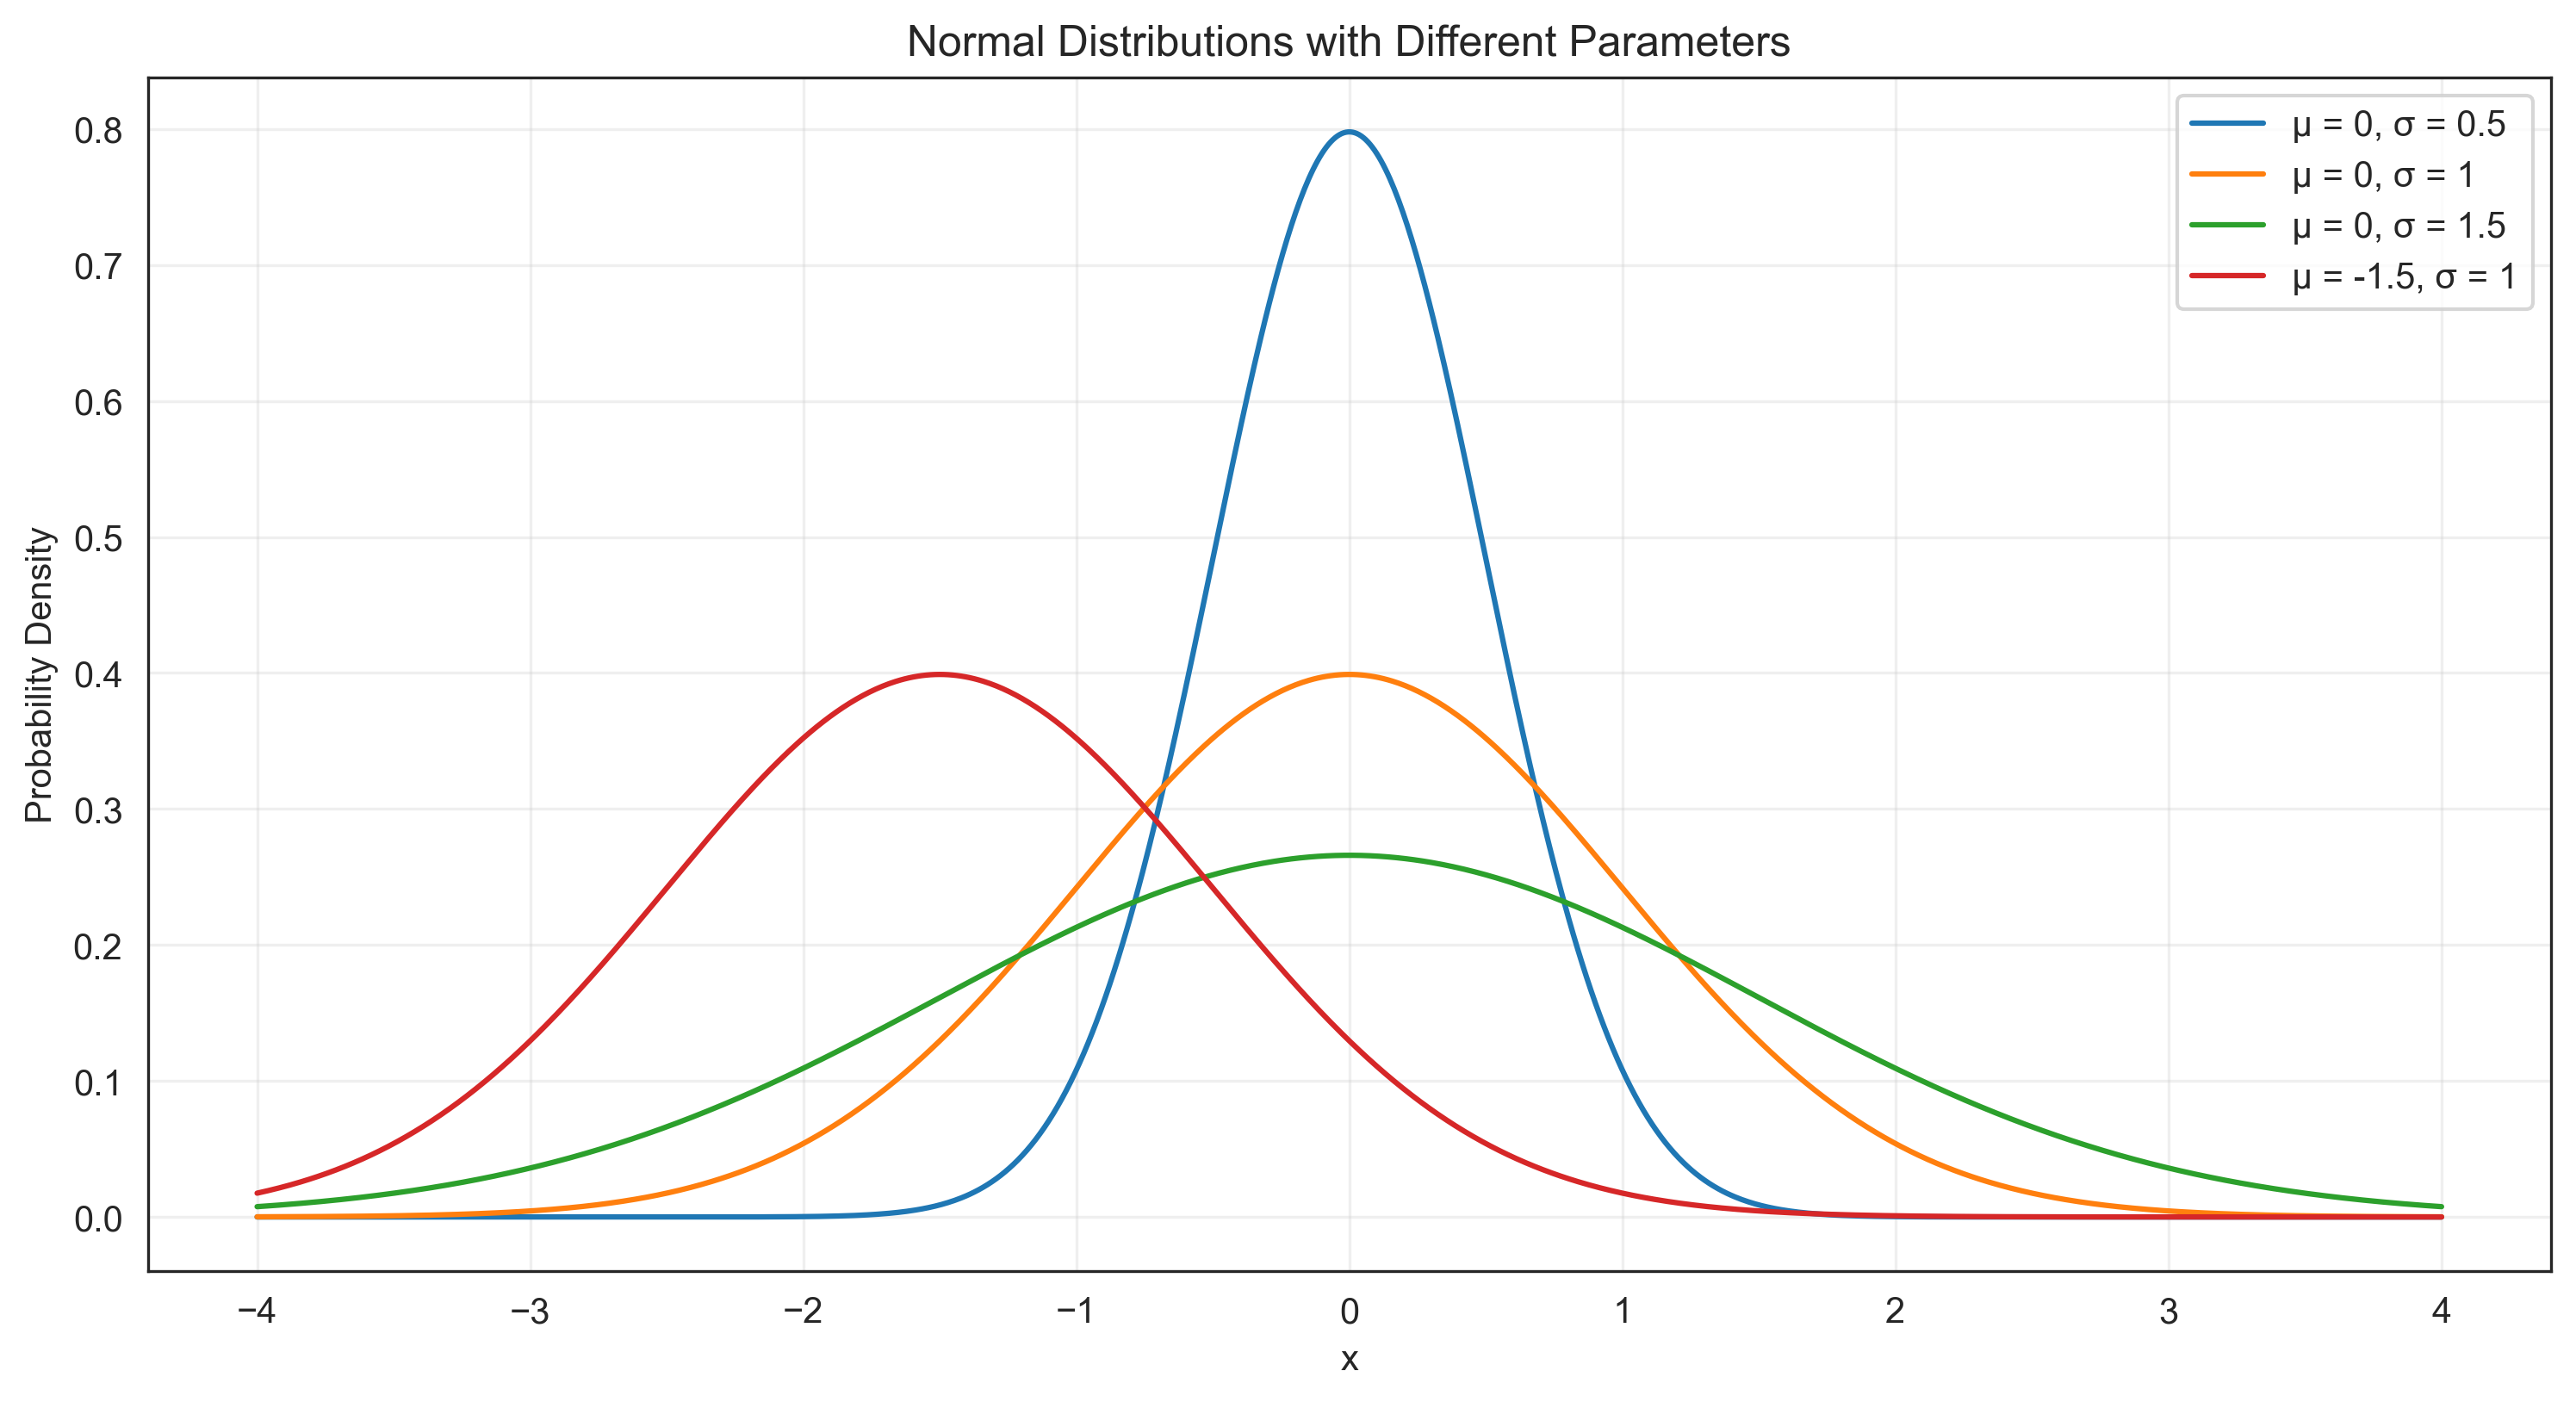

In [18]:
# Normal distribution
x = np.linspace(-4, 4, 1000)
mu_values = [0, 0, 0, -1.5]  # Means
sigma_values = [0.5, 1, 1.5, 1]  # Standard deviations

plt.figure(figsize=(12, 6))

for mu, sigma in zip(mu_values, sigma_values):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=f'μ = {mu}, σ = {sigma}')
    
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distributions with Different Parameters')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Let's explore the properties of the normal distribution, including the empirical rule (68-95-99.7 rule):

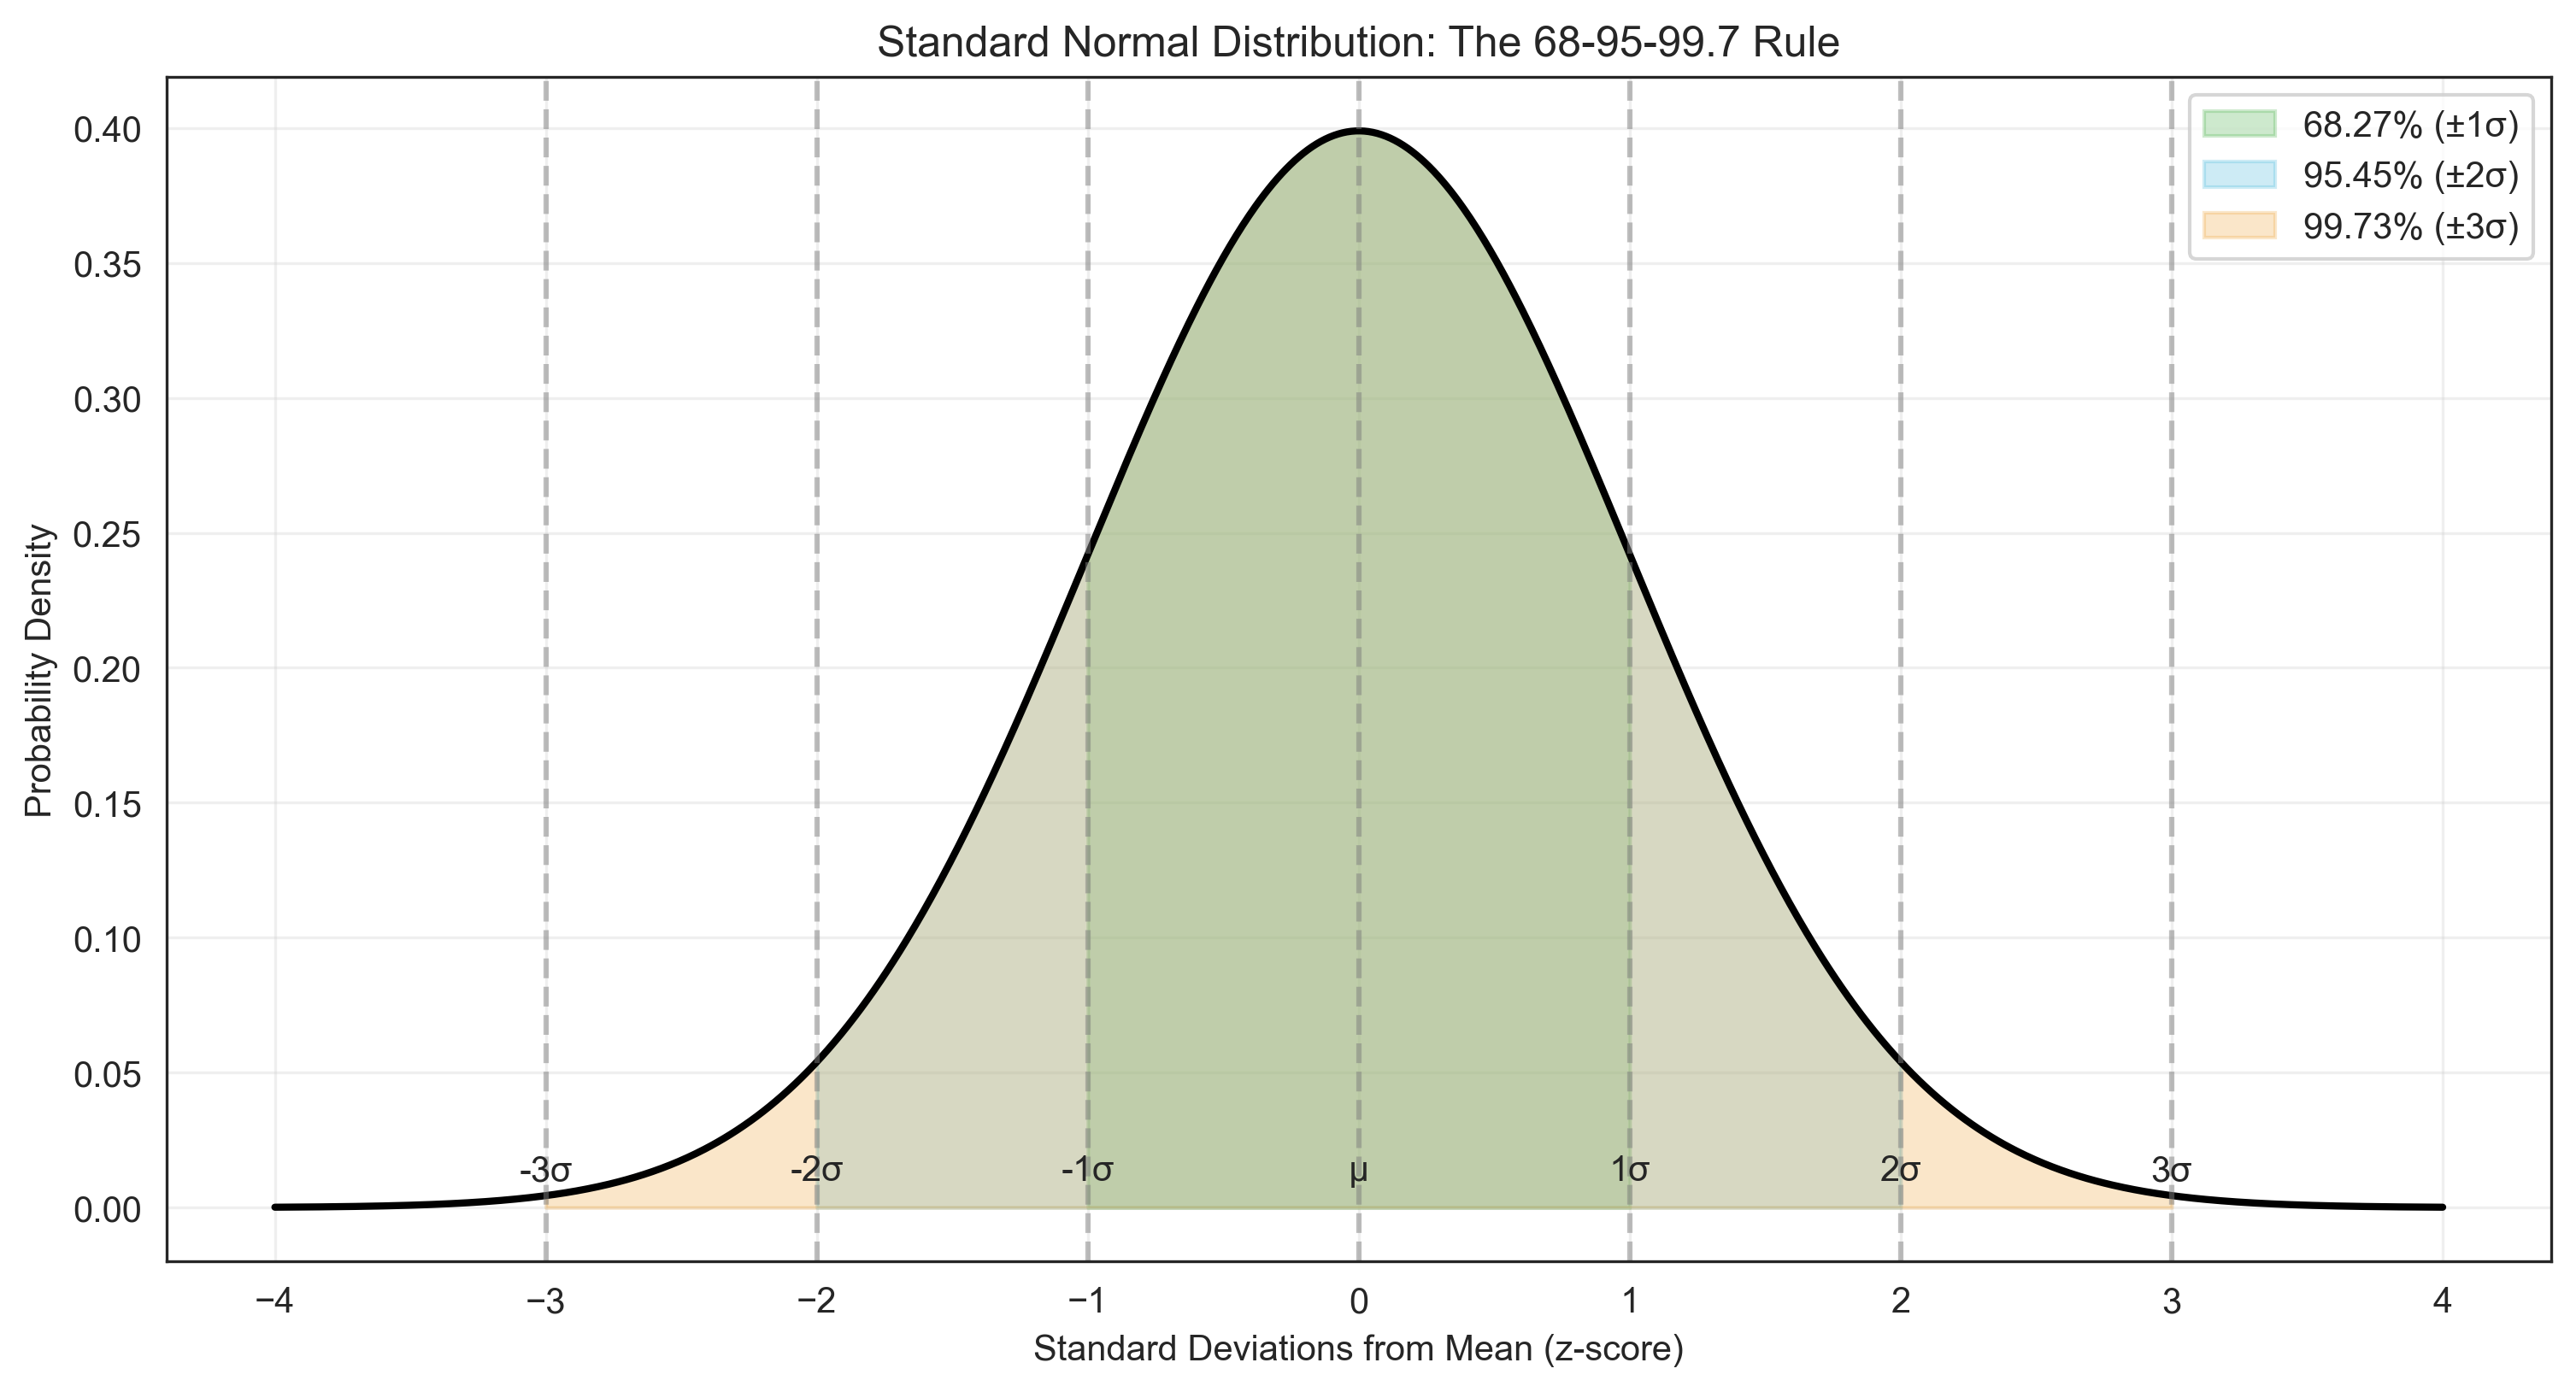

Empirical Rule (68-95-99.7 Rule):
Percentage within ±1σ: 68.27%
Percentage within ±2σ: 95.45%
Percentage within ±3σ: 99.73%


In [19]:
# Standard normal distribution (μ = 0, σ = 1)
x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x)

# Calculate areas under the curve
area_1sigma = stats.norm.cdf(1) - stats.norm.cdf(-1)  # Area within 1 standard deviation
area_2sigma = stats.norm.cdf(2) - stats.norm.cdf(-2)  # Area within 2 standard deviations
area_3sigma = stats.norm.cdf(3) - stats.norm.cdf(-3)  # Area within 3 standard deviations

plt.figure(figsize=(12, 6))

# Plot the PDF
plt.plot(x, pdf, 'k-', lw=2)

# Shade the areas
x_fill_1sigma = np.linspace(-1, 1, 1000)
plt.fill_between(x_fill_1sigma, stats.norm.pdf(x_fill_1sigma), color='#5cb85c', alpha=0.3, label=f'68.27% (±1σ)')

x_fill_2sigma = np.linspace(-2, 2, 1000)
plt.fill_between(x_fill_2sigma, stats.norm.pdf(x_fill_2sigma), color='#5bc0de', alpha=0.3, label=f'95.45% (±2σ)')

x_fill_3sigma = np.linspace(-3, 3, 1000)
plt.fill_between(x_fill_3sigma, stats.norm.pdf(x_fill_3sigma), color='#f0ad4e', alpha=0.3, label=f'99.73% (±3σ)')

plt.xlabel('Standard Deviations from Mean (z-score)')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution: The 68-95-99.7 Rule')
plt.legend()
plt.grid(alpha=0.3)

# Add vertical lines at standard deviations
for i in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(i, color='gray', linestyle='--', alpha=0.5)
    if i != 0:
        plt.text(i, 0.01, f'{i}σ', ha='center')
    else:
        plt.text(i, 0.01, 'μ', ha='center')

plt.show()

print("Empirical Rule (68-95-99.7 Rule):")
print(f"Percentage within ±1σ: {area_1sigma*100:.2f}%")
print(f"Percentage within ±2σ: {area_2sigma*100:.2f}%")
print(f"Percentage within ±3σ: {area_3sigma*100:.2f}%")

#### Uniform Distribution

The uniform distribution represents a constant probability over a specified range. It is useful for modeling random selection from a range of values with equal probability.

$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$

where a and b are the lower and upper bounds of the range.

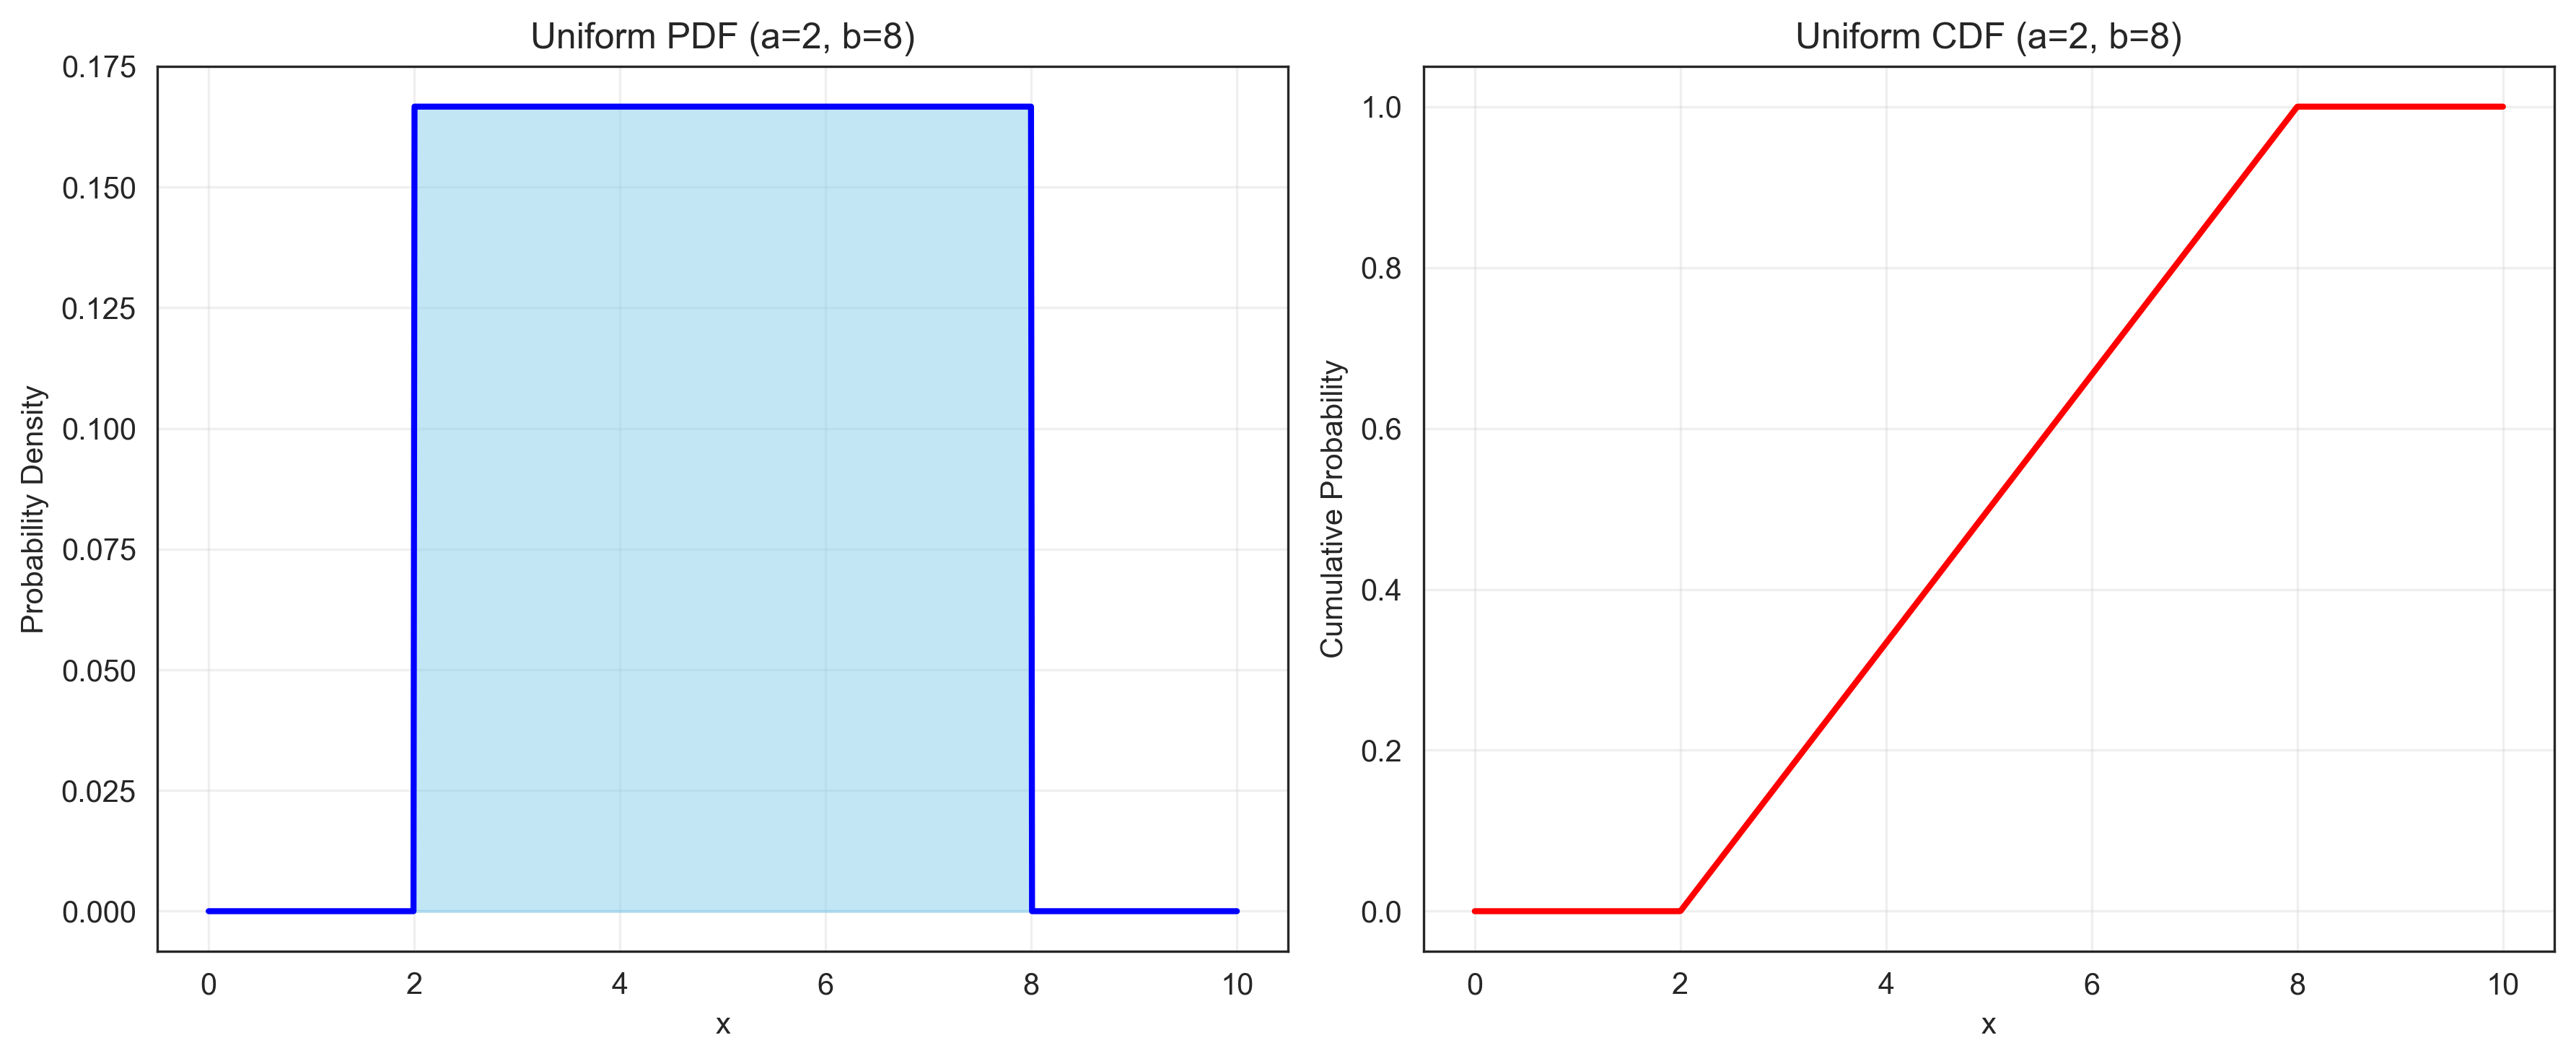

P(X < 5) = 0.5000
P(4 < X < 6) = 0.3333


In [20]:
# Uniform distribution
a, b = 2, 8  # Lower and upper bounds
x = np.linspace(0, 10, 1000)
pdf = stats.uniform.pdf(x, loc=a, scale=b-a)
cdf = stats.uniform.cdf(x, loc=a, scale=b-a)

plt.figure(figsize=(12, 5))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, 'b-', lw=2)
plt.fill_between(x, pdf, where=(x >= a) & (x <= b), color='skyblue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'Uniform PDF (a={a}, b={b})')
plt.grid(alpha=0.3)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, 'r-', lw=2)
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title(f'Uniform CDF (a={a}, b={b})')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate probabilities
prob_less_than_5 = stats.uniform.cdf(5, loc=a, scale=b-a)
prob_between_4_and_6 = stats.uniform.cdf(6, loc=a, scale=b-a) - stats.uniform.cdf(4, loc=a, scale=b-a)

print(f"P(X < 5) = {prob_less_than_5:.4f}")
print(f"P(4 < X < 6) = {prob_between_4_and_6:.4f}")

#### Exponential Distribution

The exponential distribution models the time between events in a Poisson process. It is useful for modeling waiting times or the time until an event occurs, such as the time until a participant responds in a reaction time experiment.

$$f(x) = \lambda e^{-\lambda x}, \quad x \geq 0$$

where λ is the rate parameter.

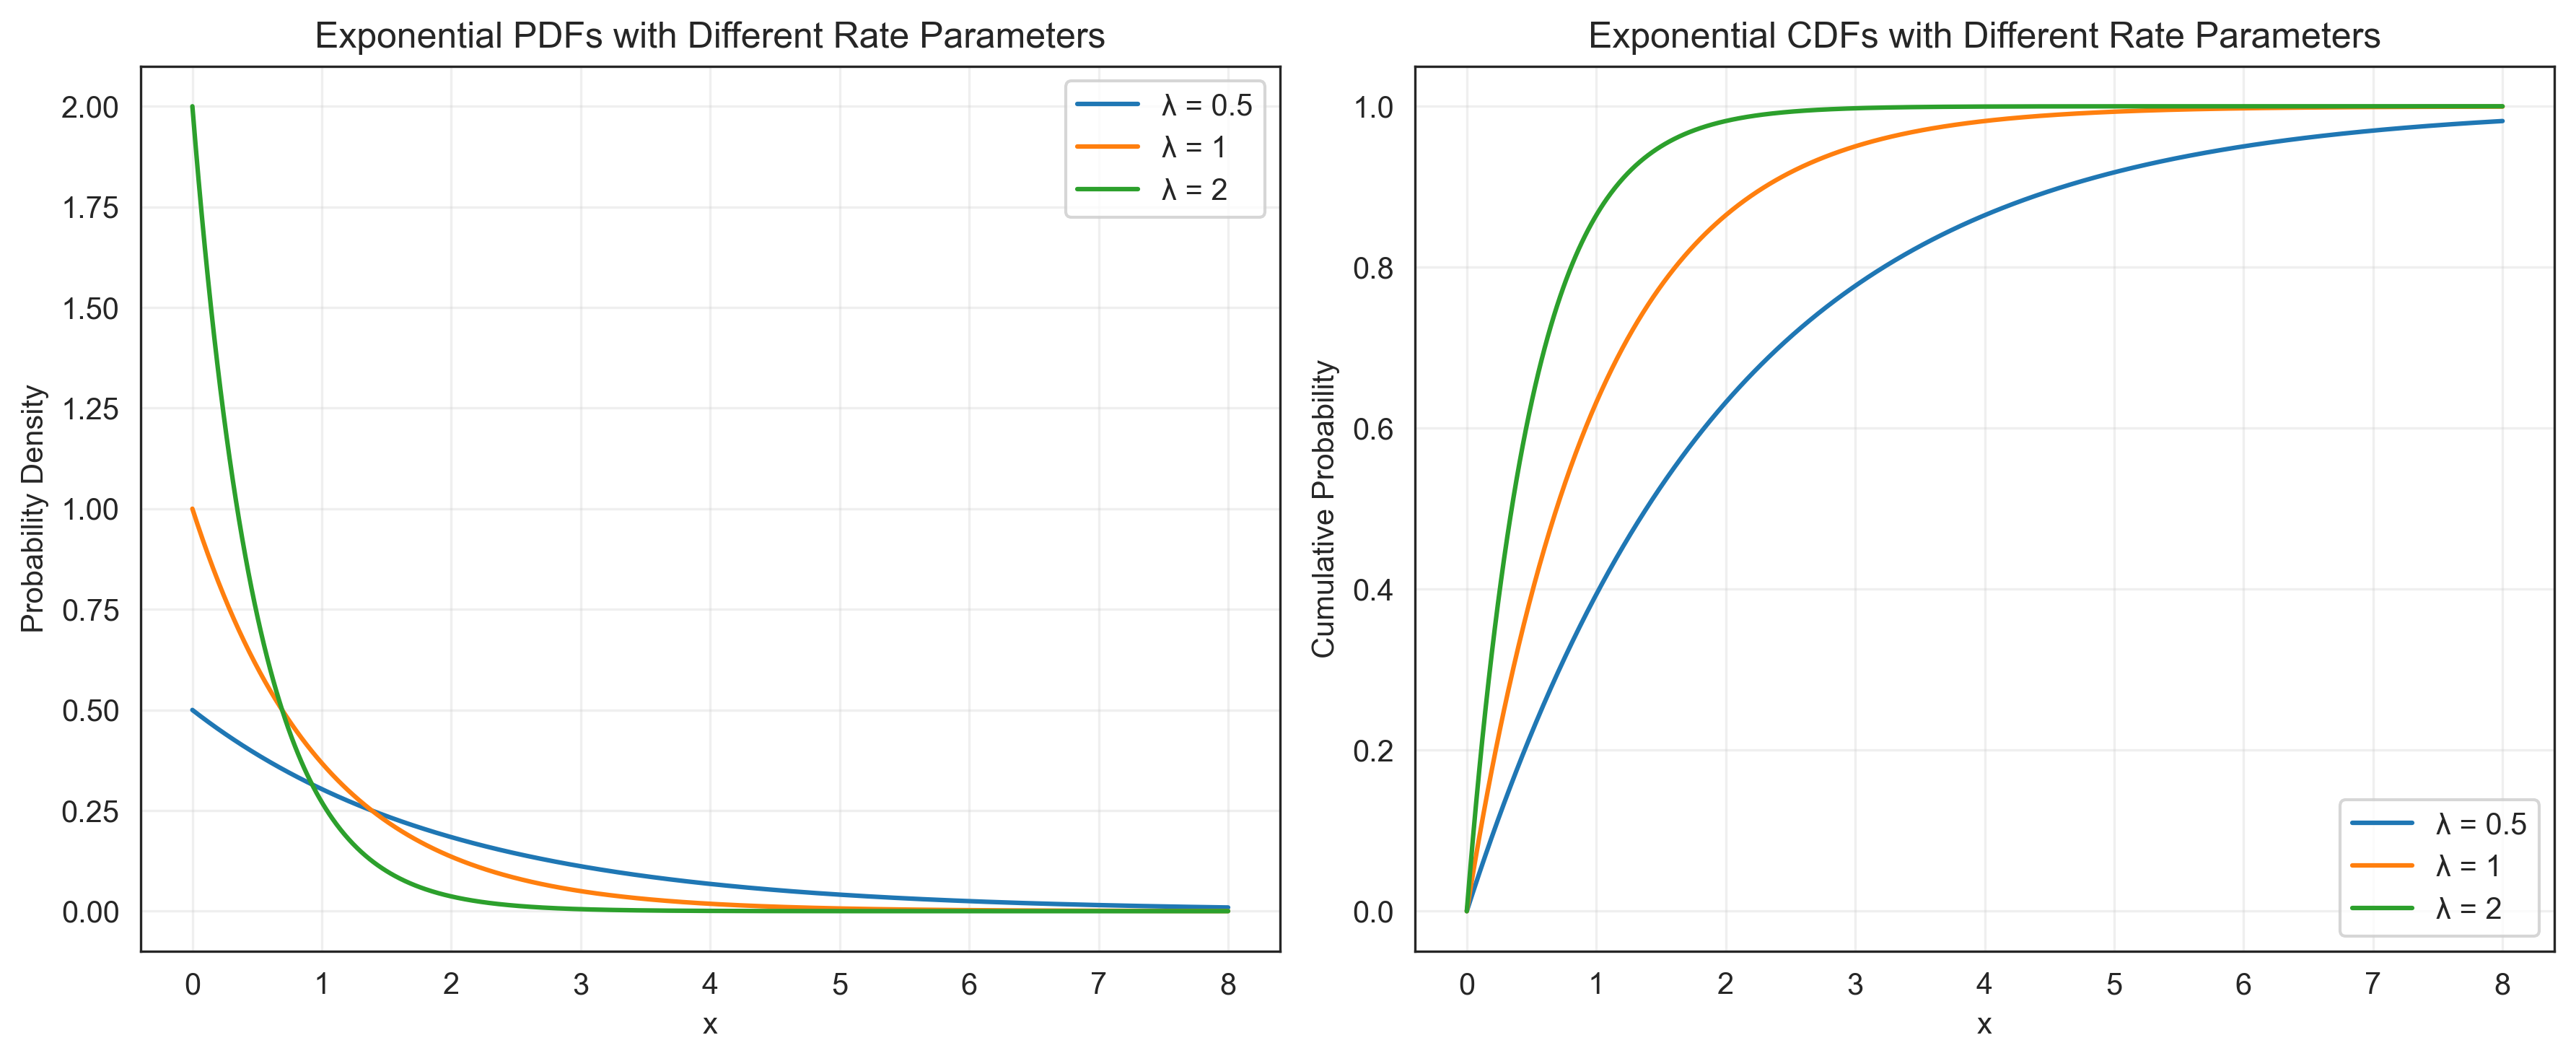

Mean response time: 2.0 seconds
Probability of responding within 1 second: 0.3935
Probability of responding within 2 seconds: 0.6321
Probability of responding after 3 seconds: 0.2231


In [21]:
# Exponential distribution
lambda_values = [0.5, 1, 2]  # Rate parameters
x = np.linspace(0, 8, 1000)

plt.figure(figsize=(12, 5))

# Plot PDFs
plt.subplot(1, 2, 1)
for lambda_val in lambda_values:
    pdf = stats.expon.pdf(x, scale=1/lambda_val)
    plt.plot(x, pdf, label=f'λ = {lambda_val}')
    
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Exponential PDFs with Different Rate Parameters')
plt.legend()
plt.grid(alpha=0.3)

# Plot CDFs
plt.subplot(1, 2, 2)
for lambda_val in lambda_values:
    cdf = stats.expon.cdf(x, scale=1/lambda_val)
    plt.plot(x, cdf, label=f'λ = {lambda_val}')
    
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Exponential CDFs with Different Rate Parameters')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Example: Modeling response times
lambda_rt = 0.5  # Average response rate of 0.5 responses per second
mean_rt = 1 / lambda_rt  # Mean response time in seconds

print(f"Mean response time: {mean_rt} seconds")
print(f"Probability of responding within 1 second: {stats.expon.cdf(1, scale=mean_rt):.4f}")
print(f"Probability of responding within 2 seconds: {stats.expon.cdf(2, scale=mean_rt):.4f}")
print(f"Probability of responding after 3 seconds: {1 - stats.expon.cdf(3, scale=mean_rt):.4f}")

## Expected Value and Variance

The expected value (or mean) of a random variable X, denoted as E[X], is a measure of the central tendency of the distribution. For a discrete random variable:

$$E[X] = \sum_x x \cdot P(X = x)$$

For a continuous random variable:

$$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx$$

The variance of X, denoted as Var(X) or σ², measures the spread or dispersion of the distribution:

$$Var(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2$$

Let's calculate these for some of the distributions we've discussed:

In [22]:
# Expected value and variance for different distributions
print("Expected Value and Variance for Different Distributions:\n")

# Bernoulli distribution
p = 0.7
mean_bernoulli = p
var_bernoulli = p * (1 - p)
print(f"Bernoulli (p = {p}):\nE[X] = {mean_bernoulli}\nVar(X) = {var_bernoulli}\n")

# Binomial distribution
n = 10
p = 0.3
mean_binomial = n * p
var_binomial
# Binomial distribution
n = 10
p = 0.3
mean_binomial = n * p
var_binomial = n * p * (1 - p)
print(f"Binomial (n = {n}, p = {p}):\nE[X] = {mean_binomial}\nVar(X) = {var_binomial}\n")

# Poisson distribution
lambda_val = 2.5
mean_poisson = lambda_val
var_poisson = lambda_val
print(f"Poisson (λ = {lambda_val}):\nE[X] = {mean_poisson}\nVar(X) = {var_poisson}\n")

# Normal distribution
mu = 100
sigma = 15
mean_normal = mu
var_normal = sigma**2
print(f"Normal (μ = {mu}, σ = {sigma}):\nE[X] = {mean_normal}\nVar(X) = {var_normal}\n")

# Uniform distribution
a, b = 2, 8
mean_uniform = (a + b) / 2
var_uniform = (b - a)**2 / 12
print(f"Uniform (a = {a}, b = {b}):\nE[X] = {mean_uniform}\nVar(X) = {var_uniform}\n")

# Exponential distribution
lambda_val = 0.5
mean_exponential = 1 / lambda_val
var_exponential = 1 / (lambda_val**2)
print(f"Exponential (λ = {lambda_val}):\nE[X] = {mean_exponential}\nVar(X) = {var_exponential}")

Expected Value and Variance for Different Distributions:

Bernoulli (p = 0.7):
E[X] = 0.7
Var(X) = 0.21000000000000002

Binomial (n = 10, p = 0.3):
E[X] = 3.0
Var(X) = 2.0999999999999996

Poisson (λ = 2.5):
E[X] = 2.5
Var(X) = 2.5

Normal (μ = 100, σ = 15):
E[X] = 100
Var(X) = 225

Uniform (a = 2, b = 8):
E[X] = 5.0
Var(X) = 3.0

Exponential (λ = 0.5):
E[X] = 2.0
Var(X) = 4.0


## The Central Limit Theorem

The Central Limit Theorem (CLT) is one of the most important results in probability theory and statistics. It states that the sampling distribution of the mean of a large number of independent, identically distributed random variables will be approximately normally distributed, regardless of the original distribution of the variables.

More formally, if $X_1, X_2, \ldots, X_n$ are independent random variables with the same distribution, each with mean $\mu$ and variance $\sigma^2$, then the sample mean $\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i$ has a distribution that approaches a normal distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$ as $n$ increases.

This theorem is crucial in psychological research because it allows us to make inferences about population parameters based on sample statistics, even when the underlying population distribution is not normal.

Let's demonstrate the Central Limit Theorem with some simulations:

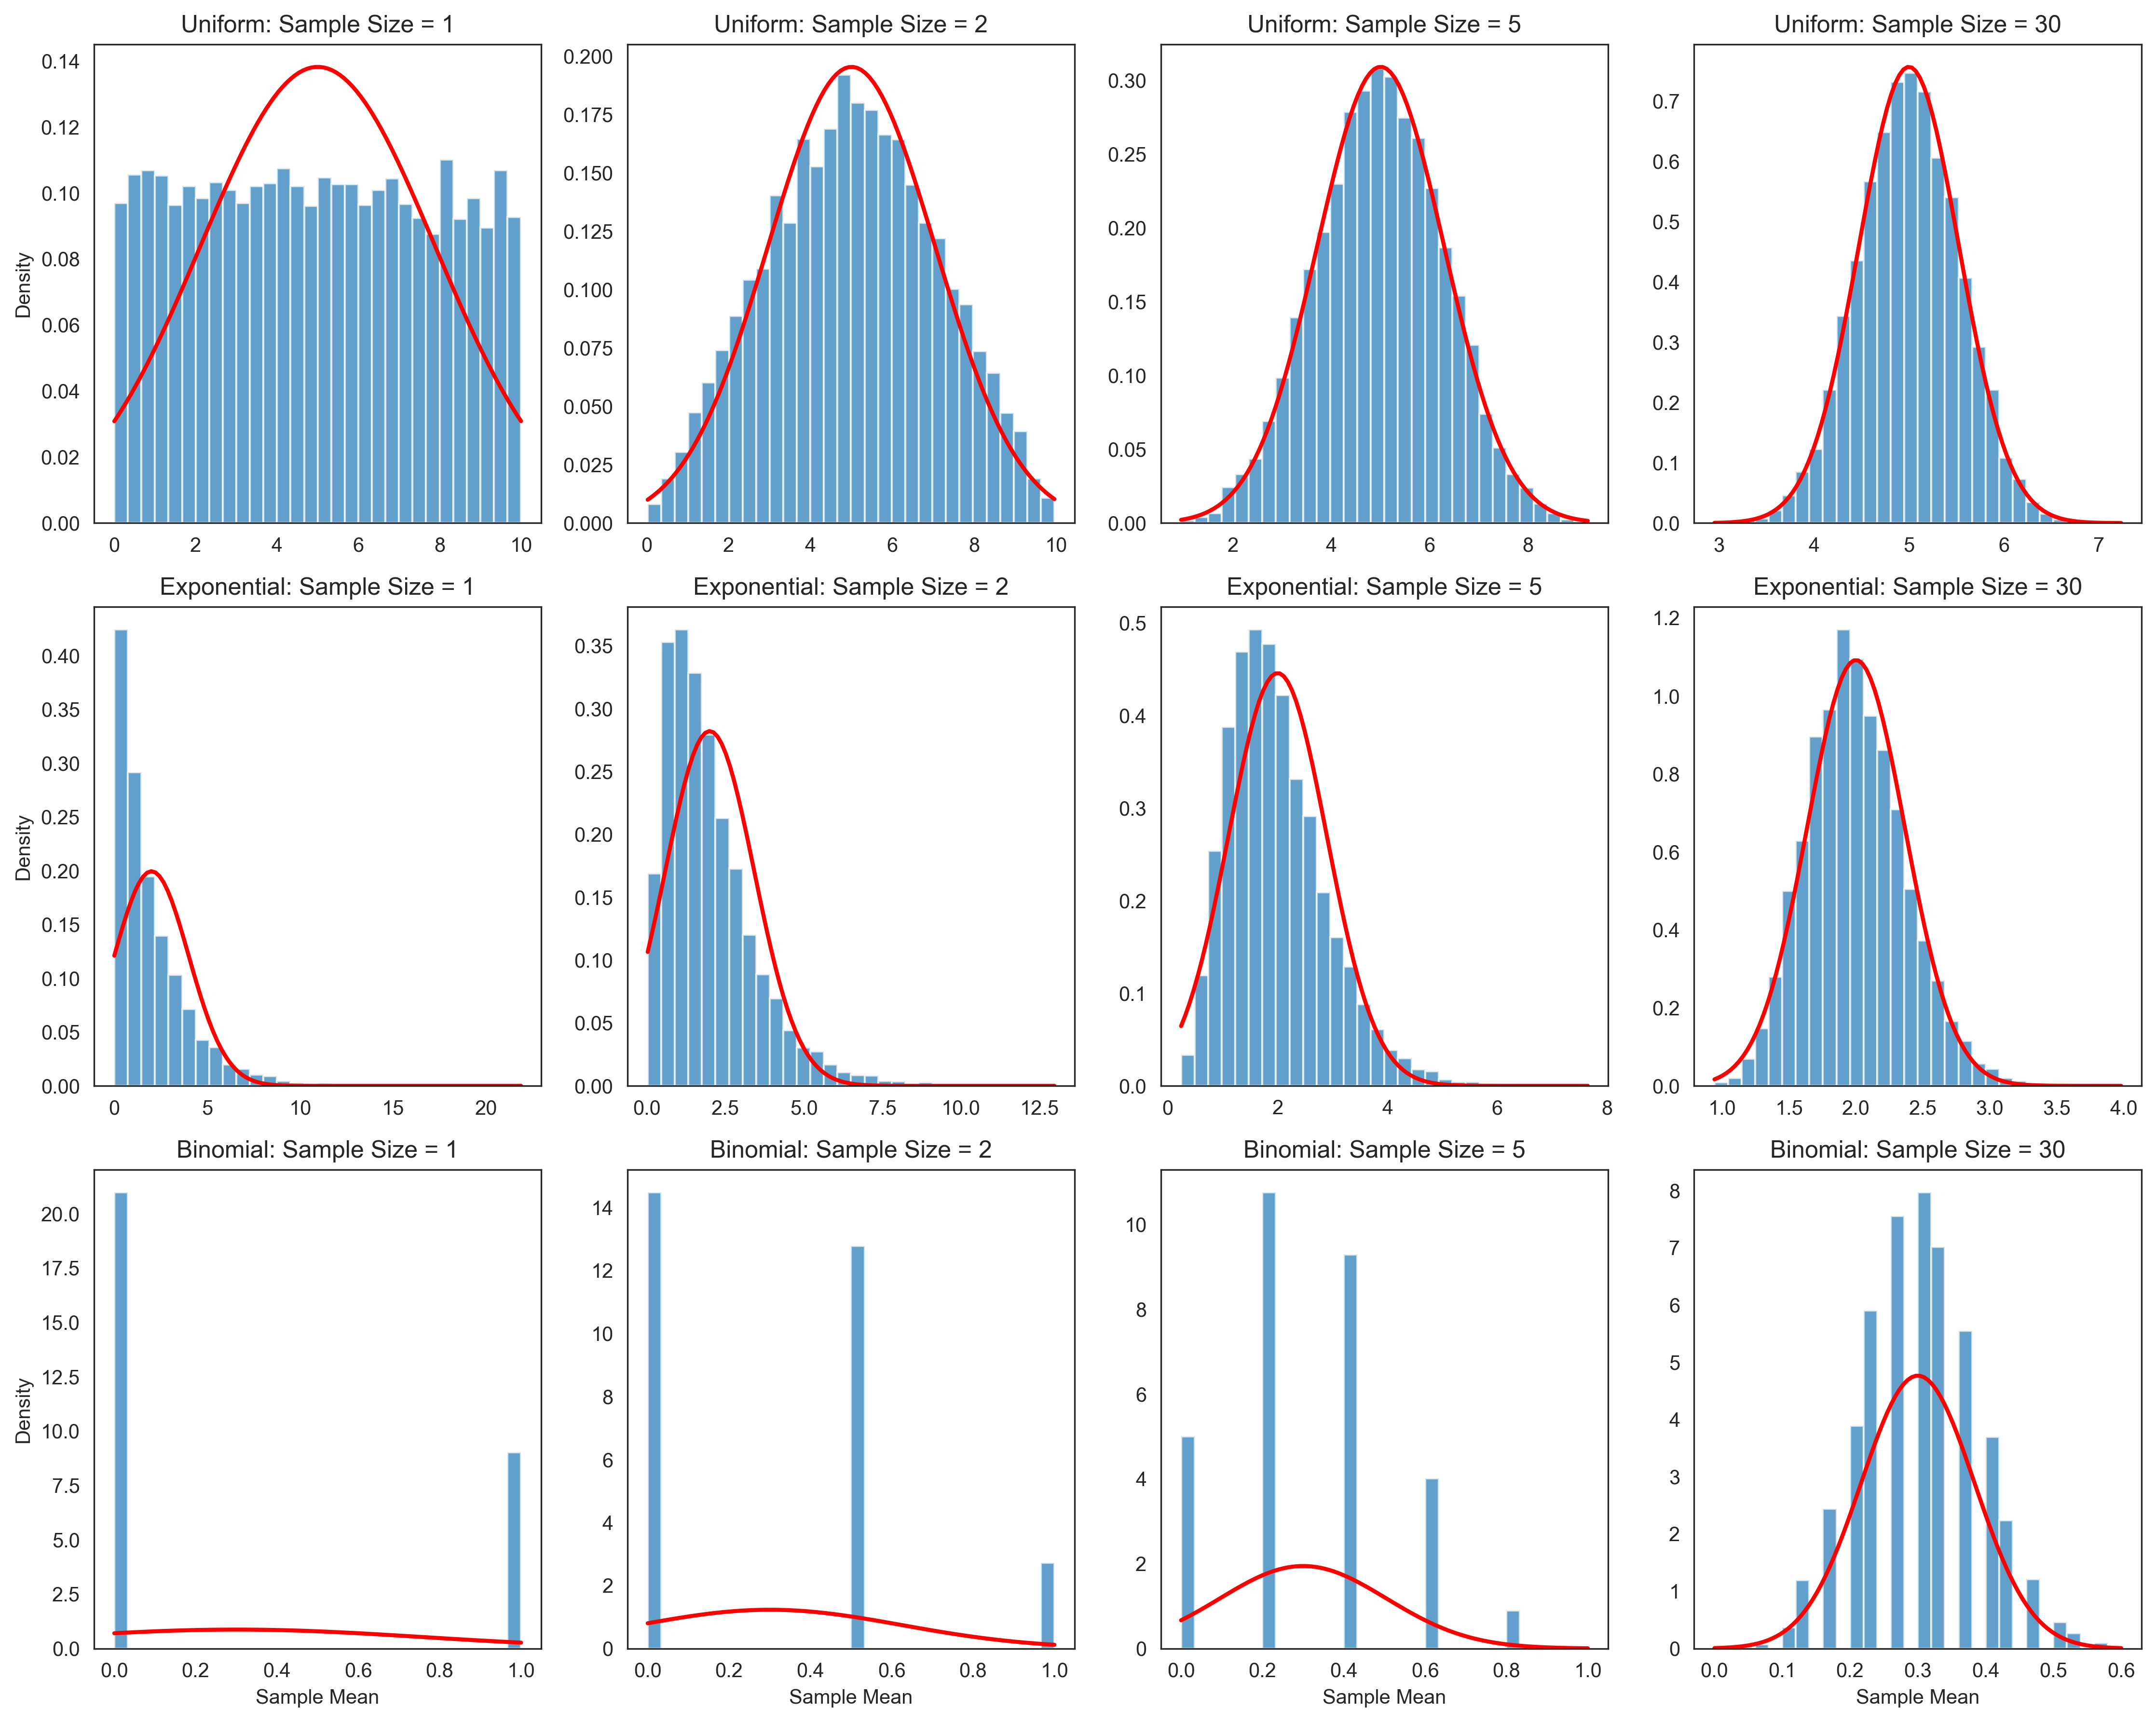

In [23]:
# Demonstrate the Central Limit Theorem
np.random.seed(42)  # For reproducibility

# Generate samples from different distributions
n_samples = 10000  # Number of samples
sample_sizes = [1, 2, 5, 30]  # Different sample sizes

# Create figure
plt.figure(figsize=(15, 12))

# 1. Uniform Distribution
a, b = 0, 10  # Uniform distribution parameters
uniform_population = stats.uniform(loc=a, scale=b-a)
uniform_mean = (a + b) / 2
uniform_std = np.sqrt((b - a)**2 / 12)

for i, size in enumerate(sample_sizes):
    # Generate samples and calculate means
    uniform_samples = np.array([uniform_population.rvs(size=size).mean() for _ in range(n_samples)])
    
    # Plot histogram
    plt.subplot(3, len(sample_sizes), i + 1)
    plt.hist(uniform_samples, bins=30, density=True, alpha=0.7)
    
    # Plot the theoretical normal distribution
    x = np.linspace(uniform_samples.min(), uniform_samples.max(), 100)
    plt.plot(x, stats.norm.pdf(x, loc=uniform_mean, scale=uniform_std/np.sqrt(size)), 'r-', lw=2)
    
    plt.title(f'Uniform: Sample Size = {size}')
    if i == 0:
        plt.ylabel('Density')

# 2. Exponential Distribution
lambda_val = 0.5  # Exponential distribution parameter
exponential_population = stats.expon(scale=1/lambda_val)
exponential_mean = 1 / lambda_val
exponential_std = 1 / lambda_val

for i, size in enumerate(sample_sizes):
    # Generate samples and calculate means
    exponential_samples = np.array([exponential_population.rvs(size=size).mean() for _ in range(n_samples)])
    
    # Plot histogram
    plt.subplot(3, len(sample_sizes), len(sample_sizes) + i + 1)
    plt.hist(exponential_samples, bins=30, density=True, alpha=0.7)
    
    # Plot the theoretical normal distribution
    x = np.linspace(exponential_samples.min(), exponential_samples.max(), 100)
    plt.plot(x, stats.norm.pdf(x, loc=exponential_mean, scale=exponential_std/np.sqrt(size)), 'r-', lw=2)
    
    plt.title(f'Exponential: Sample Size = {size}')
    if i == 0:
        plt.ylabel('Density')

# 3. Binomial Distribution
n_trials, p = 1, 0.3  # Binomial distribution parameters
binomial_population = stats.binom(n=n_trials, p=p)
binomial_mean = n_trials * p
binomial_std = np.sqrt(n_trials * p * (1 - p))

for i, size in enumerate(sample_sizes):
    # Generate samples and calculate means
    binomial_samples = np.array([binomial_population.rvs(size=size).mean() for _ in range(n_samples)])
    
    # Plot histogram
    plt.subplot(3, len(sample_sizes), 2*len(sample_sizes) + i + 1)
    plt.hist(binomial_samples, bins=30, density=True, alpha=0.7)
    
    # Plot the theoretical normal distribution
    x = np.linspace(binomial_samples.min(), binomial_samples.max(), 100)
    plt.plot(x, stats.norm.pdf(x, loc=binomial_mean, scale=binomial_std/np.sqrt(size)), 'r-', lw=2)
    
    plt.title(f'Binomial: Sample Size = {size}')
    if i == 0:
        plt.ylabel('Density')
    plt.xlabel('Sample Mean')

plt.tight_layout()
plt.show()

The simulations above demonstrate the Central Limit Theorem in action. As the sample size increases, the sampling distribution of the mean becomes more normally distributed, regardless of the shape of the original population distribution. This is a powerful result that forms the basis for many statistical inference procedures in psychology.

Key observations:
1. With a sample size of 1, the sampling distribution looks like the original population distribution.
2. As the sample size increases, the sampling distribution becomes more bell-shaped (normal).
3. The larger the sample size, the smaller the standard error (the standard deviation of the sampling distribution).
4. The mean of the sampling distribution equals the population mean, regardless of sample size.

## Applications in Psychological Research

Probability theory has numerous applications in psychological research. Let's explore a few examples:

### 1. Signal Detection Theory

Signal Detection Theory (SDT) is a framework for analyzing decision-making in the presence of uncertainty. It is widely used in perception, memory, and diagnostic testing research. SDT involves calculating probabilities of hits, misses, false alarms, and correct rejections.

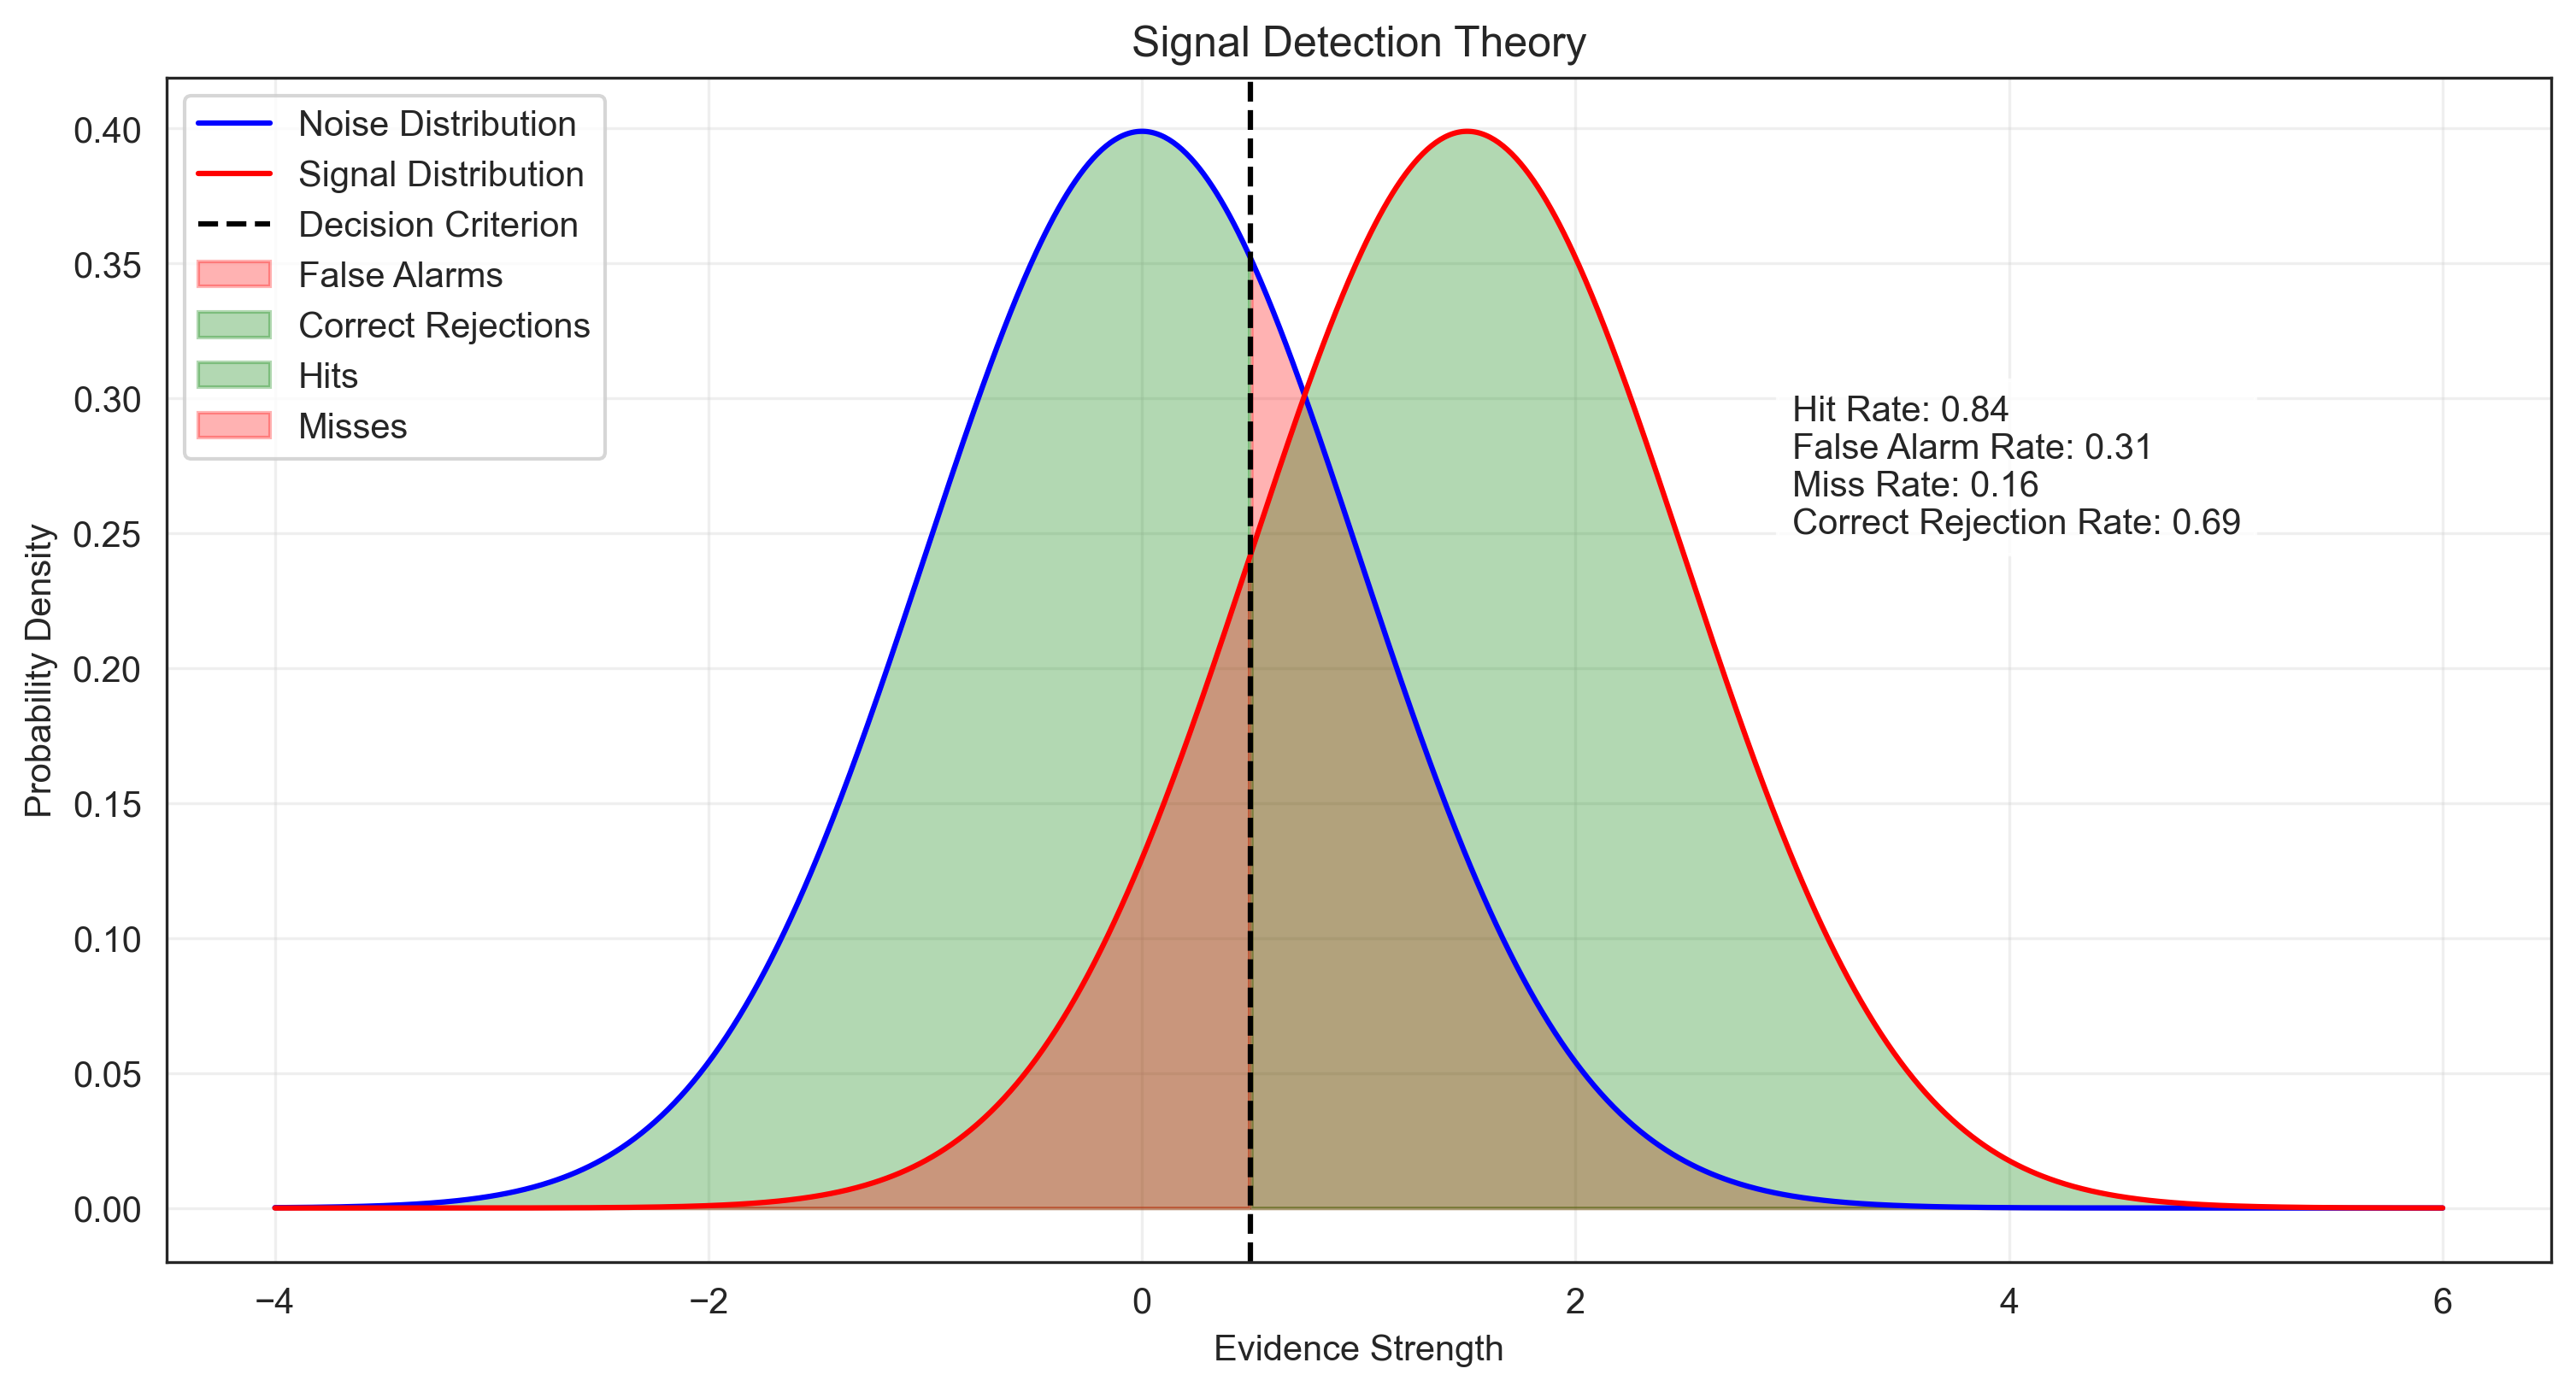

In [24]:
# Signal Detection Theory example
# Simulate a perception experiment where participants detect a stimulus

# Parameters
d_prime = 1.5  # Sensitivity index (higher = better discrimination)
criterion = 0.5  # Decision criterion (higher = more conservative)

# Generate signal and noise distributions
x = np.linspace(-4, 6, 1000)
noise_dist = stats.norm.pdf(x, loc=0, scale=1)
signal_dist = stats.norm.pdf(x, loc=d_prime, scale=1)

# Calculate probabilities
hit_rate = 1 - stats.norm.cdf(criterion, loc=d_prime, scale=1)  # P(respond "yes" | signal present)
false_alarm_rate = 1 - stats.norm.cdf(criterion, loc=0, scale=1)  # P(respond "yes" | signal absent)
miss_rate = 1 - hit_rate  # P(respond "no" | signal present)
correct_rejection_rate = 1 - false_alarm_rate  # P(respond "no" | signal absent)

# Plot
plt.figure(figsize=(12, 6))

plt.plot(x, noise_dist, 'b-', label='Noise Distribution')
plt.plot(x, signal_dist, 'r-', label='Signal Distribution')
plt.axvline(criterion, color='k', linestyle='--', label='Decision Criterion')

# Shade the areas representing different outcomes
plt.fill_between(x, 0, noise_dist, where=(x >= criterion), color='red', alpha=0.3, label='False Alarms')
plt.fill_between(x, 0, noise_dist, where=(x < criterion), color='green', alpha=0.3, label='Correct Rejections')
plt.fill_between(x, 0, signal_dist, where=(x >= criterion), color='green', alpha=0.3, label='Hits')
plt.fill_between(x, 0, signal_dist, where=(x < criterion), color='red', alpha=0.3, label='Misses')

plt.xlabel('Evidence Strength')
plt.ylabel('Probability Density')
plt.title('Signal Detection Theory')
plt.legend()
plt.grid(alpha=0.3)

plt.text(3, 0.25, f"Hit Rate: {hit_rate:.2f}\nFalse Alarm Rate: {false_alarm_rate:.2f}\nMiss Rate: {miss_rate:.2f}\nCorrect Rejection Rate: {correct_rejection_rate:.2f}", 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

### 2. Reliability of Psychological Tests

Probability theory helps us understand the reliability of psychological tests. Let's simulate a test-retest reliability scenario:

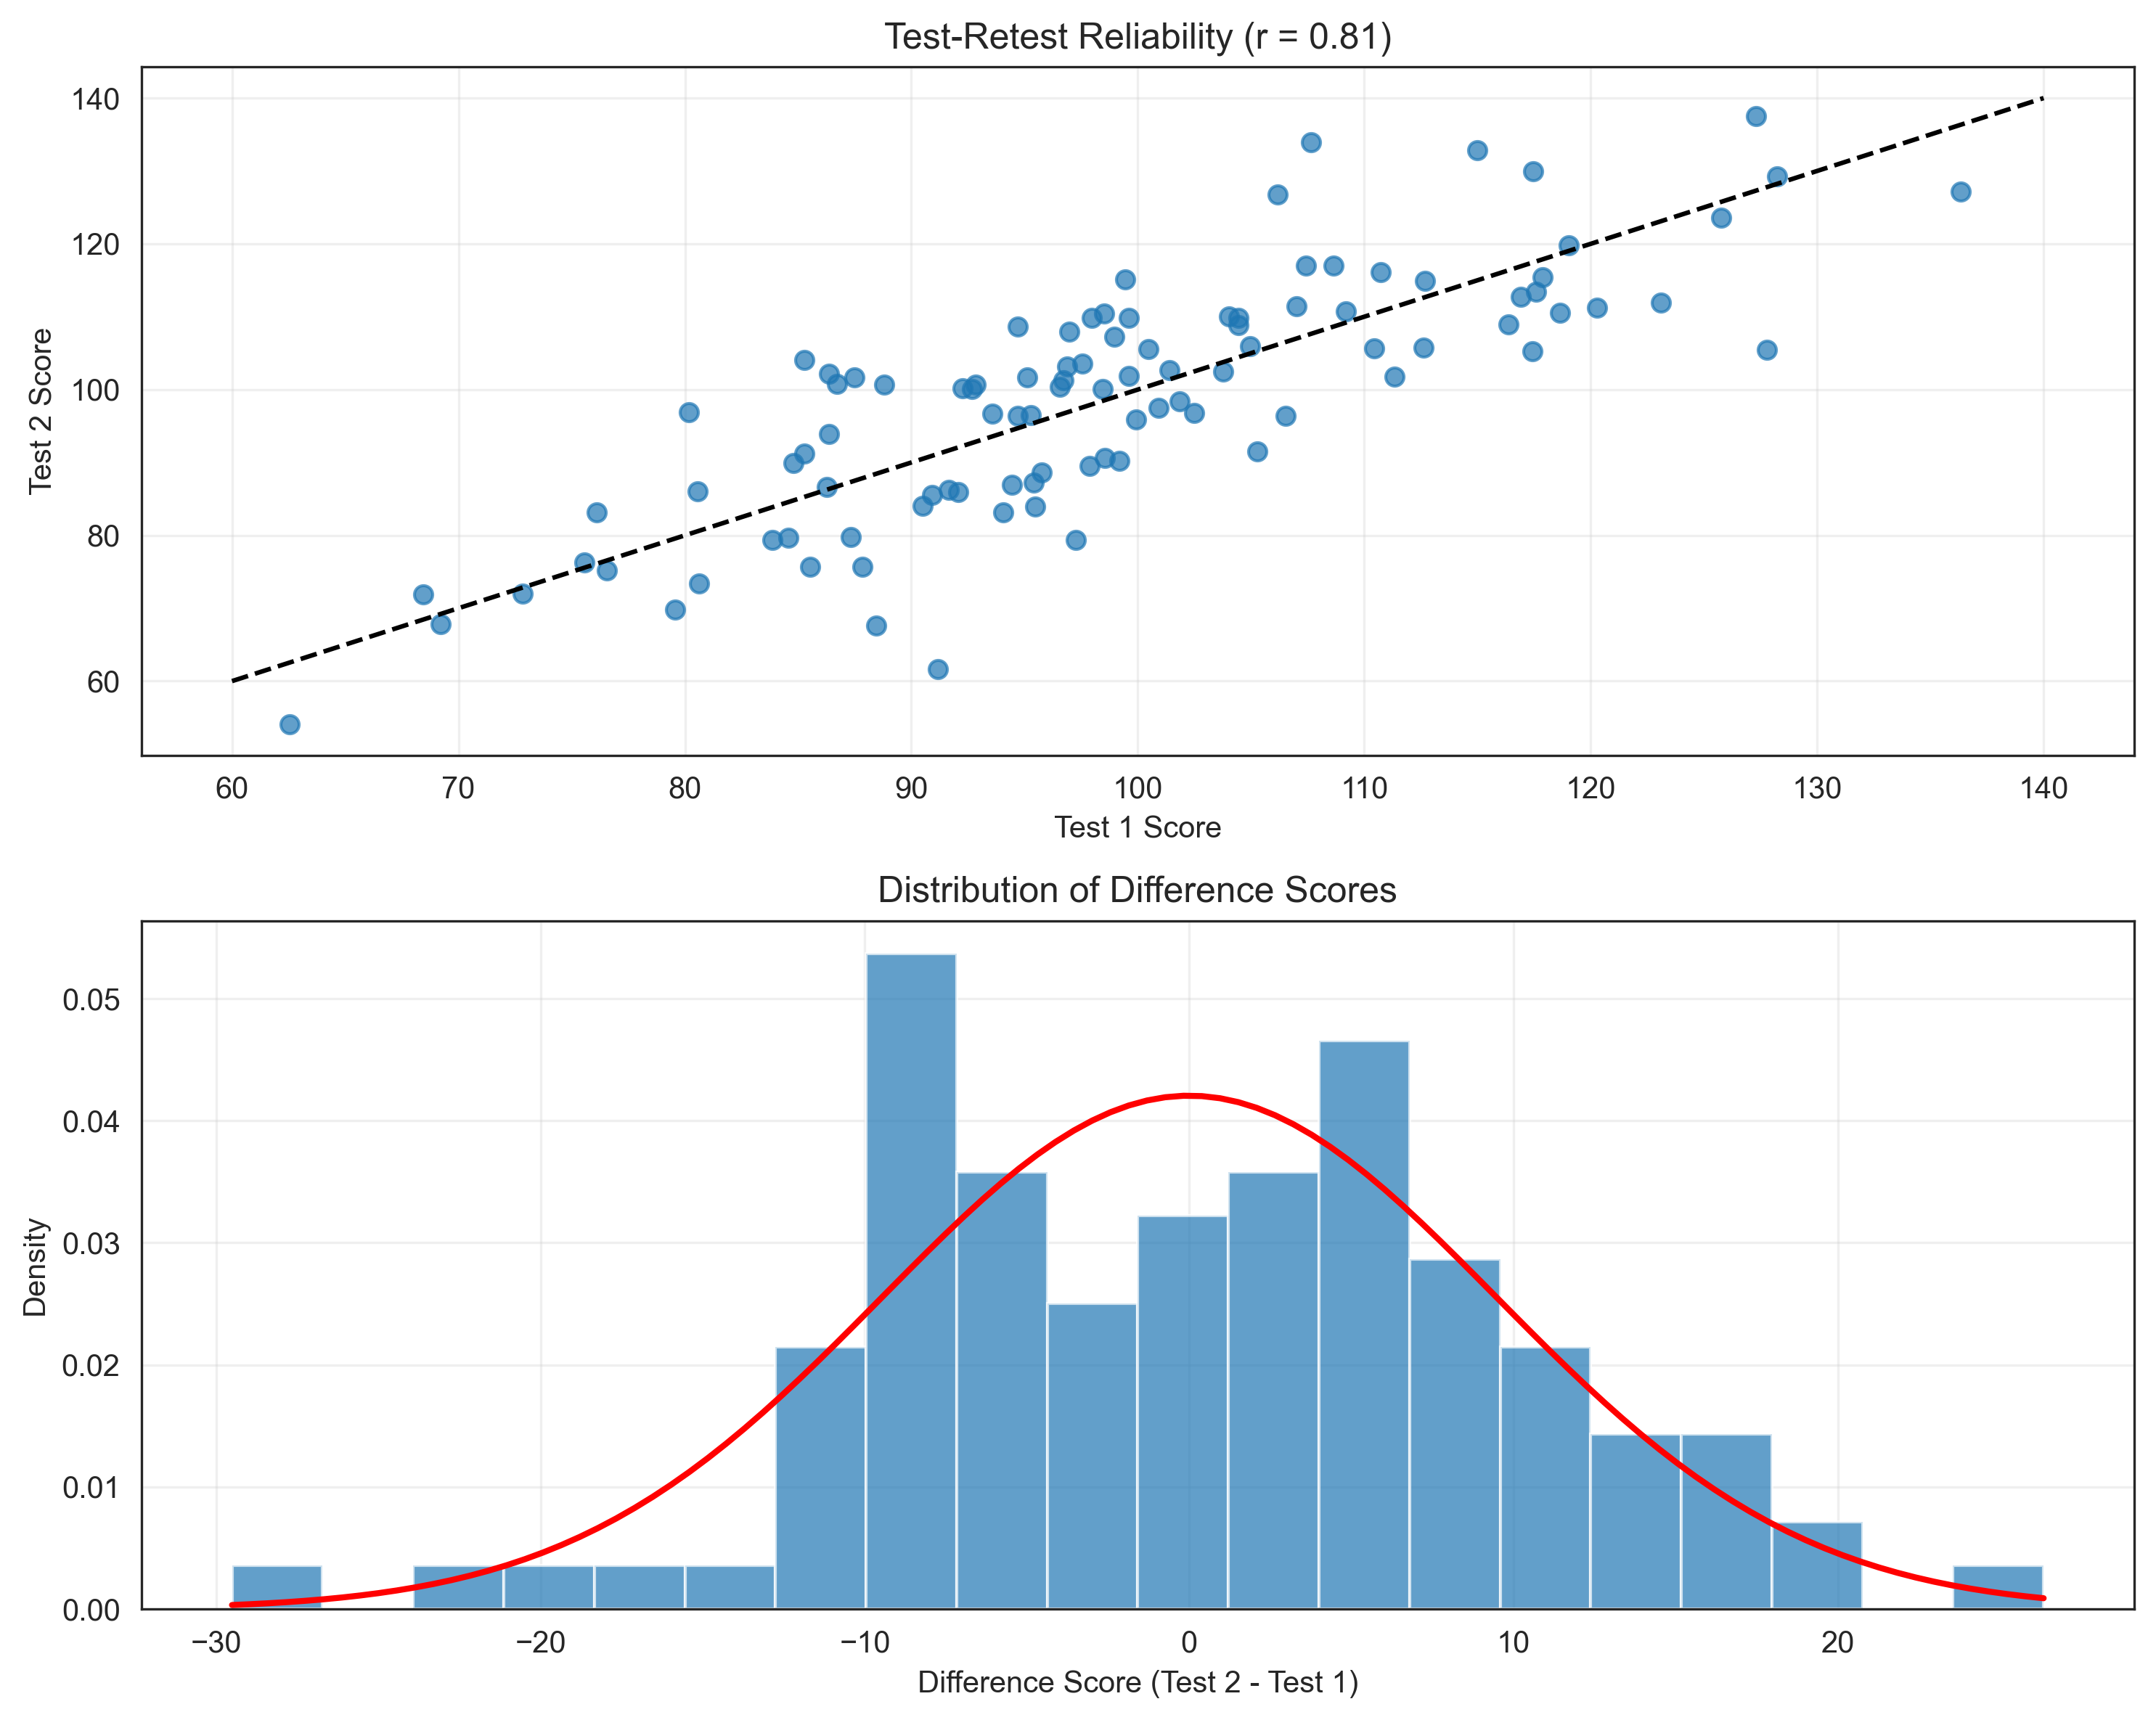

Standard Error of Measurement (SEM): 6.71
95% Confidence Interval for a score of 100: [86.9, 113.1]


In [25]:
# Simulate test-retest reliability
np.random.seed(42)

# Parameters
n_participants = 100
true_scores = np.random.normal(loc=100, scale=15, size=n_participants)  # True IQ scores
reliability = 0.8  # Test reliability
error_variance = (15**2) * (1 - reliability)  # Error variance
error_std = np.sqrt(error_variance)

# Generate observed scores for two test administrations
test1_errors = np.random.normal(loc=0, scale=error_std, size=n_participants)
test2_errors = np.random.normal(loc=0, scale=error_std, size=n_participants)

test1_scores = true_scores + test1_errors
test2_scores = true_scores + test2_errors

# Calculate correlation (observed reliability)
observed_reliability = np.corrcoef(test1_scores, test2_scores)[0, 1]

# Plot
plt.figure(figsize=(10, 8))

# Scatter plot of test-retest scores
plt.subplot(2, 1, 1)
plt.scatter(test1_scores, test2_scores, alpha=0.7)
plt.plot([60, 140], [60, 140], 'k--')  # Perfect reliability line
plt.xlabel('Test 1 Score')
plt.ylabel('Test 2 Score')
plt.title(f'Test-Retest Reliability (r = {observed_reliability:.2f})')
plt.grid(alpha=0.3)

# Distribution of difference scores
diff_scores = test2_scores - test1_scores
plt.subplot(2, 1, 2)
plt.hist(diff_scores, bins=20, alpha=0.7, density=True)
x = np.linspace(diff_scores.min(), diff_scores.max(), 100)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=np.sqrt(2*error_variance)), 'r-', lw=2)
plt.xlabel('Difference Score (Test 2 - Test 1)')
plt.ylabel('Density')
plt.title('Distribution of Difference Scores')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate standard error of measurement (SEM)
sem = 15 * np.sqrt(1 - reliability)
print(f"Standard Error of Measurement (SEM): {sem:.2f}")
print(f"95% Confidence Interval for a score of 100: [{100 - 1.96*sem:.1f}, {100 + 1.96*sem:.1f}]")

### 3. Power Analysis

Probability theory is essential for power analysis, which helps researchers determine the sample size needed to detect an effect of a given size. Let's explore this with a simple t-test example:

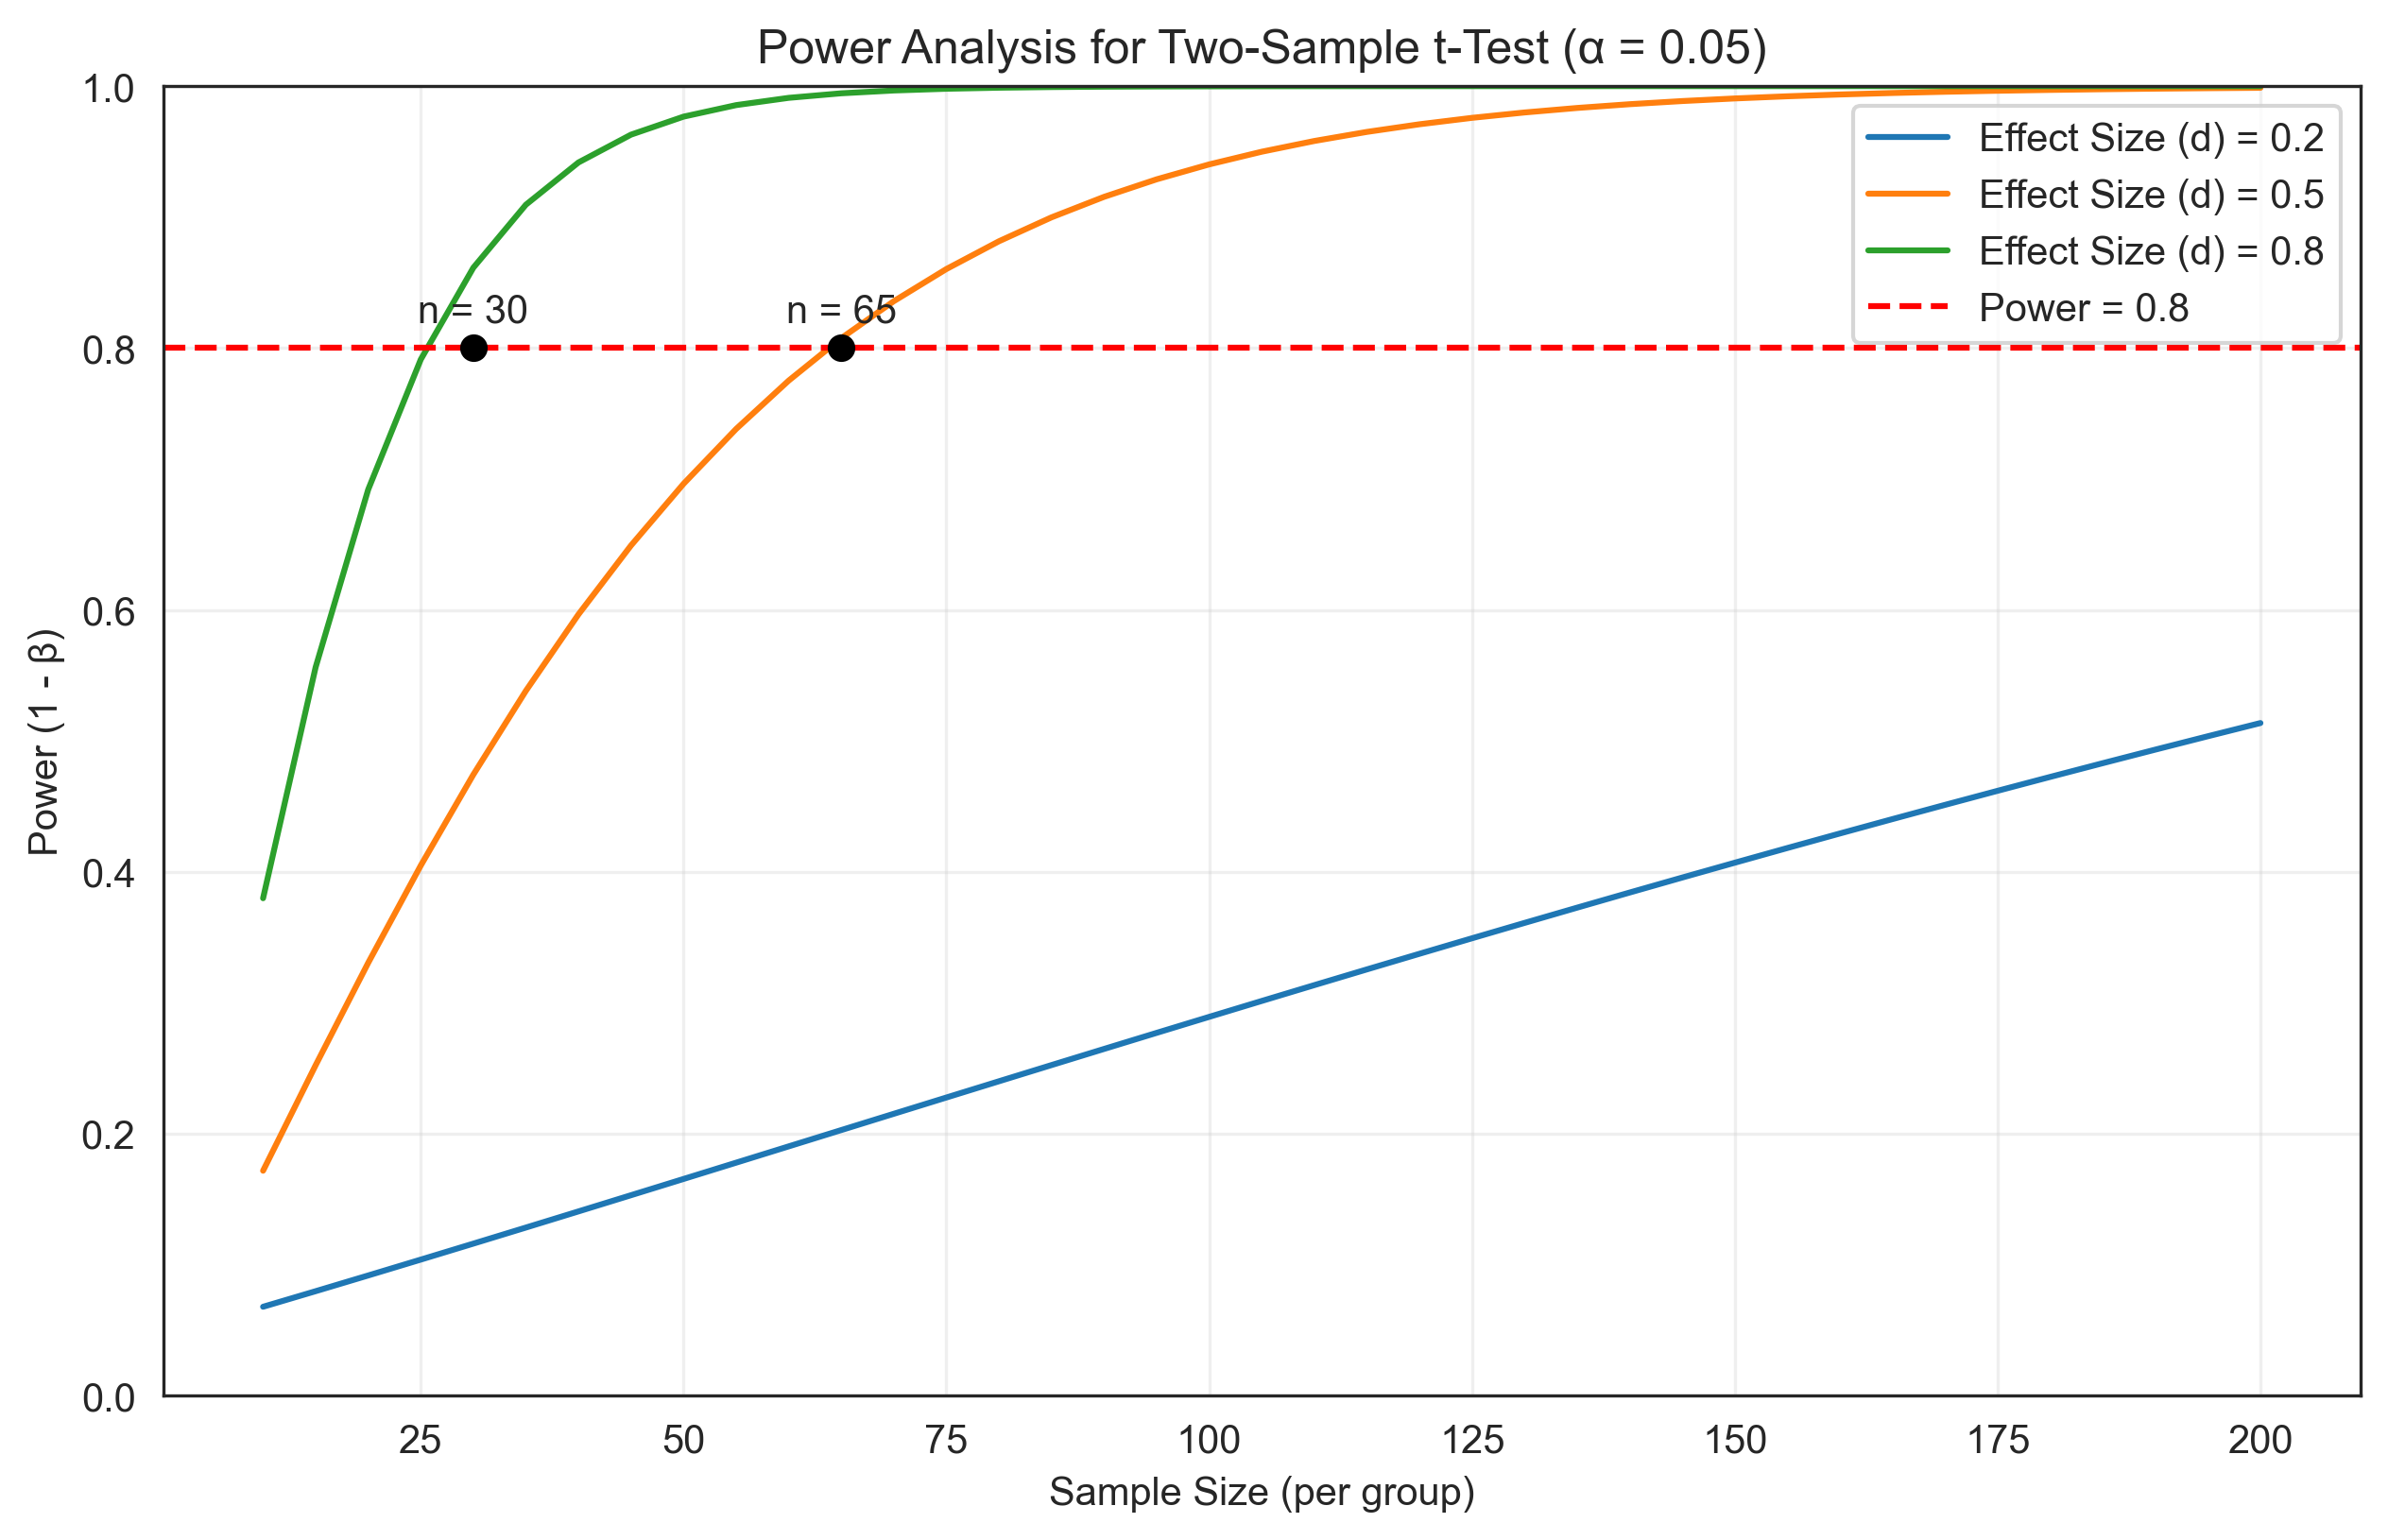

In [26]:
# Power analysis for a two-sample t-test
from scipy.stats import norm, t

# Parameters
alpha = 0.05  # Significance level
effect_sizes = [0.2, 0.5, 0.8]  # Small, medium, large effect sizes (Cohen's d)
sample_sizes = np.arange(10, 201, 5)  # Range of sample sizes to consider

# Calculate power for different effect sizes and sample sizes
power_results = {}

for d in effect_sizes:
    power_values = []
    for n in sample_sizes:
        # Calculate non-centrality parameter
        ncp = d * np.sqrt(n/2)
        
        # Calculate critical value
        df = 2 * n - 2  # Degrees of freedom for two-sample t-test
        t_crit = t.ppf(1 - alpha/2, df)
        
        # Calculate power
        power = 1 - t.cdf(t_crit, df, ncp) + t.cdf(-t_crit, df, ncp)
        power_values.append(power)
    
    power_results[d] = power_values

# Plot power curves
plt.figure(figsize=(10, 6))

for d, power_values in power_results.items():
    plt.plot(sample_sizes, power_values, label=f'Effect Size (d) = {d}')

plt.axhline(y=0.8, color='r', linestyle='--', label='Power = 0.8')
plt.xlabel('Sample Size (per group)')
plt.ylabel('Power (1 - β)')
plt.title('Power Analysis for Two-Sample t-Test (α = 0.05)')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, 1)

# Find sample sizes needed for 80% power
for d in effect_sizes:
    power_values = power_results[d]
    for i, power in enumerate(power_values):
        if power >= 0.8:
            n_needed = sample_sizes[i]
            plt.plot(n_needed, 0.8, 'ko')
            plt.text(n_needed, 0.82, f'n = {n_needed}', ha='center')
            break

plt.show()

## Summary

In this chapter, we've explored the fundamentals of probability theory and its applications in psychological research. We've covered:

1. **Basic probability concepts**: Sample space, events, and probability axioms
2. **Probability rules**: Complement rule, addition rule, conditional probability, and Bayes' theorem
3. **Random variables and probability distributions**: Discrete distributions (Bernoulli, binomial, Poisson) and continuous distributions (normal, uniform, exponential)
4. **Expected value and variance**: Measures of central tendency and dispersion for random variables
5. **The Central Limit Theorem**: A fundamental result that enables statistical inference
6. **Applications in psychological research**: Signal detection theory, test reliability, and power analysis

Understanding probability is essential for psychological research because it provides the foundation for statistical inference, which we'll explore in the next chapter. Probability theory helps psychologists quantify uncertainty, make predictions, test hypotheses, and design experiments with adequate statistical power.

## Practice Problems

1. A psychological test has a sensitivity of 0.85 (probability of correctly identifying individuals with a disorder) and a specificity of 0.75 (probability of correctly identifying individuals without the disorder). If the prevalence of the disorder in the population is 0.10, what is the probability that a person who tests positive actually has the disorder?

2. In a memory experiment, participants are shown a list of 20 words, where each word has a 0.4 probability of being remembered independently. What is the probability that a participant remembers exactly 8 words? What is the probability of remembering at least 10 words?

3. A researcher is designing a study to detect a medium effect size (d = 0.5) using a two-sample t-test with α = 0.05. How many participants per group are needed to achieve 80% power?

4. The reaction times for a cognitive task are normally distributed with a mean of 350 ms and a standard deviation of 75 ms. What is the probability that a randomly selected participant has a reaction time:
   a. Greater than 450 ms?
   b. Between 300 ms and 400 ms?
   c. Less than 250 ms?

5. A psychological test has a reliability of 0.85. If a person scores 120 on the test (with a population mean of 100 and standard deviation of 15), what is the 95% confidence interval for their true score?

## Solutions to Practice Problems

### Problem 1: Bayes' Theorem for Diagnostic Testing

We need to find P(Disorder | Positive Test) using Bayes' theorem:

$$P(D|+) = \frac{P(+|D) \times P(D)}{P(+)}$$

where:
- P(+|D) = sensitivity = 0.85
- P(D) = prevalence = 0.10
- P(+) = P(+|D) × P(D) + P(+|¬D) × P(¬D)
- P(+|¬D) = 1 - specificity = 1 - 0.75 = 0.25
- P(¬D) = 1 - P(D) = 1 - 0.10 = 0.90

In [27]:
# Problem 1
sensitivity = 0.85
specificity = 0.75
prevalence = 0.10

# Calculate P(+|¬D) = false positive rate
false_positive_rate = 1 - specificity

# Calculate P(+) = overall probability of a positive test
p_positive = sensitivity * prevalence + false_positive_rate * (1 - prevalence)

# Calculate P(D|+) using Bayes' theorem
p_disorder_given_positive = (sensitivity * prevalence) / p_positive

print(f"P(Disorder | Positive Test) = {p_disorder_given_positive:.4f} or about {p_disorder_given_positive*100:.1f}%")

P(Disorder | Positive Test) = 0.2742 or about 27.4%


### Problem 2: Binomial Probability

This is a binomial probability problem with n = 20 trials and p = 0.4 probability of success (remembering a word).

In [28]:
# Problem 2
from scipy.stats import binom

n = 20  # Number of words
p = 0.4  # Probability of remembering each word

# Probability of remembering exactly 8 words
p_exactly_8 = binom.pmf(8, n, p)
print(f"P(Remembering exactly 8 words) = {p_exactly_8:.4f} or about {p_exactly_8*100:.1f}%")

# Probability of remembering at least 10 words
p_at_least_10 = 1 - binom.cdf(9, n, p)  # P(X ≥ 10) = 1 - P(X ≤ 9)
print(f"P(Remembering at least 10 words) = {p_at_least_10:.4f} or about {p_at_least_10*100:.1f}%")

P(Remembering exactly 8 words) = 0.1797 or about 18.0%
P(Remembering at least 10 words) = 0.2447 or about 24.5%


### Problem 3: Sample Size for Power

We need to determine the sample size needed for 80% power to detect a medium effect size (d = 0.5) using a two-sample t-test with α = 0.05.

In [29]:
# Problem 3
from scipy import stats
import numpy as np

# Parameters
alpha = 0.05  # Significance level
power = 0.8   # Desired power
d = 0.5       # Effect size (Cohen's d)

# Function to calculate power for a given sample size
def calculate_power(n, d, alpha):
    # Non-centrality parameter
    ncp = d * np.sqrt(n/2)
    
    # Degrees of freedom
    df = 2 * n - 2
    
    # Critical value
    t_crit = stats.t.ppf(1 - alpha/2, df)
    
    # Power
    power = 1 - stats.t.cdf(t_crit, df, ncp) + stats.t.cdf(-t_crit, df, ncp)
    return power

# Find the minimum sample size for desired power
n = 10  # Start with a small sample size
while calculate_power(n, d, alpha) < power:
    n += 1

print(f"Sample size needed per group: {n}")
print(f"Total sample size: {2*n}")
print(f"Actual power with n = {n}: {calculate_power(n, d, alpha):.4f}")

Sample size needed per group: 64
Total sample size: 128
Actual power with n = 64: 0.8014


### Problem 4: Normal Distribution Probabilities

We need to calculate probabilities for a normal distribution with mean μ = 350 ms and standard deviation σ = 75 ms.

a. P(Reaction time > 450 ms) = 0.0912
a. P(Reaction time > 450 ms) = 0.0912 or about 9.1%
b. P(300 ms < Reaction time < 400 ms) = 0.4950 or about 49.5%
c. P(Reaction time < 250 ms) = 0.0912 or about 9.1%


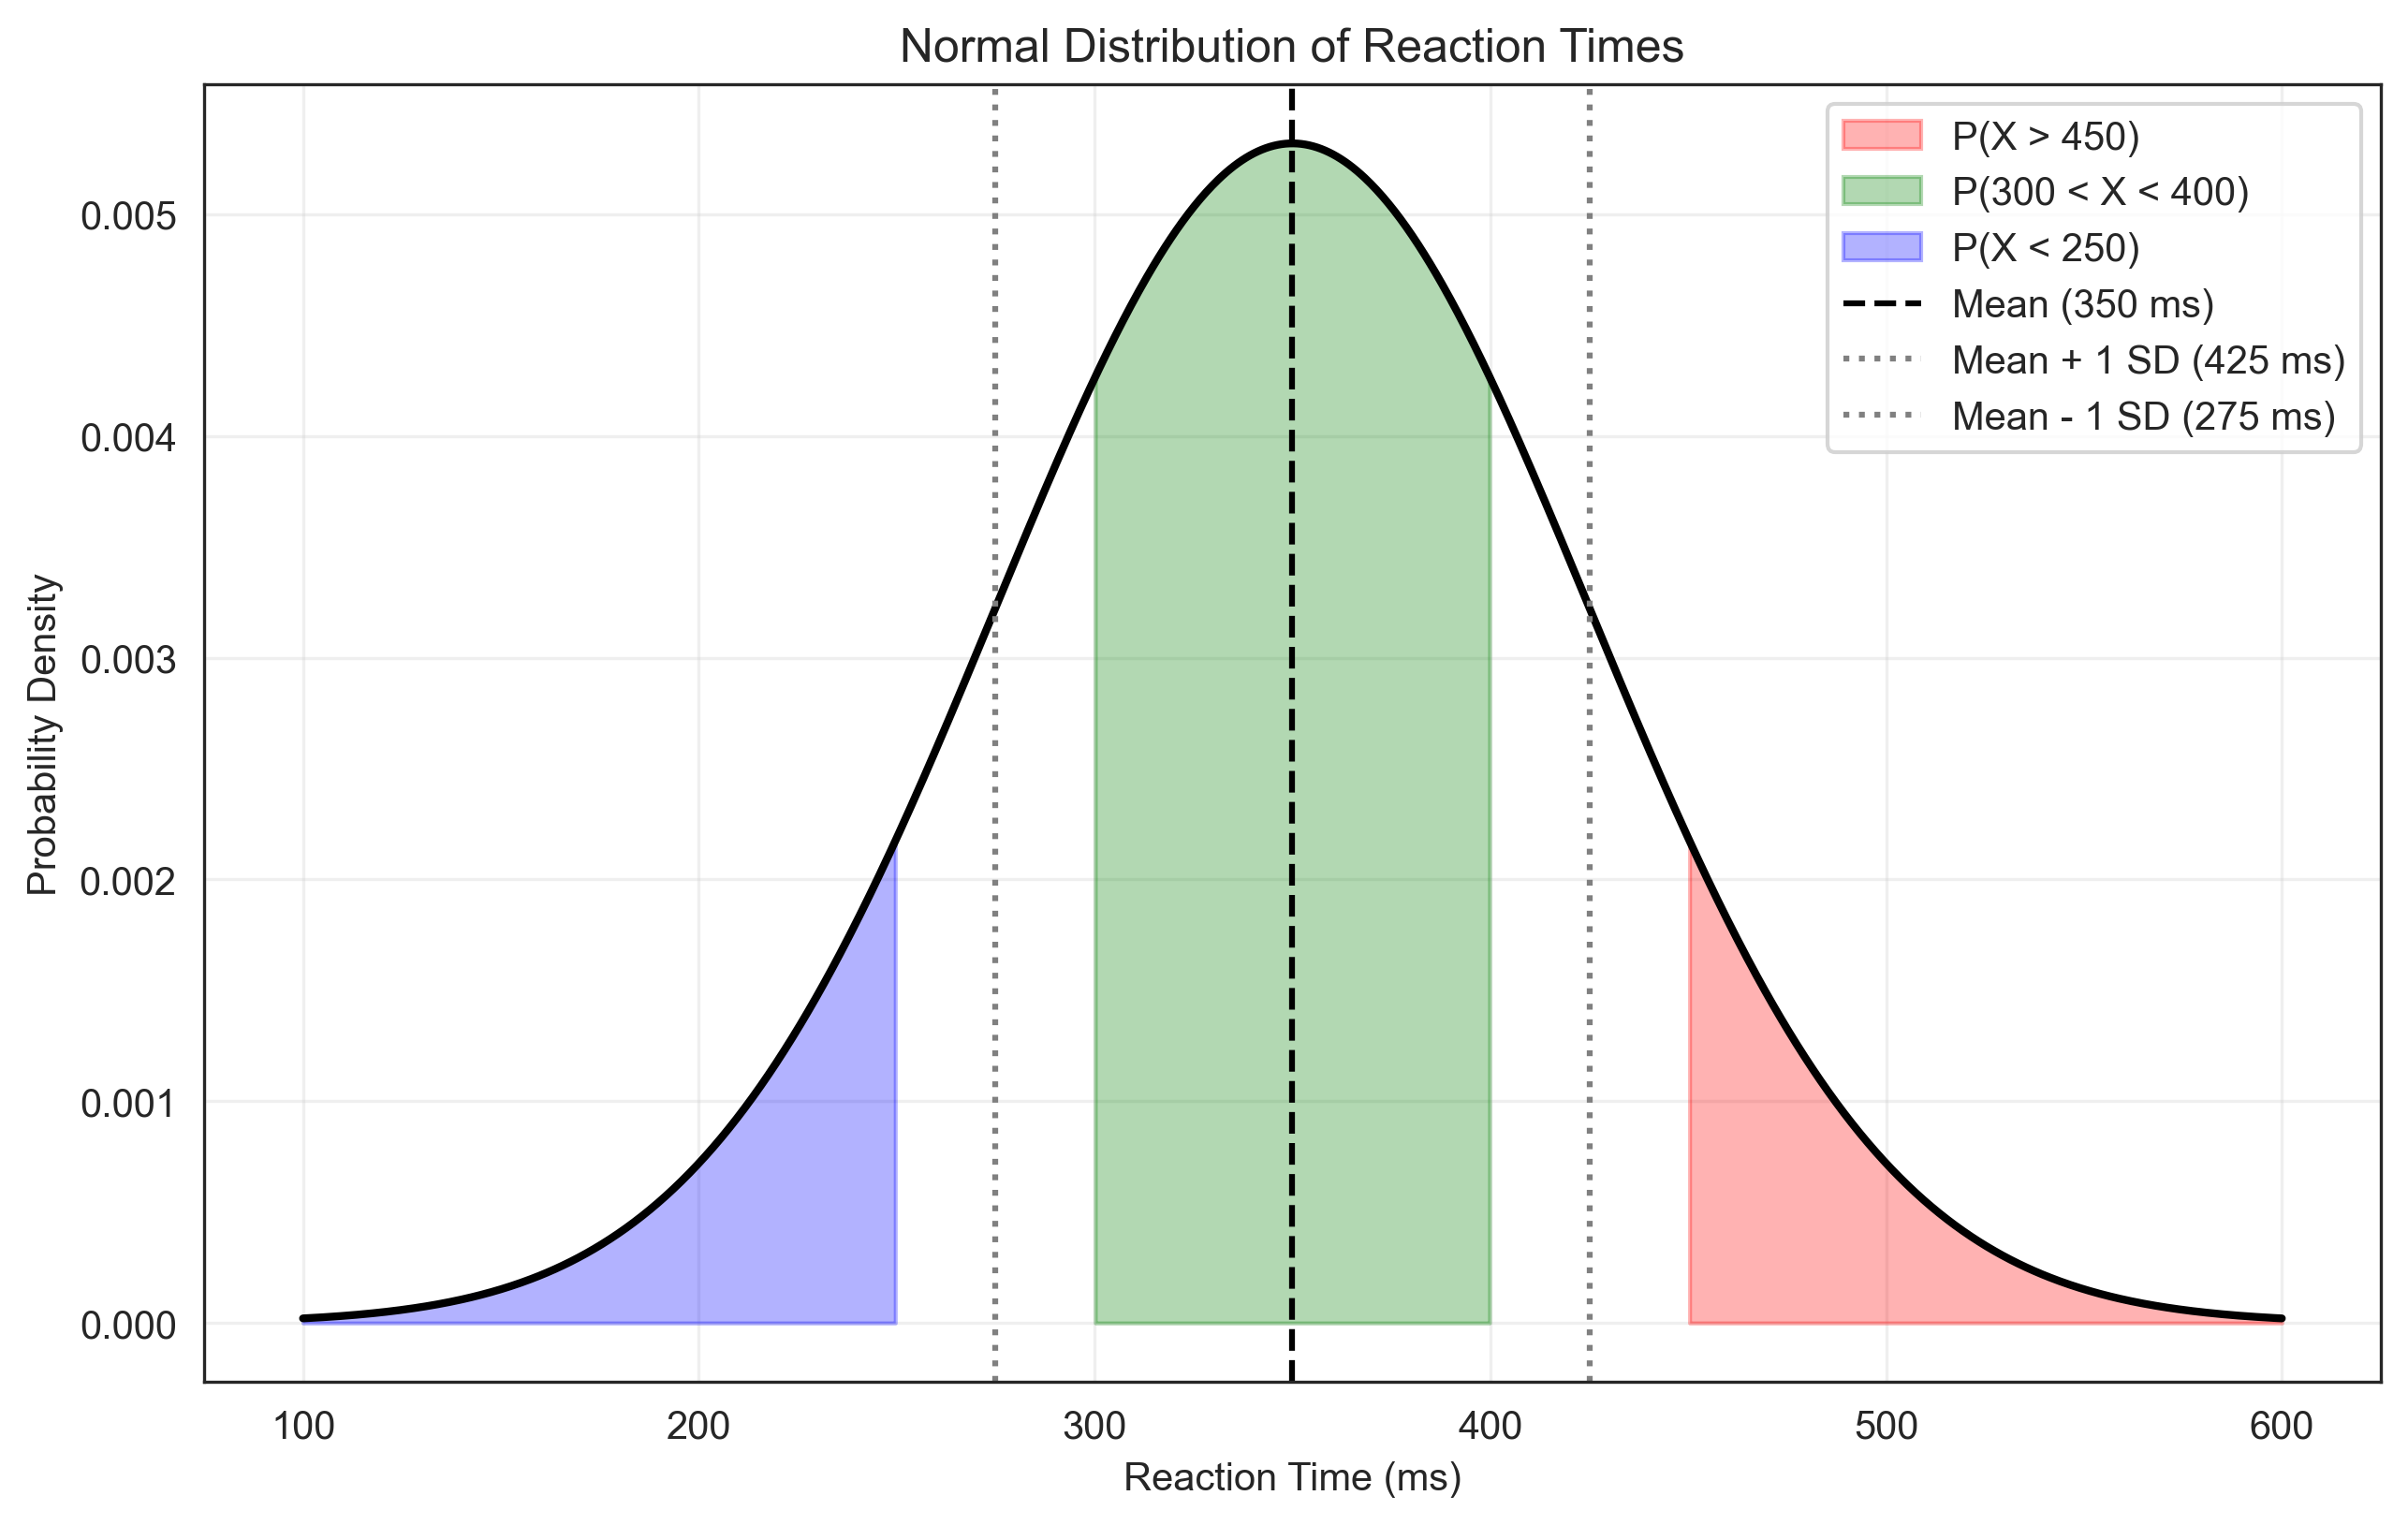

In [30]:
# Problem 4
from scipy.stats import norm

mu = 350  # Mean reaction time (ms)
sigma = 75  # Standard deviation (ms)

# a. P(X > 450)
p_greater_than_450 = 1 - norm.cdf(450, mu, sigma)
print(f"a. P(Reaction time > 450 ms) = {p_greater_than_450:.4f}")
# Problem 4
from scipy.stats import norm

mu = 350  # Mean reaction time (ms)
sigma = 75  # Standard deviation (ms)

# a. P(X > 450)
p_greater_than_450 = 1 - norm.cdf(450, mu, sigma)
print(f"a. P(Reaction time > 450 ms) = {p_greater_than_450:.4f} or about {p_greater_than_450*100:.1f}%")

# b. P(300 < X < 400)
p_between_300_and_400 = norm.cdf(400, mu, sigma) - norm.cdf(300, mu, sigma)
print(f"b. P(300 ms < Reaction time < 400 ms) = {p_between_300_and_400:.4f} or about {p_between_300_and_400*100:.1f}%")

# c. P(X < 250)
p_less_than_250 = norm.cdf(250, mu, sigma)
print(f"c. P(Reaction time < 250 ms) = {p_less_than_250:.4f} or about {p_less_than_250*100:.1f}%")

# Visualize
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(100, 600, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'k-', lw=2)

# Shade areas for each probability
plt.fill_between(x, 0, pdf, where=(x > 450), color='red', alpha=0.3, label='P(X > 450)')
plt.fill_between(x, 0, pdf, where=(x > 300) & (x < 400), color='green', alpha=0.3, label='P(300 < X < 400)')
plt.fill_between(x, 0, pdf, where=(x < 250), color='blue', alpha=0.3, label='P(X < 250)')

plt.axvline(mu, color='k', linestyle='--', label='Mean (350 ms)')
plt.axvline(mu + sigma, color='gray', linestyle=':', label='Mean + 1 SD (425 ms)')
plt.axvline(mu - sigma, color='gray', linestyle=':', label='Mean - 1 SD (275 ms)')

plt.xlabel('Reaction Time (ms)')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Reaction Times')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Problem 5: Confidence Interval for True Score

We need to calculate a 95% confidence interval for a person's true score, given their observed score and the reliability of the test.

Observed Score: 120
Estimated True Score: 117.00
Standard Error of Measurement (SEM): 5.81
95% Confidence Interval: [105.61, 128.39]


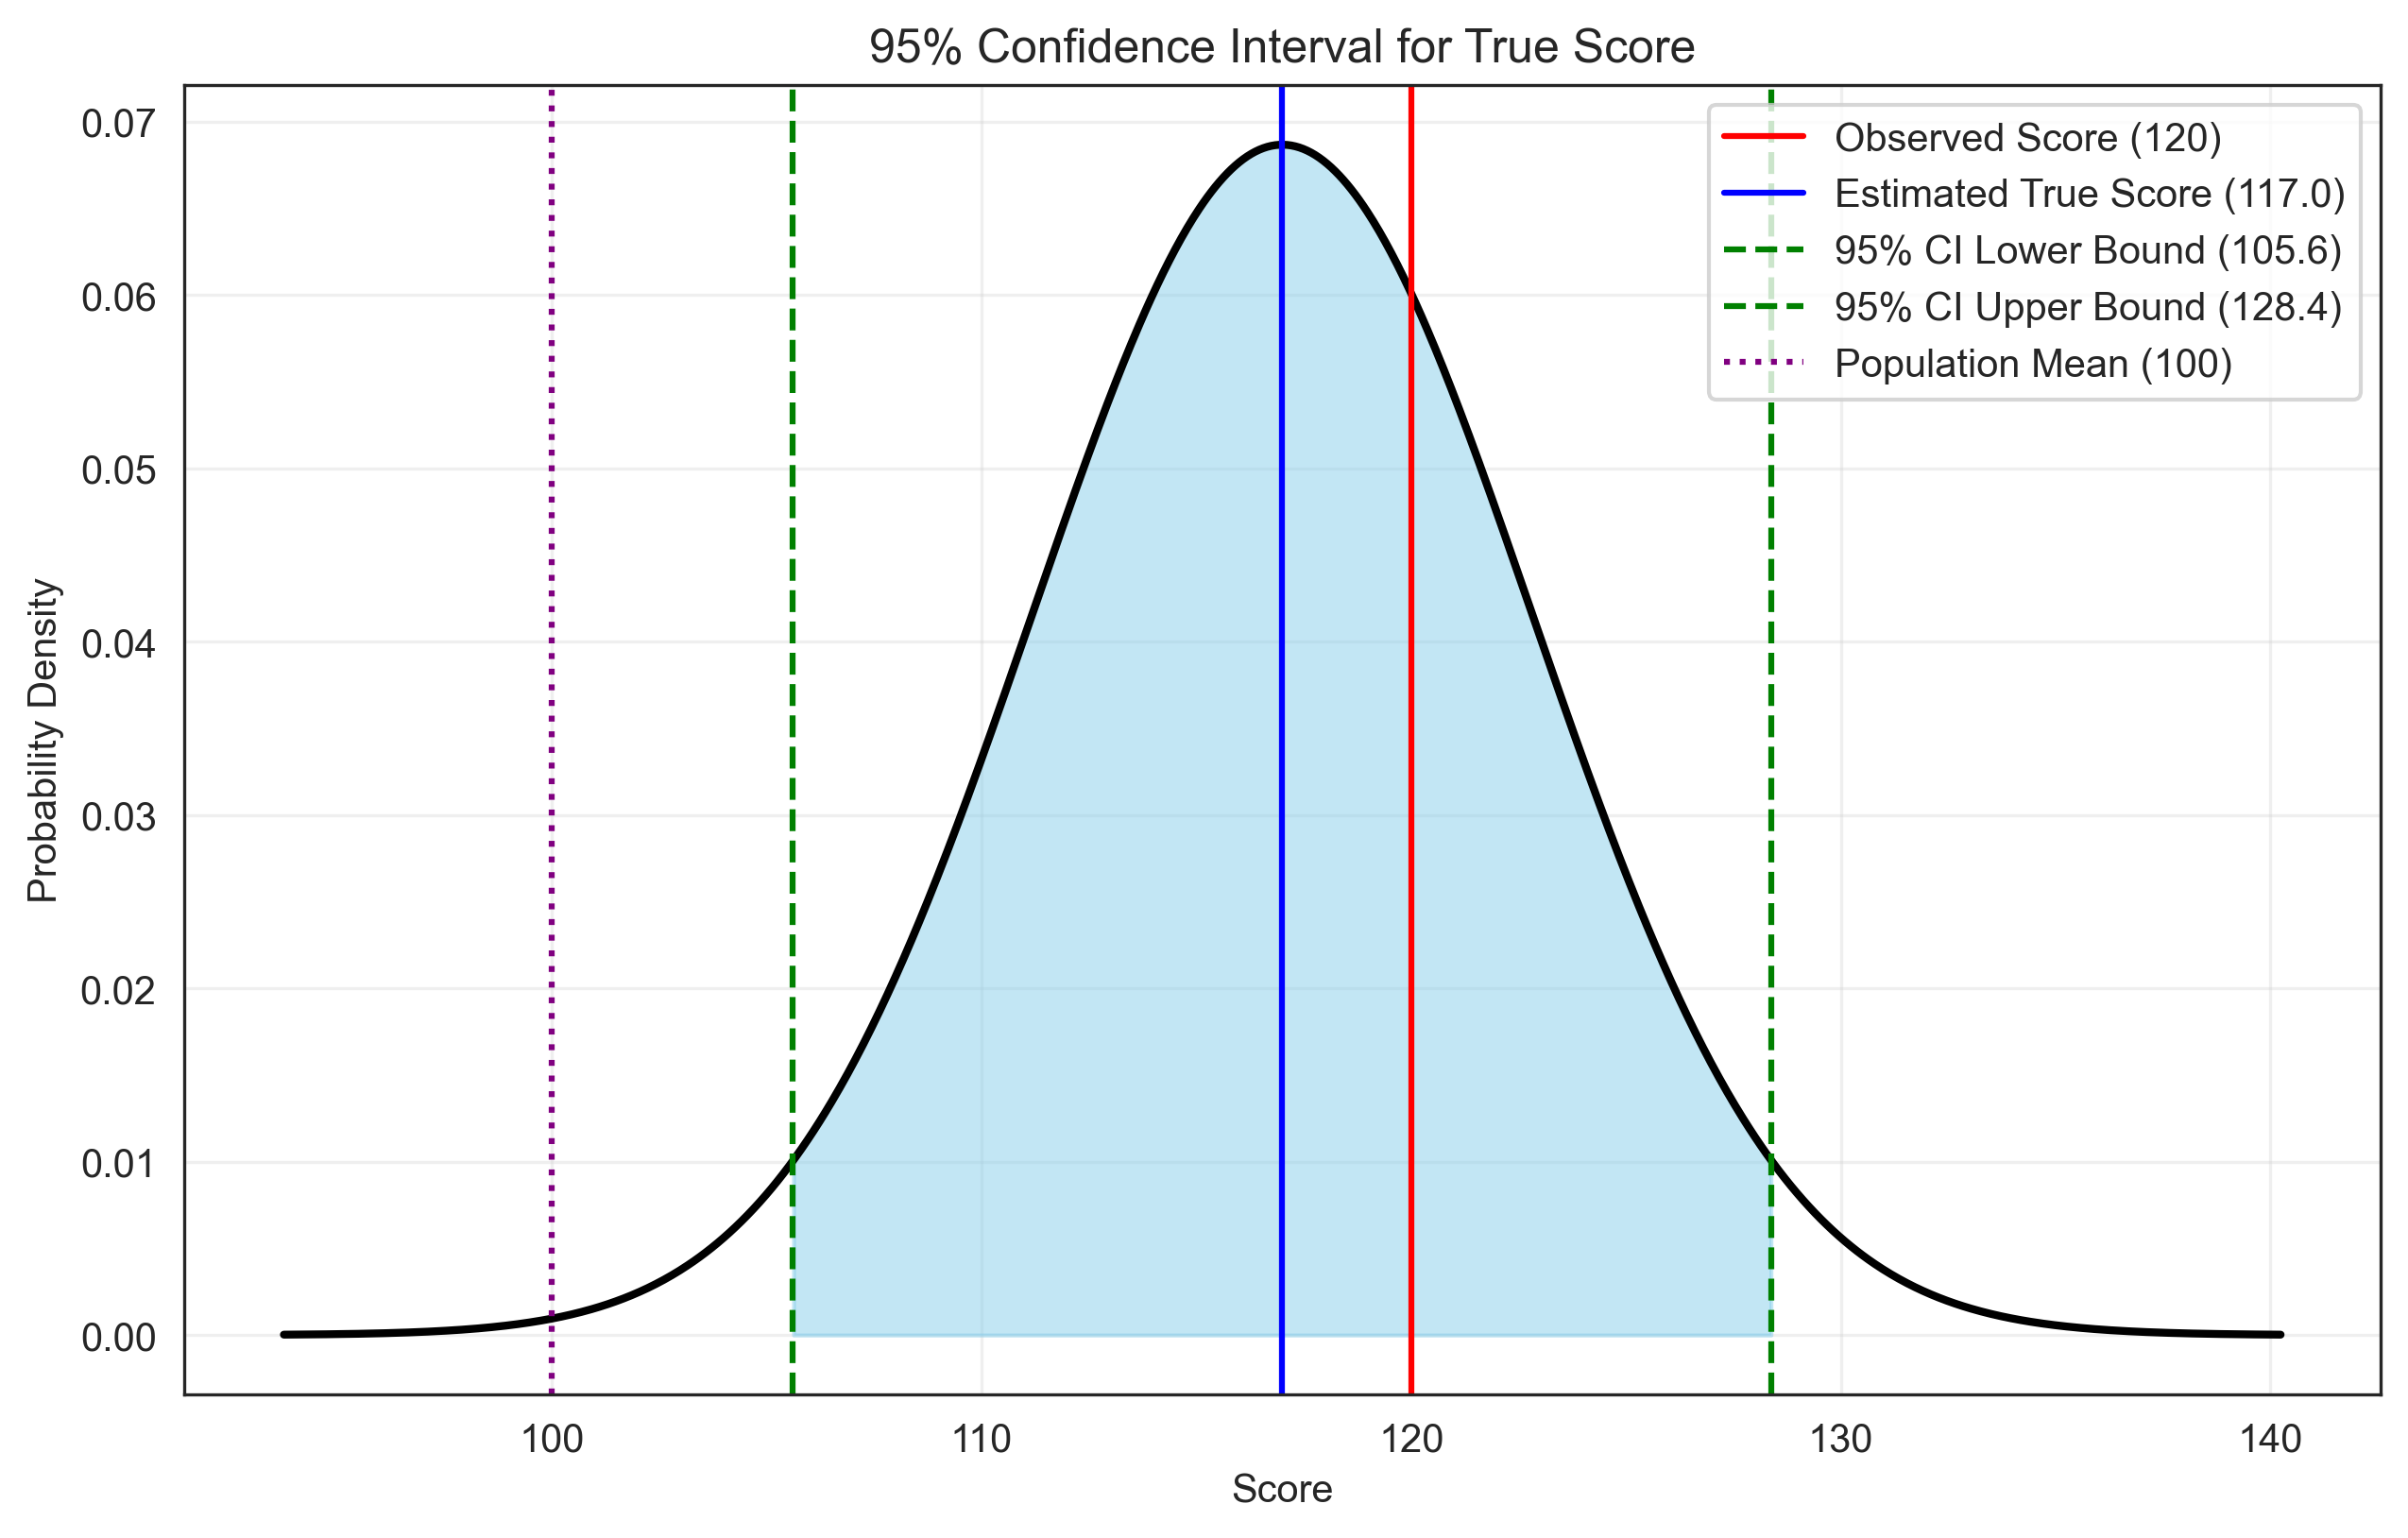

In [31]:
# Problem 5
reliability = 0.85  # Test reliability
observed_score = 120  # Person's observed score
population_mean = 100  # Population mean
population_sd = 15  # Population standard deviation

# Calculate the standard error of measurement (SEM)
sem = population_sd * np.sqrt(1 - reliability)

# Calculate the estimated true score (regression to the mean)
estimated_true_score = population_mean + reliability * (observed_score - population_mean)

# Calculate 95% confidence interval
z_critical = 1.96  # Z-score for 95% confidence
margin_of_error = z_critical * sem
ci_lower = estimated_true_score - margin_of_error
ci_upper = estimated_true_score + margin_of_error

print(f"Observed Score: {observed_score}")
print(f"Estimated True Score: {estimated_true_score:.2f}")
print(f"Standard Error of Measurement (SEM): {sem:.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Visualize
plt.figure(figsize=(10, 6))

# Plot the distribution of possible true scores
x = np.linspace(estimated_true_score - 4*sem, estimated_true_score + 4*sem, 1000)
pdf = norm.pdf(x, estimated_true_score, sem)
plt.plot(x, pdf, 'k-', lw=2)

# Shade the 95% confidence interval
plt.fill_between(x, 0, pdf, where=(x >= ci_lower) & (x <= ci_upper), color='skyblue', alpha=0.5)

# Add vertical lines
plt.axvline(observed_score, color='red', linestyle='-', label=f'Observed Score ({observed_score})')
plt.axvline(estimated_true_score, color='blue', linestyle='-', label=f'Estimated True Score ({estimated_true_score:.1f})')
plt.axvline(ci_lower, color='green', linestyle='--', label=f'95% CI Lower Bound ({ci_lower:.1f})')
plt.axvline(ci_upper, color='green', linestyle='--', label=f'95% CI Upper Bound ({ci_upper:.1f})')
plt.axvline(population_mean, color='purple', linestyle=':', label=f'Population Mean ({population_mean})')

plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('95% Confidence Interval for True Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Conclusion

In this chapter, we've explored the fundamentals of probability theory and its applications in psychological research. Understanding probability is essential for making sense of data, designing experiments, and drawing valid conclusions from research findings.

Key takeaways:

1. Probability provides a framework for quantifying uncertainty in psychological measurements and observations.
2. Probability distributions model the variability in psychological variables, with the normal distribution being particularly important.
3. The Central Limit Theorem enables statistical inference by ensuring that sampling distributions of means approach normality.
4. Bayes' theorem helps update beliefs based on new evidence, which is crucial for diagnostic decision-making.
5. Probability theory underlies important concepts in psychological research, including signal detection theory, test reliability, and statistical power.

In the next chapter, we'll build on these probability concepts to explore statistical inference, which allows us to draw conclusions about populations based on sample data.